# Data Inspection and Preprocessing for Liver Cancer Detection
---

This script performs data loading, exploratory data analysis (EDA), and feature selection for a dataset related to liver cancer prediction.

The dataset used comes from the PLCO study, and different sections 
are analyzed to determine their relevance to the final model.

**Author:** Juan Armario  
**Date:** 2024

# Importing libraries
---

In [3]:
import pandas as pd
import numpy as np

## Others
import warnings
import sys
from collections import Counter

## Plot
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Custom functions
sys.path.append("../../0. Scripts")
import data_analysing_functions as daf
import model_metrics_functions as mmf

# Loading Data
---

In [5]:
liver_cancer_df = pd.read_csv('../../0. Data/0. Original/liver_data_mar22_d032222.csv')
pd.set_option('display.max_columns', None)

In [6]:
liver_cancer_df.shape

(154887, 167)

In [7]:
liver_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154887 entries, 0 to 154886
Columns: 167 entries, liver_topography to in_TGWAS_population
dtypes: float64(130), int64(34), object(3)
memory usage: 197.3+ MB


In [8]:
liver_cancer_df

liver_topography  liver_morphology  liver_grade  liver_behavior  \
0                   NaN               NaN          NaN             NaN   
1                   NaN               NaN          NaN             NaN   
2                   NaN               NaN          NaN             NaN   
3                   NaN               NaN          NaN             NaN   
4                   NaN               NaN          NaN             NaN   
...                 ...               ...          ...             ...   
154882              NaN               NaN          NaN             NaN   
154883              NaN               NaN          NaN             NaN   
154884              NaN               NaN          NaN             NaN   
154885              NaN               NaN          NaN             NaN   
154886              NaN               NaN          NaN             NaN   

        liver_cancer_first  liver_cancer  liver_seer  liver_seercat  \
0                      NaN             0         NaN            NaN   
1                      NaN             0         NaN            NaN   
2                      NaN             0         NaN            NaN   
3                      NaN             0         NaN            NaN   
4                      NaN             0         NaN            NaN   
...                    ...           ...         ...            ...   
154882                 NaN             0         NaN            NaN   
154883                 NaN             0         NaN            NaN   
154884                 NaN             0         NaN            NaN   
154885                 NaN             0         NaN            NaN   
154886                 NaN             0         NaN            NaN   

        liver_annyr  liver_exitstat  liver_exitage  liver_exitdays  \
0               NaN               8             80            4794   
1               NaN               8             72            3873   
2               NaN               8             74            4123   
3               NaN               8             87            4672   
4               NaN               8             72            3386   
...             ...             ...            ...             ...   
154882          NaN               8             69            4207   
154883          NaN               8             77            5539   
154884          NaN               5             78            2152   
154885          NaN               5             75            4524   
154886          NaN               5             62            1579   

        liver_cancer_diagdays     plco_id           build  build_cancers  \
0                         NaN  A-000899-7  mar22/03.22.22              1   
1                         NaN  A-000989-6  mar22/03.22.22              1   
2                         NaN  A-000998-7  mar22/03.22.22              1   
3                         NaN  A-001799-8  mar22/03.22.22              1   
4                         NaN  A-001889-7  mar22/03.22.22              1   
...                       ...         ...             ...            ...   
154882                    NaN  Z-162295-2  mar22/03.22.22              1   
154883                    NaN  Z-162349-7  mar22/03.22.22              1   
154884                    NaN  Z-162358-8  mar22/03.22.22              1   
154885                    NaN  Z-162367-9  mar22/03.22.22              1   
154886                    NaN  Z-162376-0  mar22/03.22.22              1   

        build_incidence_cutoff  educat  marital  occupat  pipe  cigar  \
0                            1     2.0      3.0      4.0   0.0    0.0   
1                            1     7.0      1.0      2.0   2.0    2.0   
2                            1     5.0      1.0      4.0   0.0    0.0   
3                            1     5.0      1.0      1.0   0.0    0.0   
4                            1     6.0      3.0      2.0   0.0    0.0   
...                        ...     ...      ...      ...   ...    ...   


# Analysing Data
---
In this section, we perform an **exploratory data analysis (EDA)** to understand the structure, quality, and distribution of variables within the dataset. The dataset contains multiple sections, each representing different types of medical and demographic information.

**The main objectives of this analysis include:**
- Identifying and categorizing variables to determine their relevance.
- Detecting potential data quality issues such as missing values or inconsistencies.
- Understanding variable distributions and relationships through descriptive statistics and visualizations.

This step is crucial for selecting meaningful features and ensuring that the dataset is well-prepared for model development.

In [10]:
## Creation of diferent groups, according the diferent sections of the data provided and explained in the PLCO guide, to analyse easily
## our variables, to include or not into our model.

section1 = ['plco_id', 'build', 'build_cancers', 'build_death_cutoff', 'build_incidence_cutoff']
section2 = ['ph_liver_trial', 'ph_any_trial', 'in_TGWAS_population']
section3 = ['liver_eligible_bq', 'entryage_bq', 'entrydays_bq', 'ph_liver_bq', 'ph_any_bq']
section4 = ['liver_eligible_dhq', 'entryage_dhq', 'entrydays_dhq', 'ph_liver_dhq', 'ph_any_dhq']
section5 = ['liver_eligible_dqx', 'entryage_dqx', 'entrydays_dqx', 'ph_liver_dqx', 'ph_any_dqx']
section6 = ['liver_eligible_sqx', 'entryage_sqx', 'entrydays_sqx', 'ph_liver_sqx', 'ph_any_sqx']
section7 = ['entryage_muq', 'entrydays_muq', 'ph_liver_muq', 'ph_any_muq']
section8 = ['fstcan_exitstat', 'liver_exitstat', 'fstcan_exitdays', 'liver_exitdays', 'fstcan_exitage', 'liver_exitage', 'mortality_exitstat', 'mortality_exitdays', 'mortality_exitage']
section9 = ['age', 'agelevel', 'arm', 'center', 'rndyear', 'sex']
section10 = ['reconsent_outcome', 'reconsent_outcome_days']
section11 = ['liver_cancer', 'liver_cancer_diagdays', 'liver_cancer_first', 'liver_annyr']
section12 = ['liver_behavior', 'liver_grade', 'liver_morphology', 'liver_topography', 'liver_seer', 'liver_seercat']
section13 = ['is_dead', 'is_dead_with_cod', 'dth_days']
section14 = ['d_seer_death', 'd_cancersite', 'd_dth_liver', 'd_codeath_cat']
section15 = ['f_seer_death', 'f_cancersite', 'f_dth_liver', 'f_codeath_cat']
section16 = ['bq_returned', 'bq_age', 'bq_compdays', 'bq_adminm']
section17 = ['race7', 'hispanic_f', 'educat', 'marital', 'occupat']
section18 = ['cig_stat', 'cig_stop', 'cig_years', 'cigpd_f', 'pack_years', 'cigar', 'filtered_f', 'pipe', 'rsmoker_f', 'smokea_f', 'smoked_f', 'ssmokea_f']
section19 = ['fh_cancer', 'liver_fh', 'liver_fh_age', 'liver_fh_cnt', 'brothers', 'sisters']
section20 = ['bmi_curc', 'bmi_curr', 'height_f', 'weight_f', 'bmi_20', 'bmi_20c', 'weight20_f', 'bmi_50', 'bmi_50c', 'weight50_f']
section21 = ['asp', 'asppd', 'ibup', 'ibuppd']
section22 = ['arthrit_f', 'bronchit_f', 'colon_comorbidity', 'diabetes_f', 'divertic_f', 'emphys_f', 'gallblad_f', 'hearta_f', 'hyperten_f', 'liver_comorbidity', 'osteopor_f', 'polyps_f', 'stroke_f']
section23 = ['hyster_f', 'hystera', 'ovariesr_f', 'tuballig', 'bcontr_f', 'bcontra', 'bcontrt', 'curhorm', 'horm_f', 'horm_stat', 'thorm', 'fchilda', 'livec', 'miscar', 'preg_f', 'prega', 'pregc', 'stillb', 'trypreg', 'tubal', 'fmenstr', 'lmenstr', 'menstrs', 'menstrs_stat_type', 'post_menopausal', 'bbd', 'benign_ovcyst', 'endometriosis', 'uterine_fib']
section24 = ['enlpros_f', 'enlprosa', 'infpros_f', 'infprosa', 'prosprob_f', 'urinate_f', 'urinatea']
section25 = ['surg_age', 'surg_any', 'surg_biopsy', 'surg_prostatectomy', 'surg_resection', 'vasect_f', 'vasecta']

## Section 1: Identifiers
---

In [12]:
section1_df = liver_cancer_df[section1]
section1_df

plco_id           build  build_cancers  build_death_cutoff  \
0       A-000899-7  mar22/03.22.22              1                   4   
1       A-000989-6  mar22/03.22.22              1                   4   
2       A-000998-7  mar22/03.22.22              1                   4   
3       A-001799-8  mar22/03.22.22              1                   4   
4       A-001889-7  mar22/03.22.22              1                   4   
...            ...             ...            ...                 ...   
154882  Z-162295-2  mar22/03.22.22              1                   4   
154883  Z-162349-7  mar22/03.22.22              1                   4   
154884  Z-162358-8  mar22/03.22.22              1                   4   
154885  Z-162367-9  mar22/03.22.22              1                   4   
154886  Z-162376-0  mar22/03.22.22              1                   4   

        build_incidence_cutoff  
0                            1  
1                            1  
2                            1  
3                            1  
4                            1  
...                        ...  
154882                       1  
154883                       1  
154884                       1  
154885                       1  
154886                       1  

[154887 rows x 5 columns]

In [13]:
daf.nulls_percentage(section1_df)

plco_id , 0.0% nulls , 154887 unique values, object
build , 0.0% nulls , 1 unique values, object
build_cancers , 0.0% nulls , 1 unique values, int64
build_death_cutoff , 0.0% nulls , 1 unique values, int64
build_incidence_cutoff , 0.0% nulls , 1 unique values, int64


We can see variables with unique values, which are going to be removed from our model

In [15]:
## Division of the variables in 2 different groups, 'category' and 'numerics'
section1_cat_cols = section1_df.select_dtypes(include = ['object', 'category']).columns
section1_num_cols = section1_df.select_dtypes(exclude = ['object', 'category']).columns

In [16]:
section1_df[section1_cat_cols].describe().T

count  unique             top    freq
plco_id  154887  154887      A-000899-7       1
build    154887       1  mar22/03.22.22  154887

In [17]:
section1_df[section1_num_cols].describe().T

count  mean  std  min  25%  50%  75%  max
build_cancers           154887.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
build_death_cutoff      154887.0   4.0  0.0  4.0  4.0  4.0  4.0  4.0
build_incidence_cutoff  154887.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0

array([[<Axes: title={'center': 'build_cancers'}>,
        <Axes: title={'center': 'build_death_cutoff'}>],
       [<Axes: title={'center': 'build_incidence_cutoff'}>, <Axes: >]],
      dtype=object)

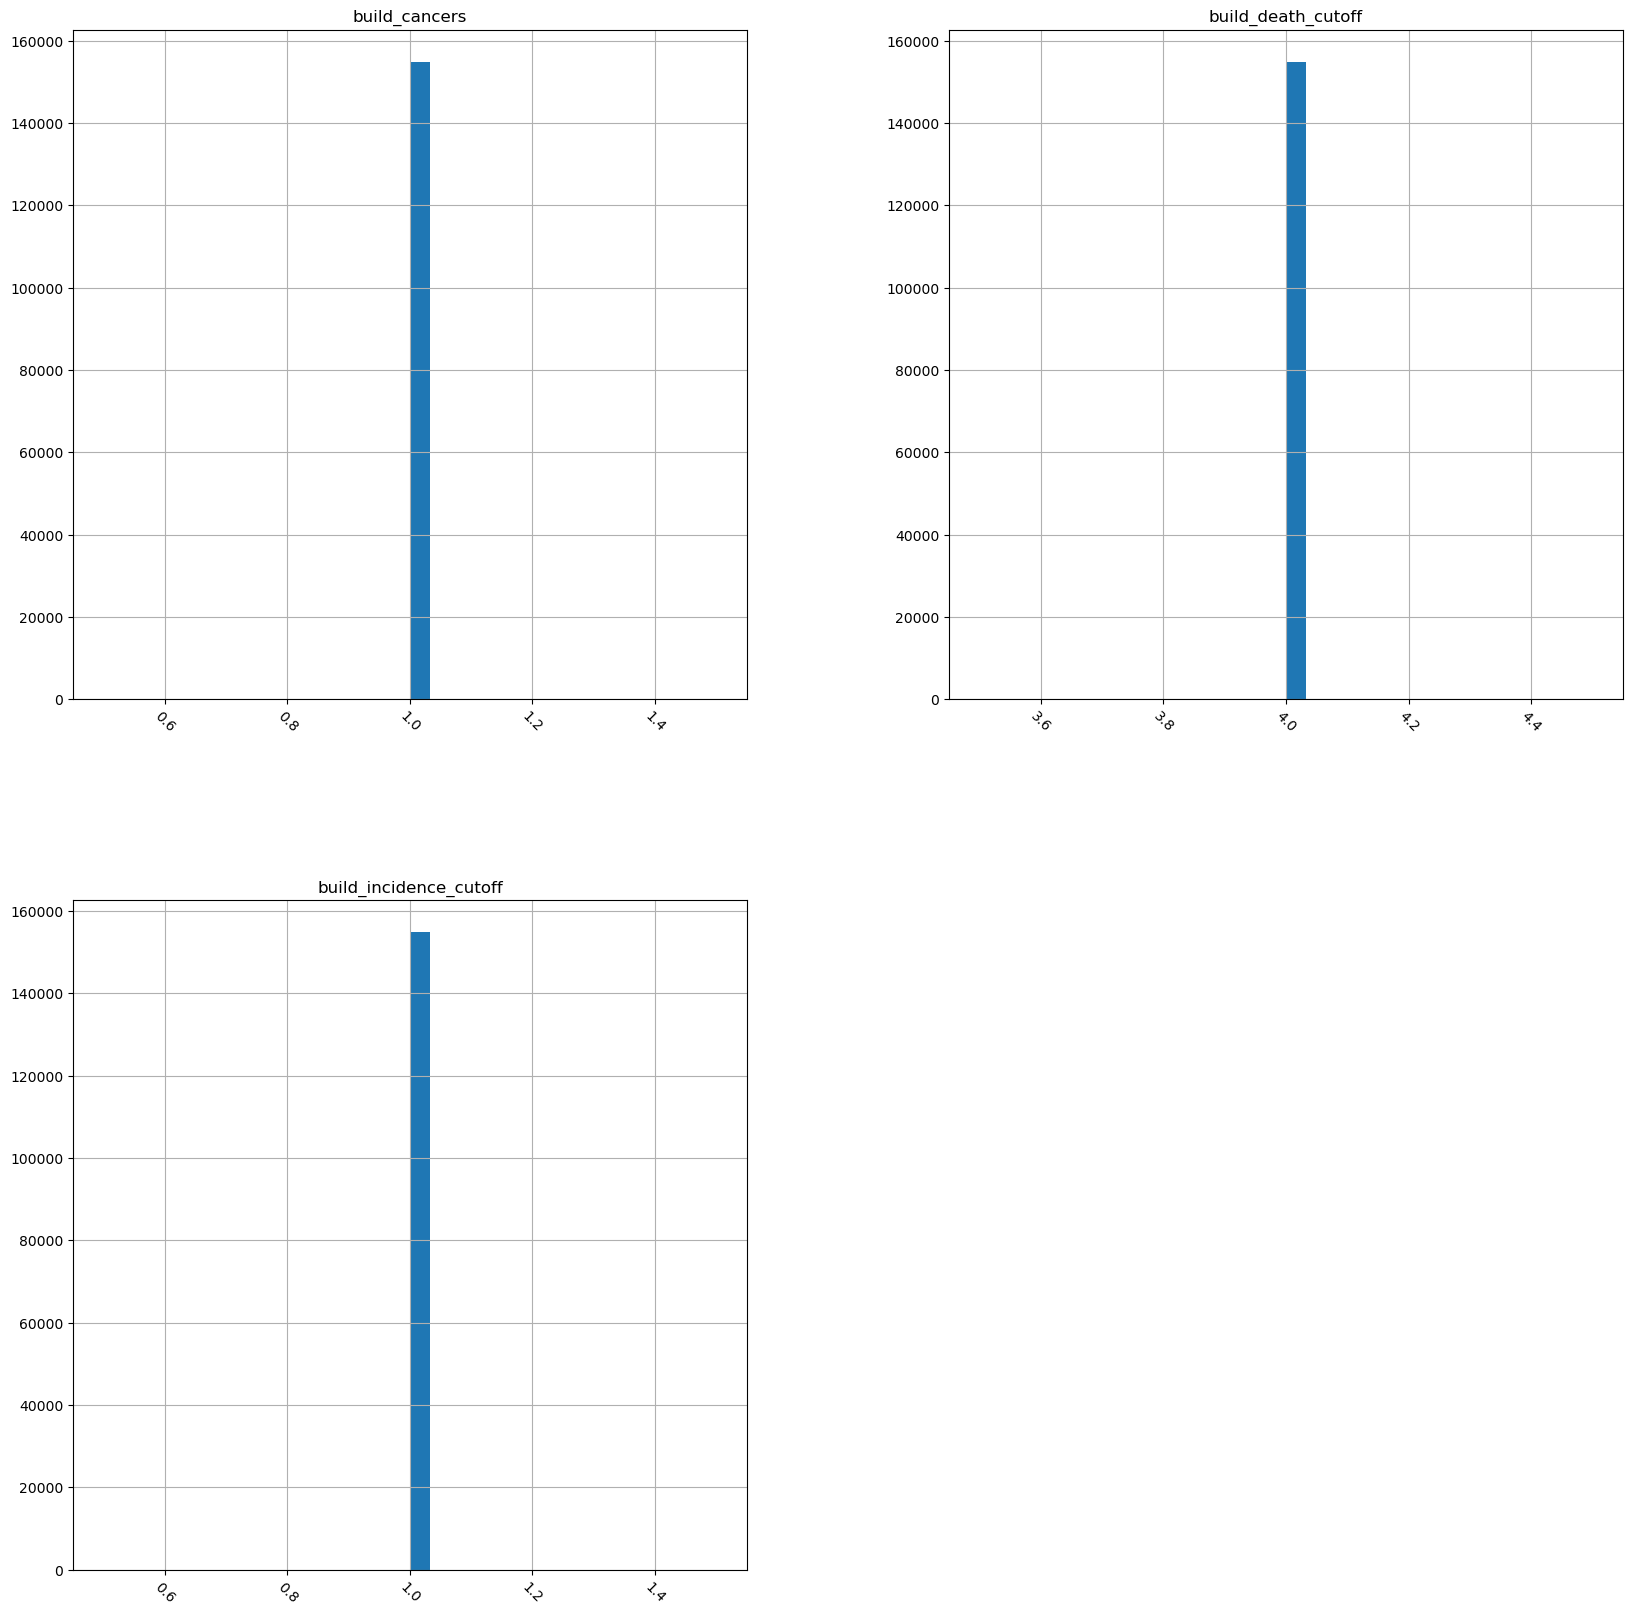

In [18]:
section1_df[section1_num_cols].hist(figsize=(20,20), bins = 30, xrot=-45 ,)

After analysing the variables in the section 1, I have decided only keep the one called "plco_id", and use it as id, and delete the rest, ('build', 'build_cancers', 'build_death_cutoff', 'build_incidence_cutoff'), because the only take one single value which doesn't affect to the construction of my model.

## Section 2: Study
---

In [21]:
section2_df = liver_cancer_df[section2]
section2_df

ph_liver_trial  ph_any_trial  in_TGWAS_population
0                    0             0                    1
1                    0             0                    1
2                    0             0                    0
3                    0             0                    1
4                    0             0                    1
...                ...           ...                  ...
154882               0             0                    1
154883               0             0                    1
154884               0             0                    0
154885               0             0                    0
154886               0             0                    0

[154887 rows x 3 columns]

In [22]:
daf.nulls_percentage(section2_df)

ph_liver_trial , 0.0% nulls , 3 unique values, int64
ph_any_trial , 0.0% nulls , 3 unique values, int64
in_TGWAS_population , 0.0% nulls , 2 unique values, int64


In [23]:
section2_df.describe().T

count      mean       std  min  25%  50%  75%  max
ph_liver_trial       154887.0  0.290244  1.589667  0.0  0.0  0.0  0.0  9.0
ph_any_trial         154887.0  0.330880  1.585438  0.0  0.0  0.0  0.0  9.0
in_TGWAS_population  154887.0  0.713824  0.451974  0.0  0.0  1.0  1.0  1.0

array([[<Axes: title={'center': 'ph_liver_trial'}>,
        <Axes: title={'center': 'ph_any_trial'}>],
       [<Axes: title={'center': 'in_TGWAS_population'}>, <Axes: >]],
      dtype=object)

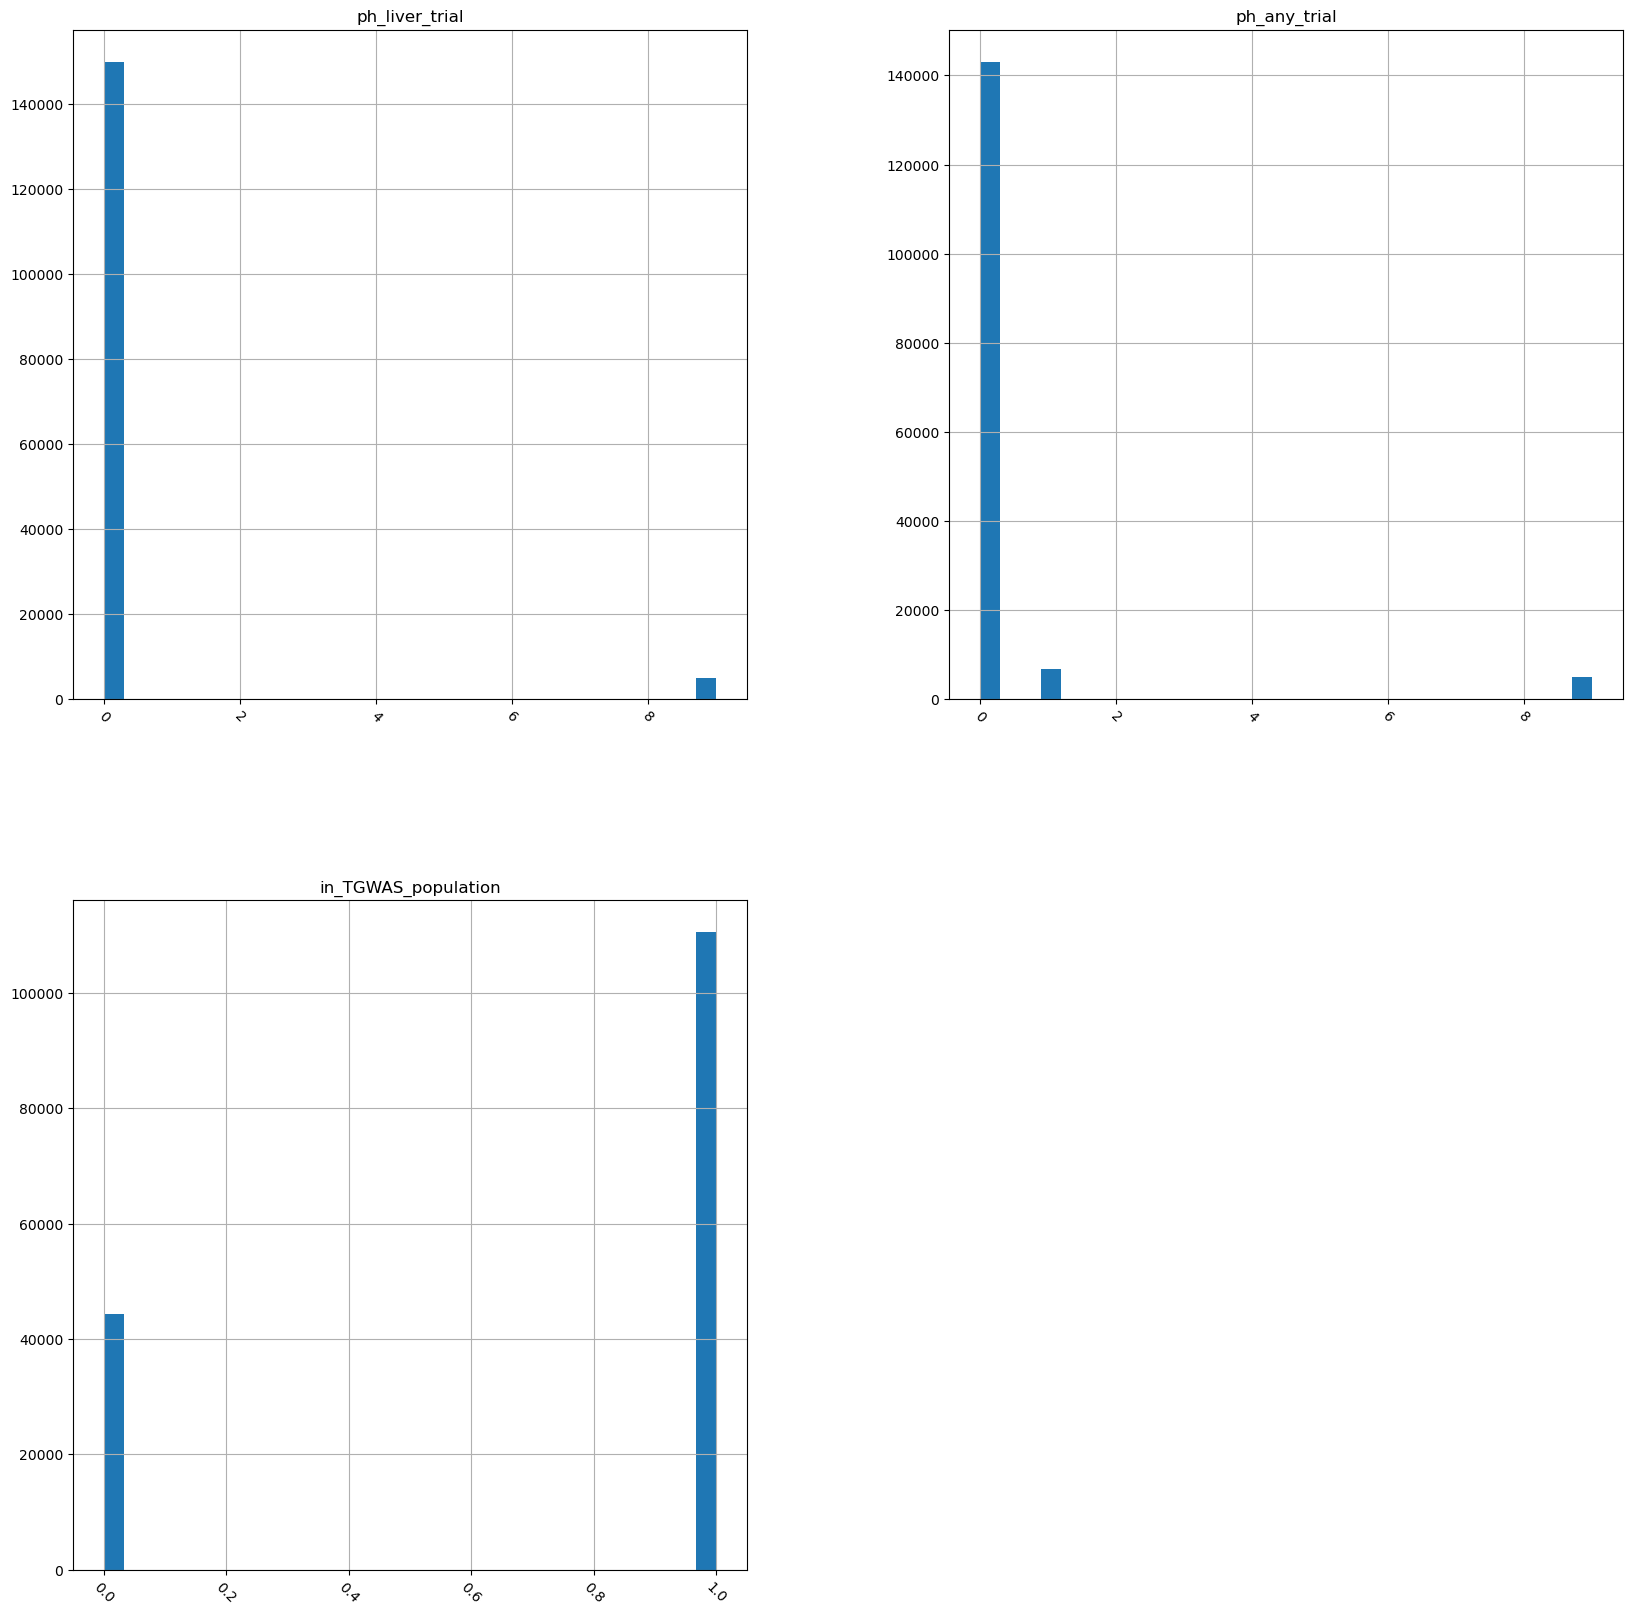

In [24]:
section2_df.hist(figsize=(20,20), bins = 30, xrot=-45 ,)

In [25]:
section2_df.ph_liver_trial.value_counts()

ph_liver_trial
0    149876
9      4993
1        18
Name: count, dtype: int64

In [26]:
section2_df.ph_any_trial.value_counts()

ph_any_trial
0    143086
1      6870
9      4931
Name: count, dtype: int64

In [27]:
section2_df.in_TGWAS_population.value_counts()

in_TGWAS_population
1    110562
0     44325
Name: count, dtype: int64

## Section 3: BQ Eligibility
---

In [29]:
section3_df = liver_cancer_df[section3]
section3_df

liver_eligible_bq  entryage_bq  entrydays_bq  ph_liver_bq  ph_any_bq
0                       1         67.0           0.0          0.0        0.0
1                       1         62.0           0.0          0.0        0.0
2                       1         63.0          15.0          0.0        0.0
3                       1         74.0           0.0          0.0        0.0
4                       1         63.0          20.0          0.0        0.0
...                   ...          ...           ...          ...        ...
154882                  1         58.0           0.0          0.0        0.0
154883                  1         62.0           0.0          0.0        0.0
154884                  1         72.0           0.0          0.0        0.0
154885                  1         62.0           0.0          0.0        0.0
154886                  1         57.0           0.0          0.0        0.0

[154887 rows x 5 columns]

In [30]:
daf.nulls_percentage(section3_df)

liver_eligible_bq , 0.0% nulls , 2 unique values, int64
entryage_bq , 3.2% nulls , 30 unique values, float64
entrydays_bq , 3.2% nulls , 550 unique values, float64
ph_liver_bq , 3.2% nulls , 3 unique values, float64
ph_any_bq , 3.2% nulls , 3 unique values, float64


array([[<Axes: title={'center': 'liver_eligible_bq'}>,
        <Axes: title={'center': 'entryage_bq'}>],
       [<Axes: title={'center': 'entrydays_bq'}>,
        <Axes: title={'center': 'ph_liver_bq'}>],
       [<Axes: title={'center': 'ph_any_bq'}>, <Axes: >]], dtype=object)

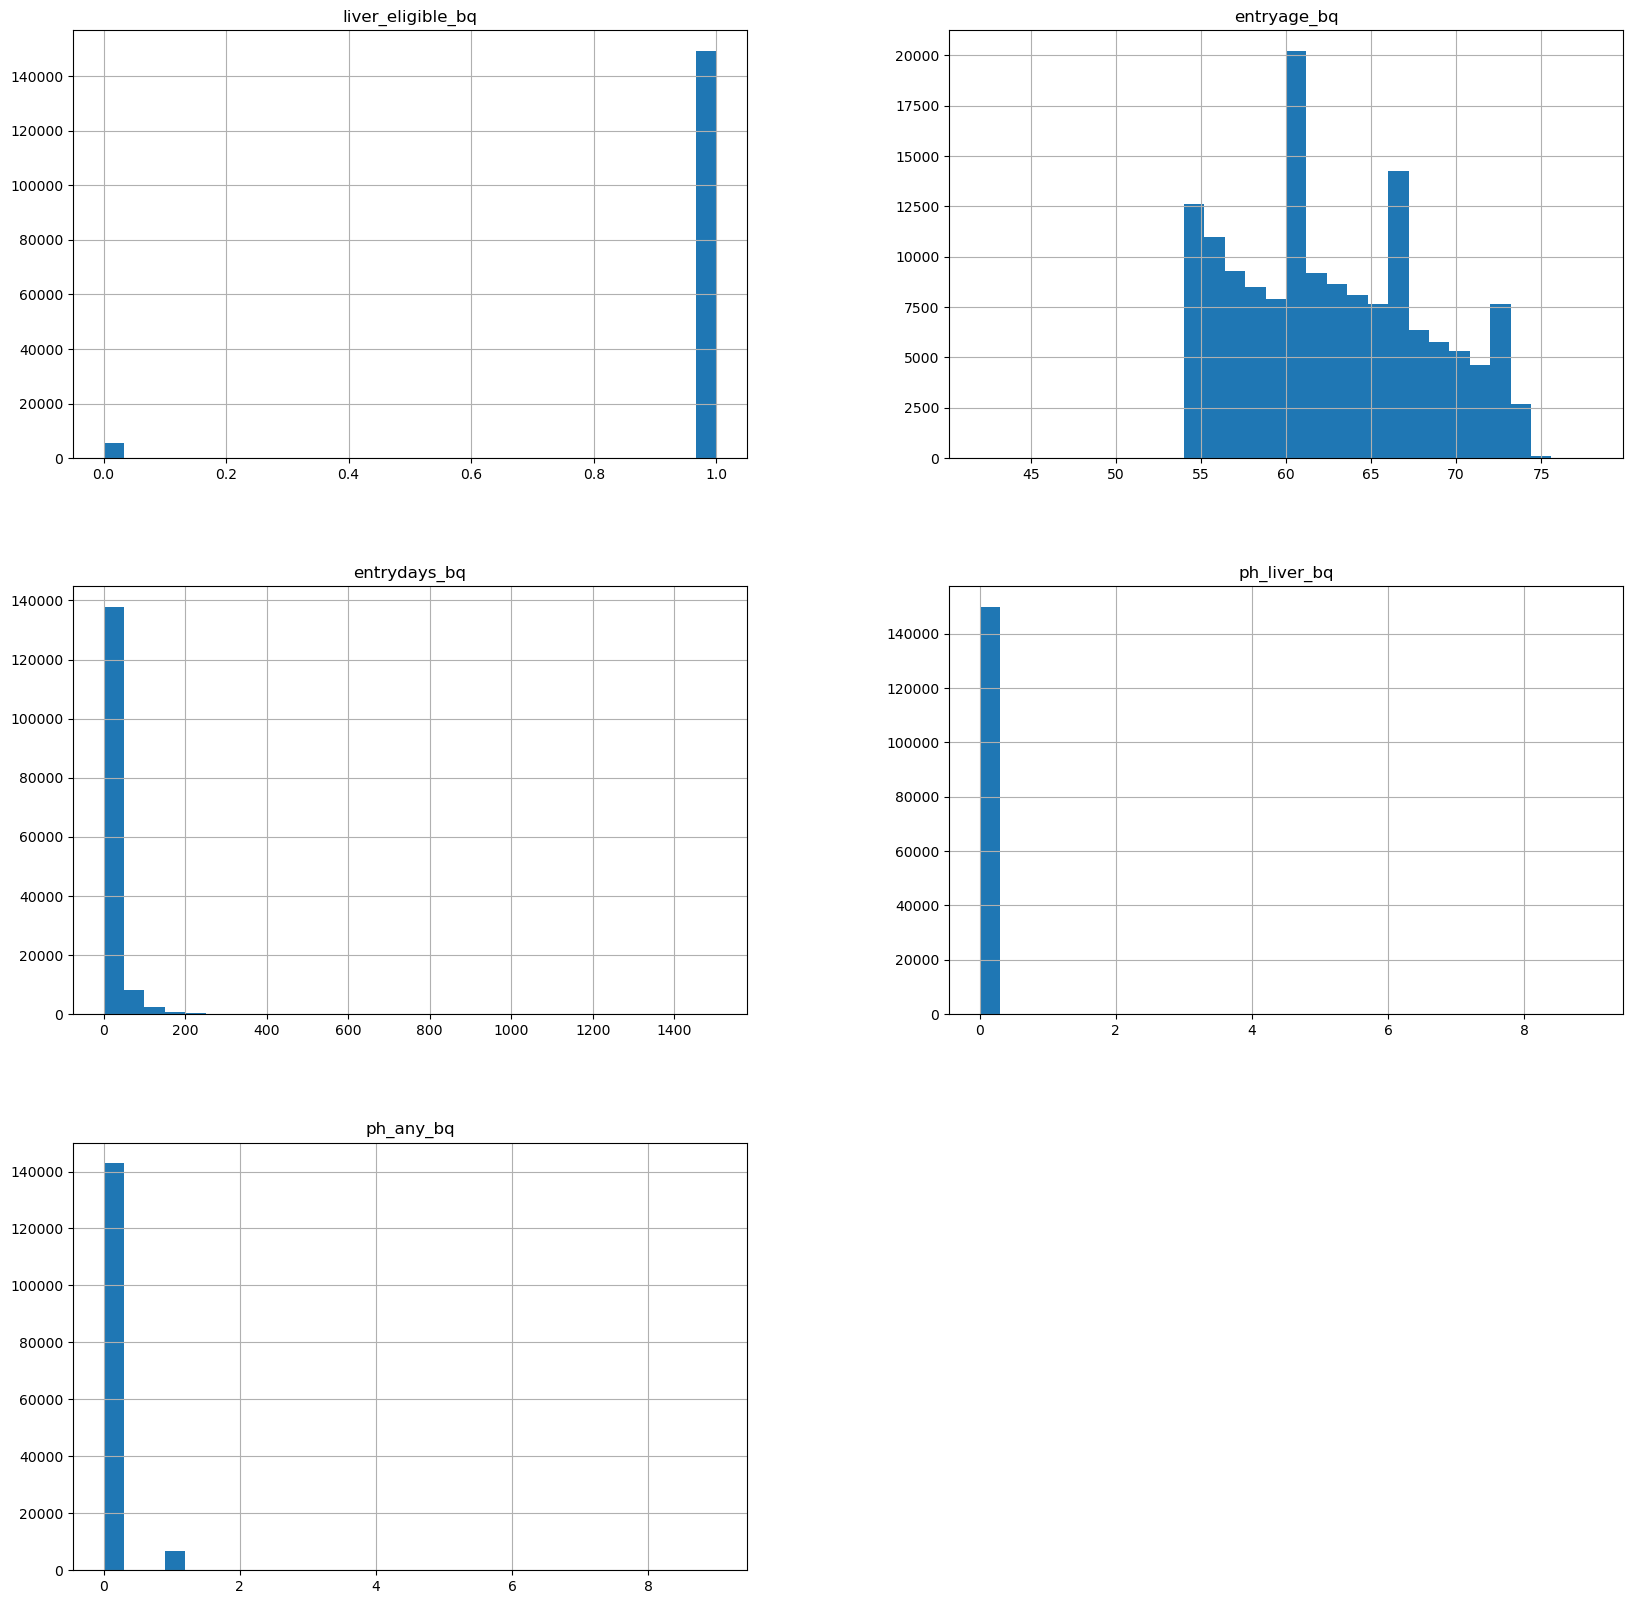

In [31]:
section3_df.hist(figsize=(20,20), bins = 30)

In [32]:
section3_df.liver_eligible_bq.value_counts()

liver_eligible_bq
1    149369
0      5518
Name: count, dtype: int64

In [33]:
sectionT = ['liver_eligible_bq', 'ph_liver_trial']
sectionT_df = liver_cancer_df[sectionT]
sectionT_df.value_counts()

liver_eligible_bq  ph_liver_trial
1                  0                 149369
0                  9                   4993
                   0                    507
                   1                     18
Name: count, dtype: int64

We can observe, how in our variable "liver_eligible_bq", the ones that indicates if a participant in our screening questionnaire has a valid data or not, 5518 cases of people whose formulary was rejected. One of the causes of rejection is had a history of cancer prior to the trial.

I am going to delete those patients, (rows), from our dataset. 

In [35]:
liver_cancer_df_with_bq = liver_cancer_df.query('liver_eligible_bq != 0')
liver_cancer_df_with_bq

liver_topography  liver_morphology  liver_grade  liver_behavior  \
0                   NaN               NaN          NaN             NaN   
1                   NaN               NaN          NaN             NaN   
2                   NaN               NaN          NaN             NaN   
3                   NaN               NaN          NaN             NaN   
4                   NaN               NaN          NaN             NaN   
...                 ...               ...          ...             ...   
154882              NaN               NaN          NaN             NaN   
154883              NaN               NaN          NaN             NaN   
154884              NaN               NaN          NaN             NaN   
154885              NaN               NaN          NaN             NaN   
154886              NaN               NaN          NaN             NaN   

        liver_cancer_first  liver_cancer  liver_seer  liver_seercat  \
0                      NaN             0         NaN            NaN   
1                      NaN             0         NaN            NaN   
2                      NaN             0         NaN            NaN   
3                      NaN             0         NaN            NaN   
4                      NaN             0         NaN            NaN   
...                    ...           ...         ...            ...   
154882                 NaN             0         NaN            NaN   
154883                 NaN             0         NaN            NaN   
154884                 NaN             0         NaN            NaN   
154885                 NaN             0         NaN            NaN   
154886                 NaN             0         NaN            NaN   

        liver_annyr  liver_exitstat  liver_exitage  liver_exitdays  \
0               NaN               8             80            4794   
1               NaN               8             72            3873   
2               NaN               8             74            4123   
3               NaN               8             87            4672   
4               NaN               8             72            3386   
...             ...             ...            ...             ...   
154882          NaN               8             69            4207   
154883          NaN               8             77            5539   
154884          NaN               5             78            2152   
154885          NaN               5             75            4524   
154886          NaN               5             62            1579   

        liver_cancer_diagdays     plco_id           build  build_cancers  \
0                         NaN  A-000899-7  mar22/03.22.22              1   
1                         NaN  A-000989-6  mar22/03.22.22              1   
2                         NaN  A-000998-7  mar22/03.22.22              1   
3                         NaN  A-001799-8  mar22/03.22.22              1   
4                         NaN  A-001889-7  mar22/03.22.22              1   
...                       ...         ...             ...            ...   
154882                    NaN  Z-162295-2  mar22/03.22.22              1   
154883                    NaN  Z-162349-7  mar22/03.22.22              1   
154884                    NaN  Z-162358-8  mar22/03.22.22              1   
154885                    NaN  Z-162367-9  mar22/03.22.22              1   
154886                    NaN  Z-162376-0  mar22/03.22.22              1   

        build_incidence_cutoff  educat  marital  occupat  pipe  cigar  \
0                            1     2.0      3.0      4.0   0.0    0.0   
1                            1     7.0      1.0      2.0   2.0    2.0   
2                            1     5.0      1.0      4.0   0.0    0.0   
3                            1     5.0      1.0      1.0   0.0    0.0   
4                            1     6.0      3.0      2.0   0.0    0.0   
...                        ...     ...      ...      ...   ...    ...   


From now on, I will use the dataset without those rows, called 'liver_cancer_df_with_bq'. However, any of the variables inside this section will be considered for my final model.

## Section 4: DHQ Eligibility
---

I am only consider the data that comes from the BQ formulary. In that formulary we have the variables that we need,
so I won't take these variables in my model.

## Section 5: DQX Eligibility
---

I am only consider the data that comes from the BQ formulary. In that formulary we have the variables that we need,
so I won't take these variables in my model.

## Section 6: SQX Eligibility
---

I am only consider the data that comes from the BQ formulary. In that formulary we have the variables that we need,
so I won't take these variables in my model.

## Section 7: MUQ Eligibility
---

I am only consider the data that comes from the BQ formulary. In that formulary we have the variables that we need,
so I won't take these variables in my model.

## Section 8: Exit
---

In [46]:
section8_df = liver_cancer_df_with_bq[section8]
section8_df

fstcan_exitstat  liver_exitstat  fstcan_exitdays  liver_exitdays  \
0                     8               8             4794            4794   
1                     8               8             3873            3873   
2                     8               8             4123            4123   
3                     8               8             4672            4672   
4                     8               8             3386            3386   
...                 ...             ...              ...             ...   
154882                8               8             4207            4207   
154883                1               8             3994            5539   
154884                5               5             2152            2152   
154885                1               5              250            4524   
154886                5               5             1579            1579   

        fstcan_exitage  liver_exitage  mortality_exitstat  mortality_exitdays  \
0                   80             80                   1                7939   
1                   72             72                   2                7160   
2                   74             74                   2                7410   
3                   87             87                   3                5621   
4                   72             72                   2                6673   
...                ...            ...                 ...                 ...   
154882              69             69                   2                7494   
154883              73             77                   1                7099   
154884              78             78                   1                2152   
154885              63             75                   1                4524   
154886              62             62                   1                1579   

        mortality_exitage  
0                      88  
1                      81  
2                      83  
3                      90  
4                      81  
...                   ...  
154882                 78  
154883                 81  
154884                 78  
154885                 75  
154886                 62  

[149369 rows x 9 columns]

In [47]:
daf.nulls_percentage(section8_df)

fstcan_exitstat , 0.0% nulls , 8 unique values, int64
liver_exitstat , 0.0% nulls , 8 unique values, int64
fstcan_exitdays , 0.0% nulls , 5903 unique values, int64
liver_exitdays , 0.0% nulls , 5823 unique values, int64
fstcan_exitage , 0.0% nulls , 38 unique values, int64
liver_exitage , 0.0% nulls , 37 unique values, int64
mortality_exitstat , 0.0% nulls , 4 unique values, int64
mortality_exitdays , 0.0% nulls , 9050 unique values, int64
mortality_exitage , 0.0% nulls , 45 unique values, int64


---

In this section, since my study is about the liver cancer, I am not going to consider the first cancer incidence variables. Then, I will delete from this section the paramaters 'fstcan_exitstat', 'fstcan_exitdays', 'fstcan_exitage'.

---

In [51]:
section8_df = section8_df.drop(['fstcan_exitstat', 'fstcan_exitdays', 'fstcan_exitage'], axis=1)

In [52]:
section8_df

liver_exitstat  liver_exitdays  liver_exitage  mortality_exitstat  \
0                    8            4794             80                   1   
1                    8            3873             72                   2   
2                    8            4123             74                   2   
3                    8            4672             87                   3   
4                    8            3386             72                   2   
...                ...             ...            ...                 ...   
154882               8            4207             69                   2   
154883               8            5539             77                   1   
154884               5            2152             78                   1   
154885               5            4524             75                   1   
154886               5            1579             62                   1   

        mortality_exitdays  mortality_exitage  
0                     7939                 88  
1                     7160                 81  
2                     7410                 83  
3                     5621                 90  
4                     6673                 81  
...                    ...                ...  
154882                7494                 78  
154883                7099                 81  
154884                2152                 78  
154885                4524                 75  
154886                1579                 62  

[149369 rows x 6 columns]

In [53]:
to_remove = ['fstcan_exitstat', 'fstcan_exitdays', 'fstcan_exitage']

section8 = [item for item in section8 if item not in to_remove]
print(section8)

['liver_exitstat', 'liver_exitdays', 'liver_exitage', 'mortality_exitstat', 'mortality_exitdays', 'mortality_exitage']


array([[<Axes: title={'center': 'liver_exitstat'}>,
        <Axes: title={'center': 'liver_exitdays'}>],
       [<Axes: title={'center': 'liver_exitage'}>,
        <Axes: title={'center': 'mortality_exitstat'}>],
       [<Axes: title={'center': 'mortality_exitdays'}>,
        <Axes: title={'center': 'mortality_exitage'}>]], dtype=object)

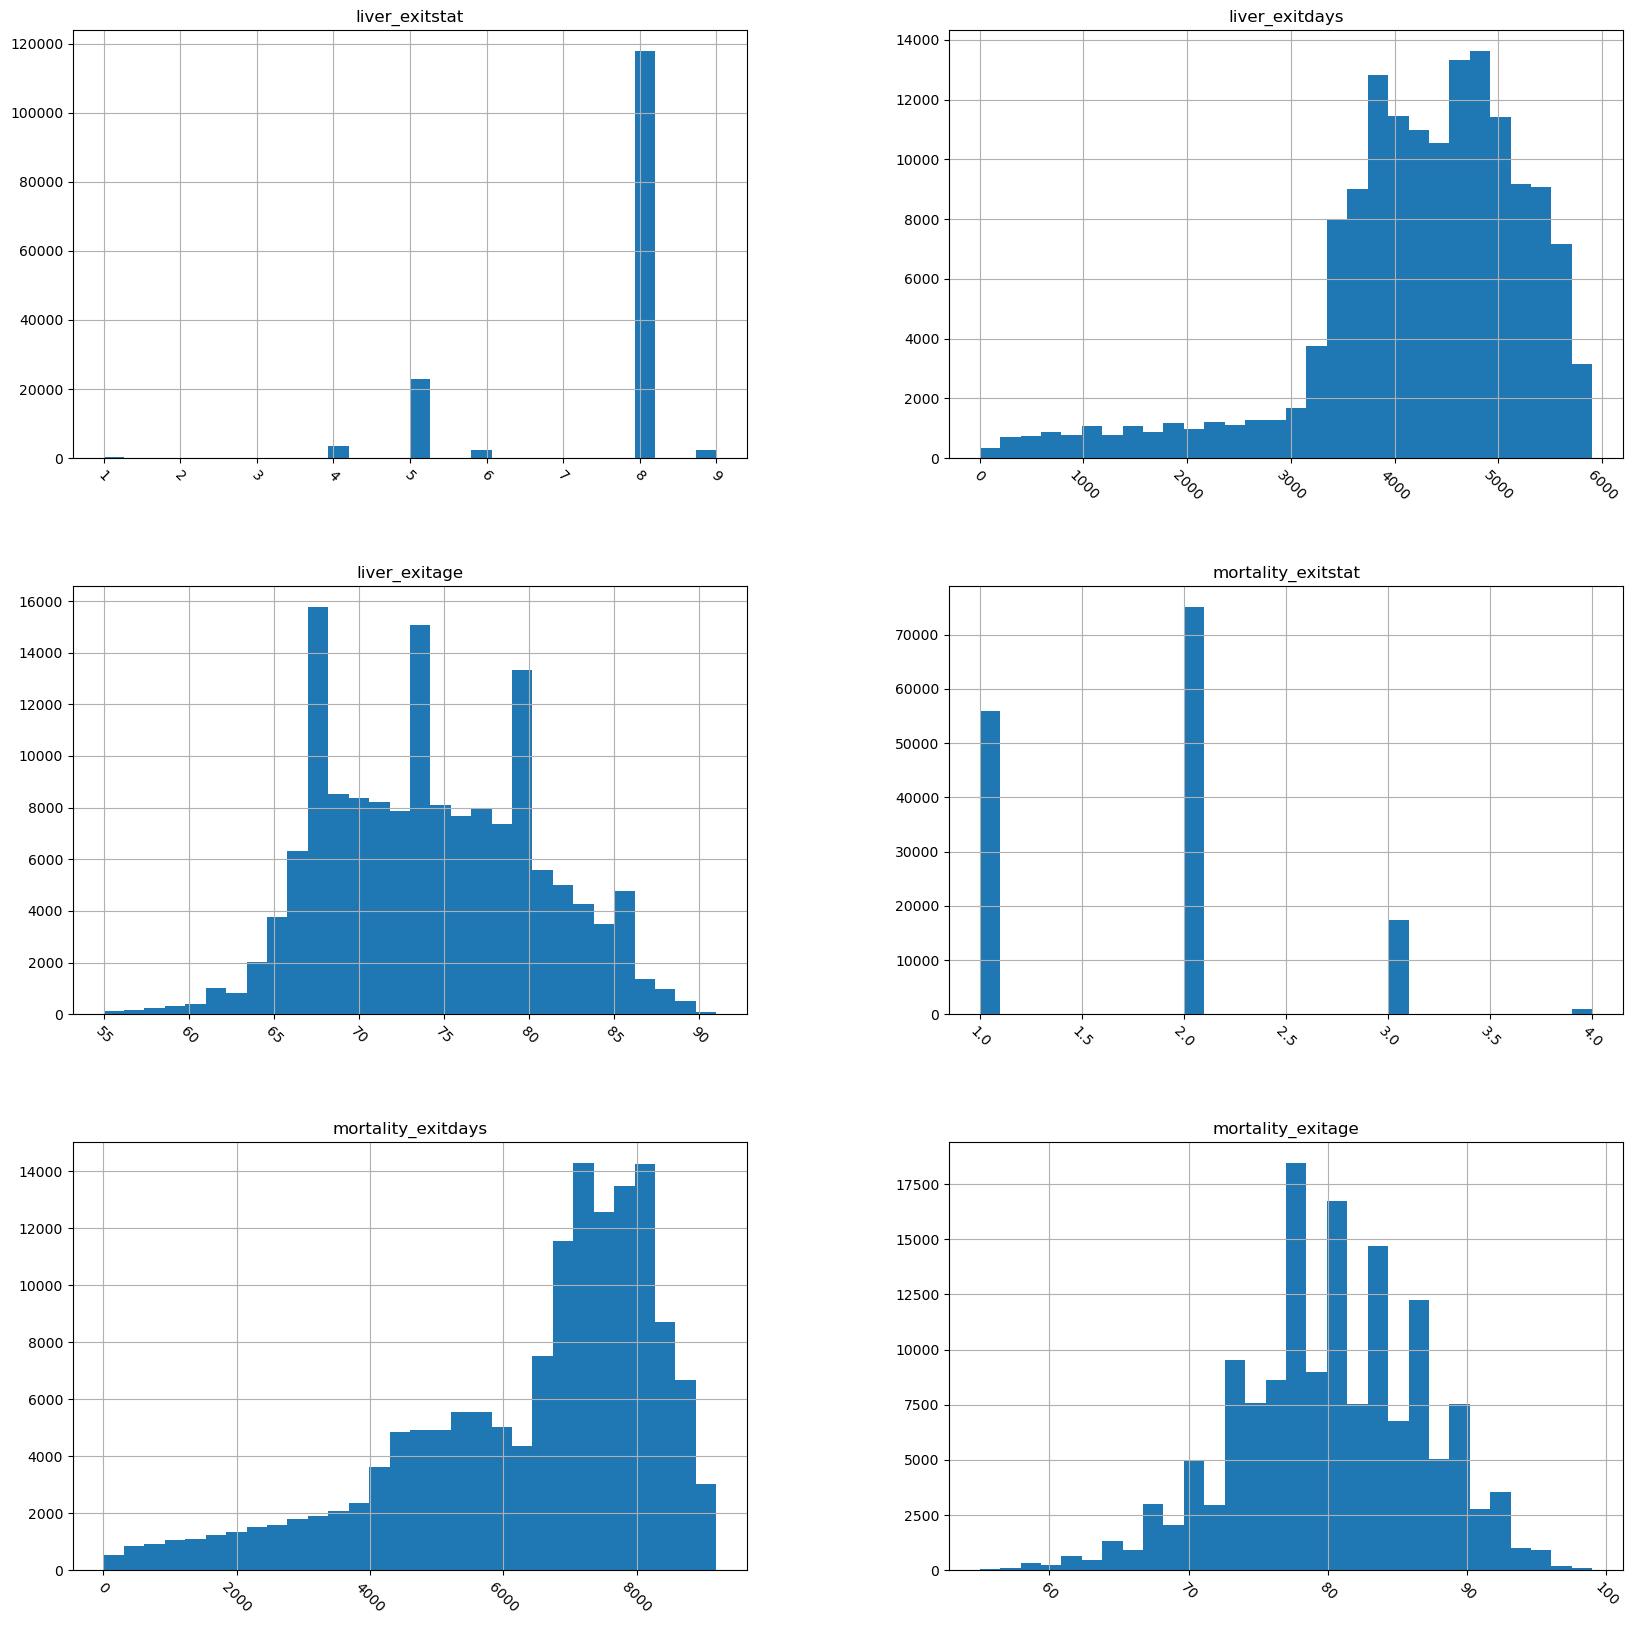

In [54]:
section8_df.hist(figsize=(20,20), bins = 30, xrot=-45 ,)

<Axes: >

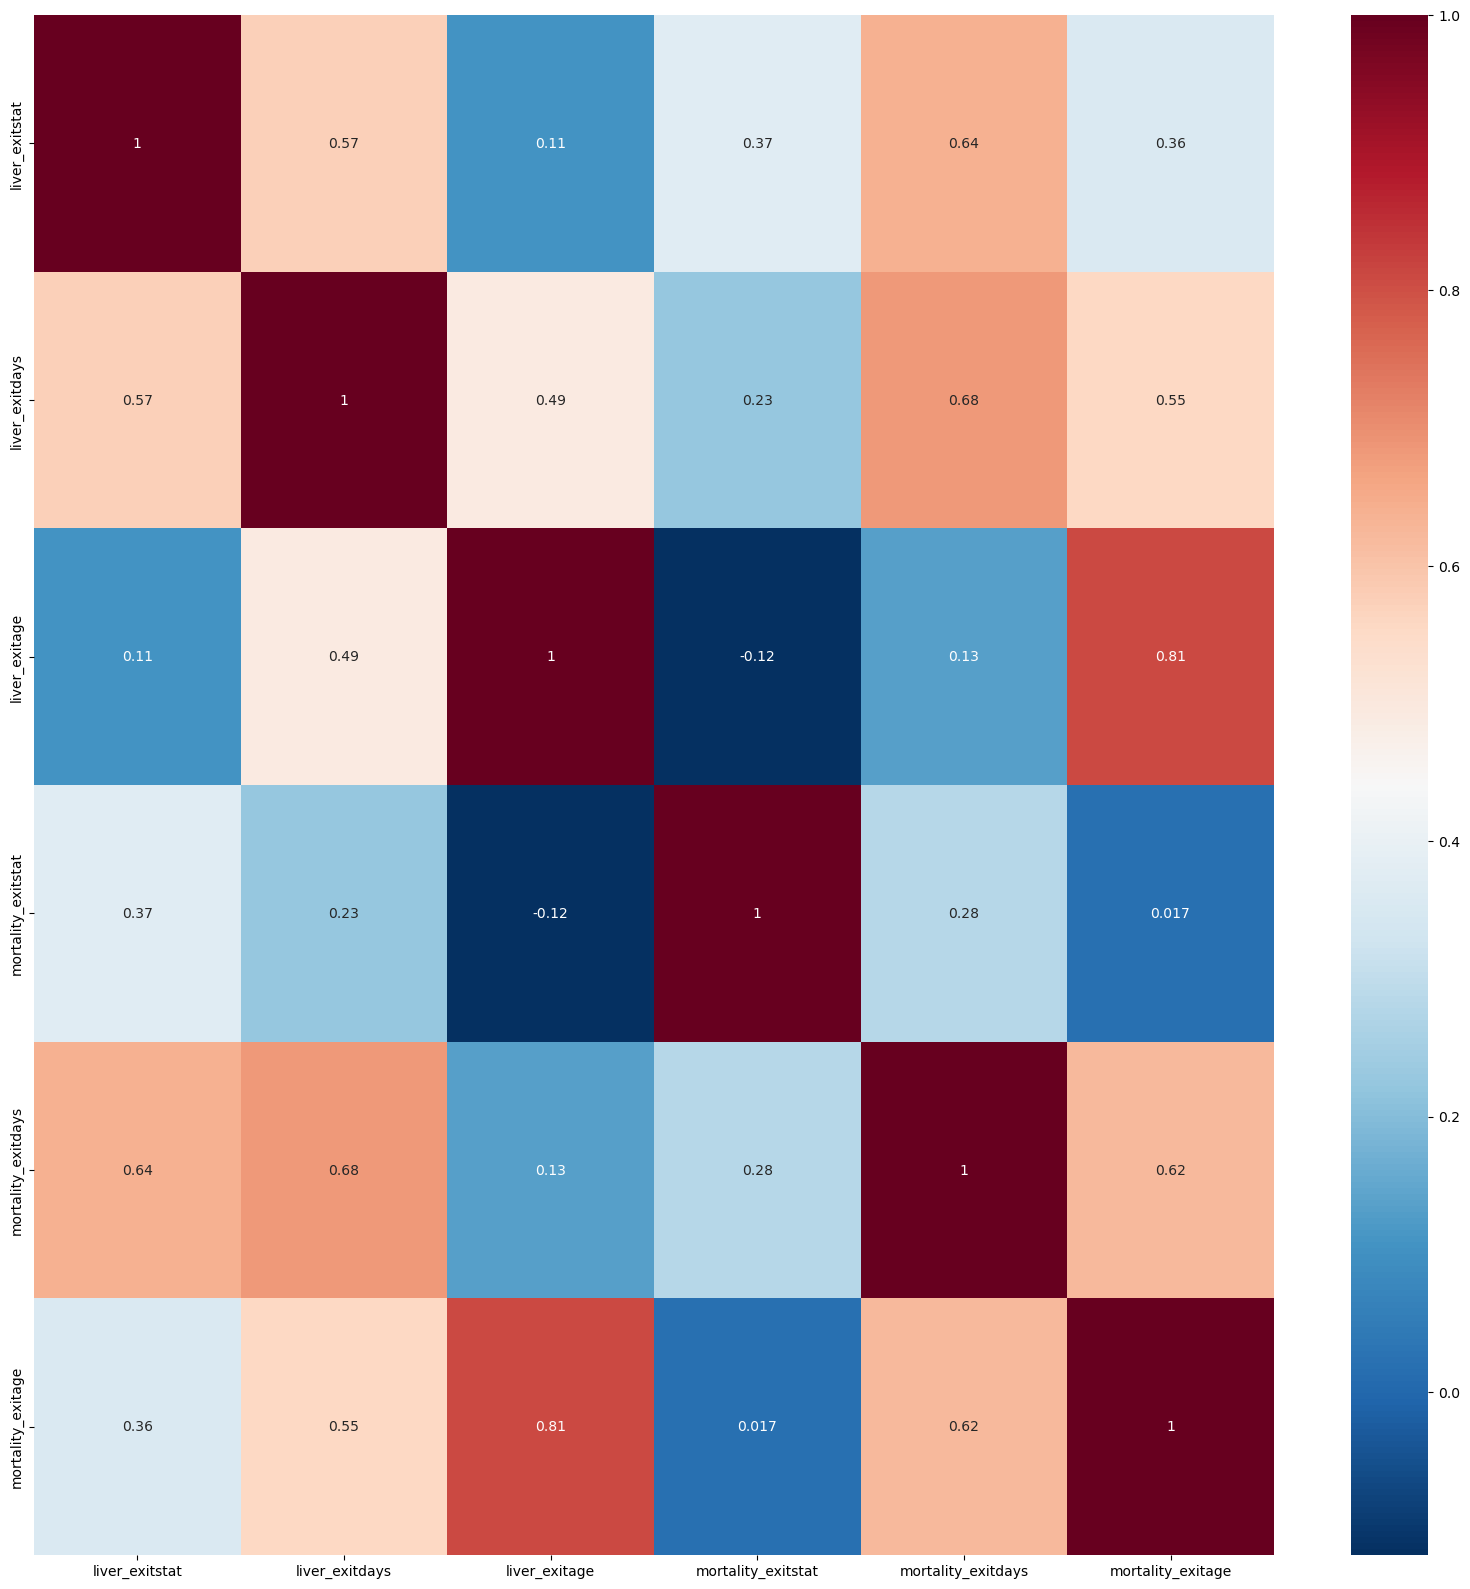

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section8].corr(), cmap='RdBu_r', annot = True)

In [56]:
to_remove = ['liver_exitdays', 'mortality_exitdays']

section8 = [item for item in section8 if item not in to_remove]
print(section8)

['liver_exitstat', 'liver_exitage', 'mortality_exitstat', 'mortality_exitage']


<Axes: >

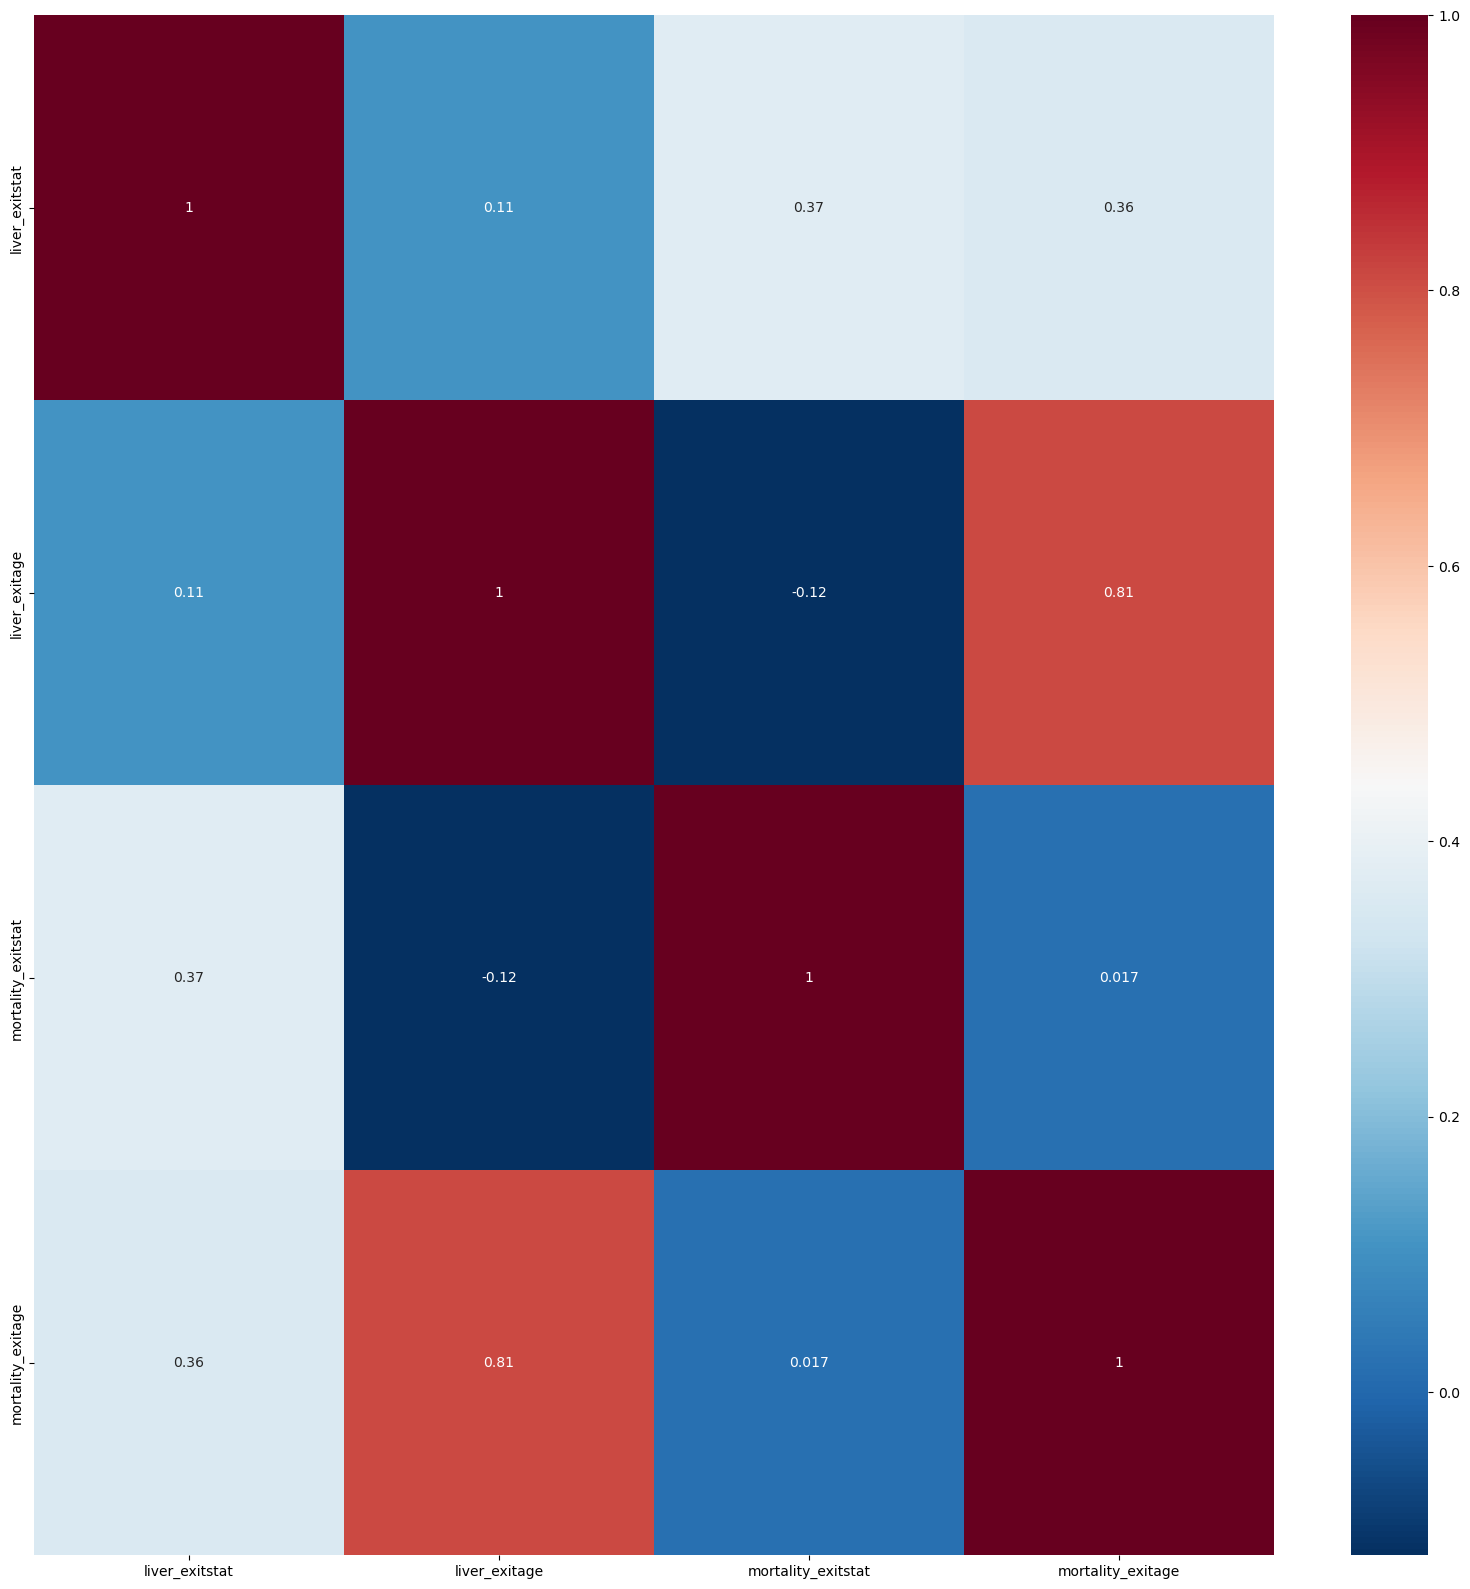

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section8].corr(), cmap='RdBu_r', annot = True)

## Section 9: Demographics at Trial Entry
---

In [59]:
section9_df = liver_cancer_df_with_bq[section9]
section9_df

age  agelevel  arm  center  rndyear  sex
0        67         2    1       4     1996    1
1        62         1    1       6     1999    1
2        62         1    2      10     1998    1
3        74         3    2       6     1997    2
4        63         1    2       5     2000    2
...     ...       ...  ...     ...      ...  ...
154882   58         0    2       3     1998    1
154883   62         1    2       9     1994    1
154884   72         3    2       4     1998    1
154885   62         1    2       4     1997    2
154886   57         0    2       4     1996    2

[149369 rows x 6 columns]

In [60]:
daf.nulls_percentage(section9_df)

age , 0.0% nulls , 30 unique values, int64
agelevel , 0.0% nulls , 4 unique values, int64
arm , 0.0% nulls , 2 unique values, int64
center , 0.0% nulls , 10 unique values, int64
rndyear , 0.0% nulls , 9 unique values, int64
sex , 0.0% nulls , 2 unique values, int64


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'agelevel'}>],
       [<Axes: title={'center': 'arm'}>,
        <Axes: title={'center': 'center'}>],
       [<Axes: title={'center': 'rndyear'}>,
        <Axes: title={'center': 'sex'}>]], dtype=object)

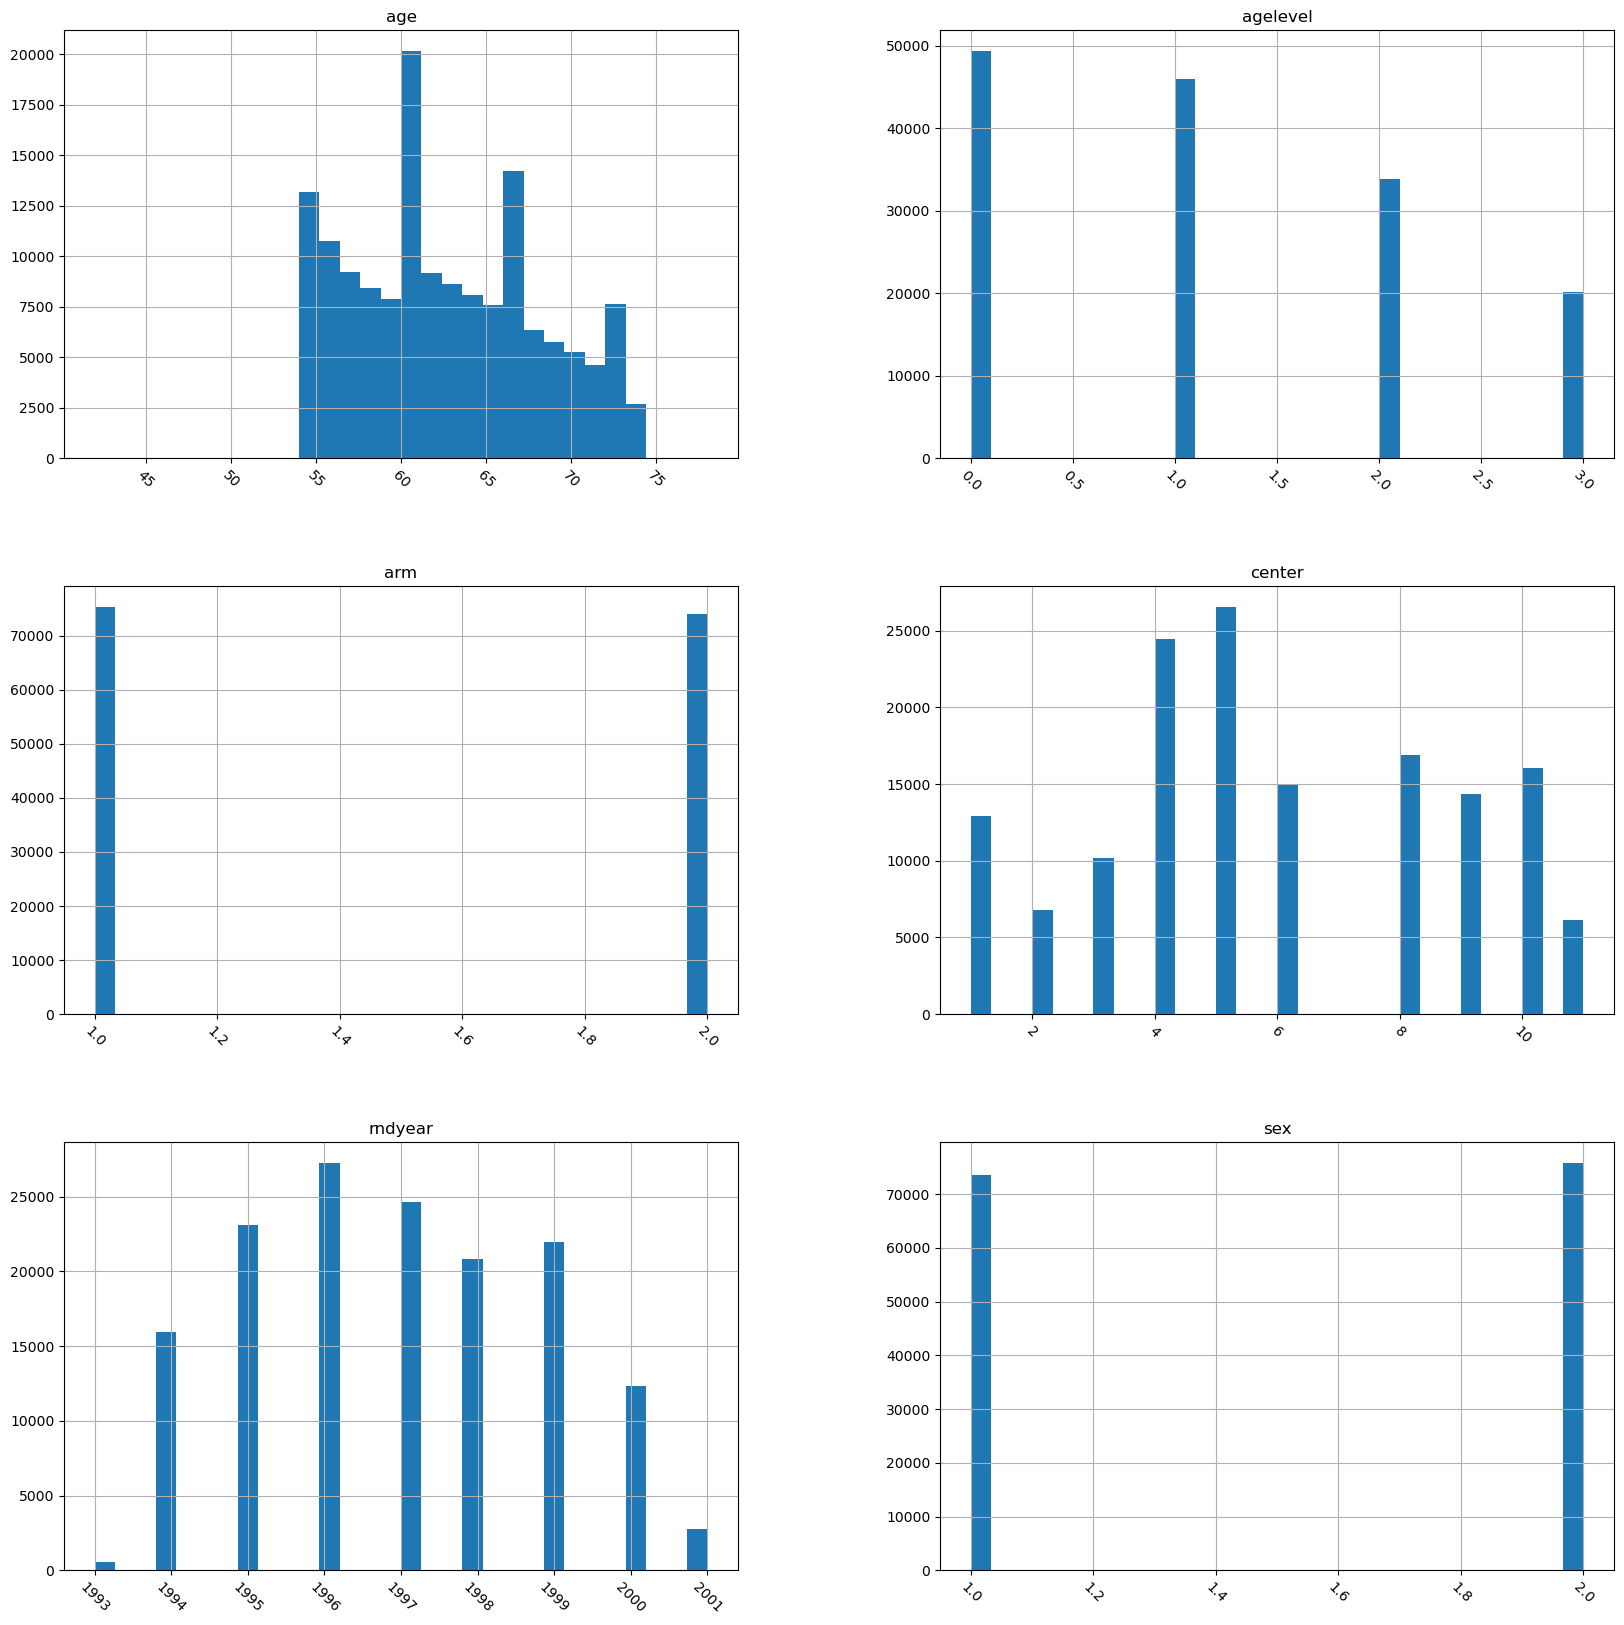

In [61]:
section9_df.hist(figsize=(20,20), bins = 30, xrot=-45)

<Axes: >

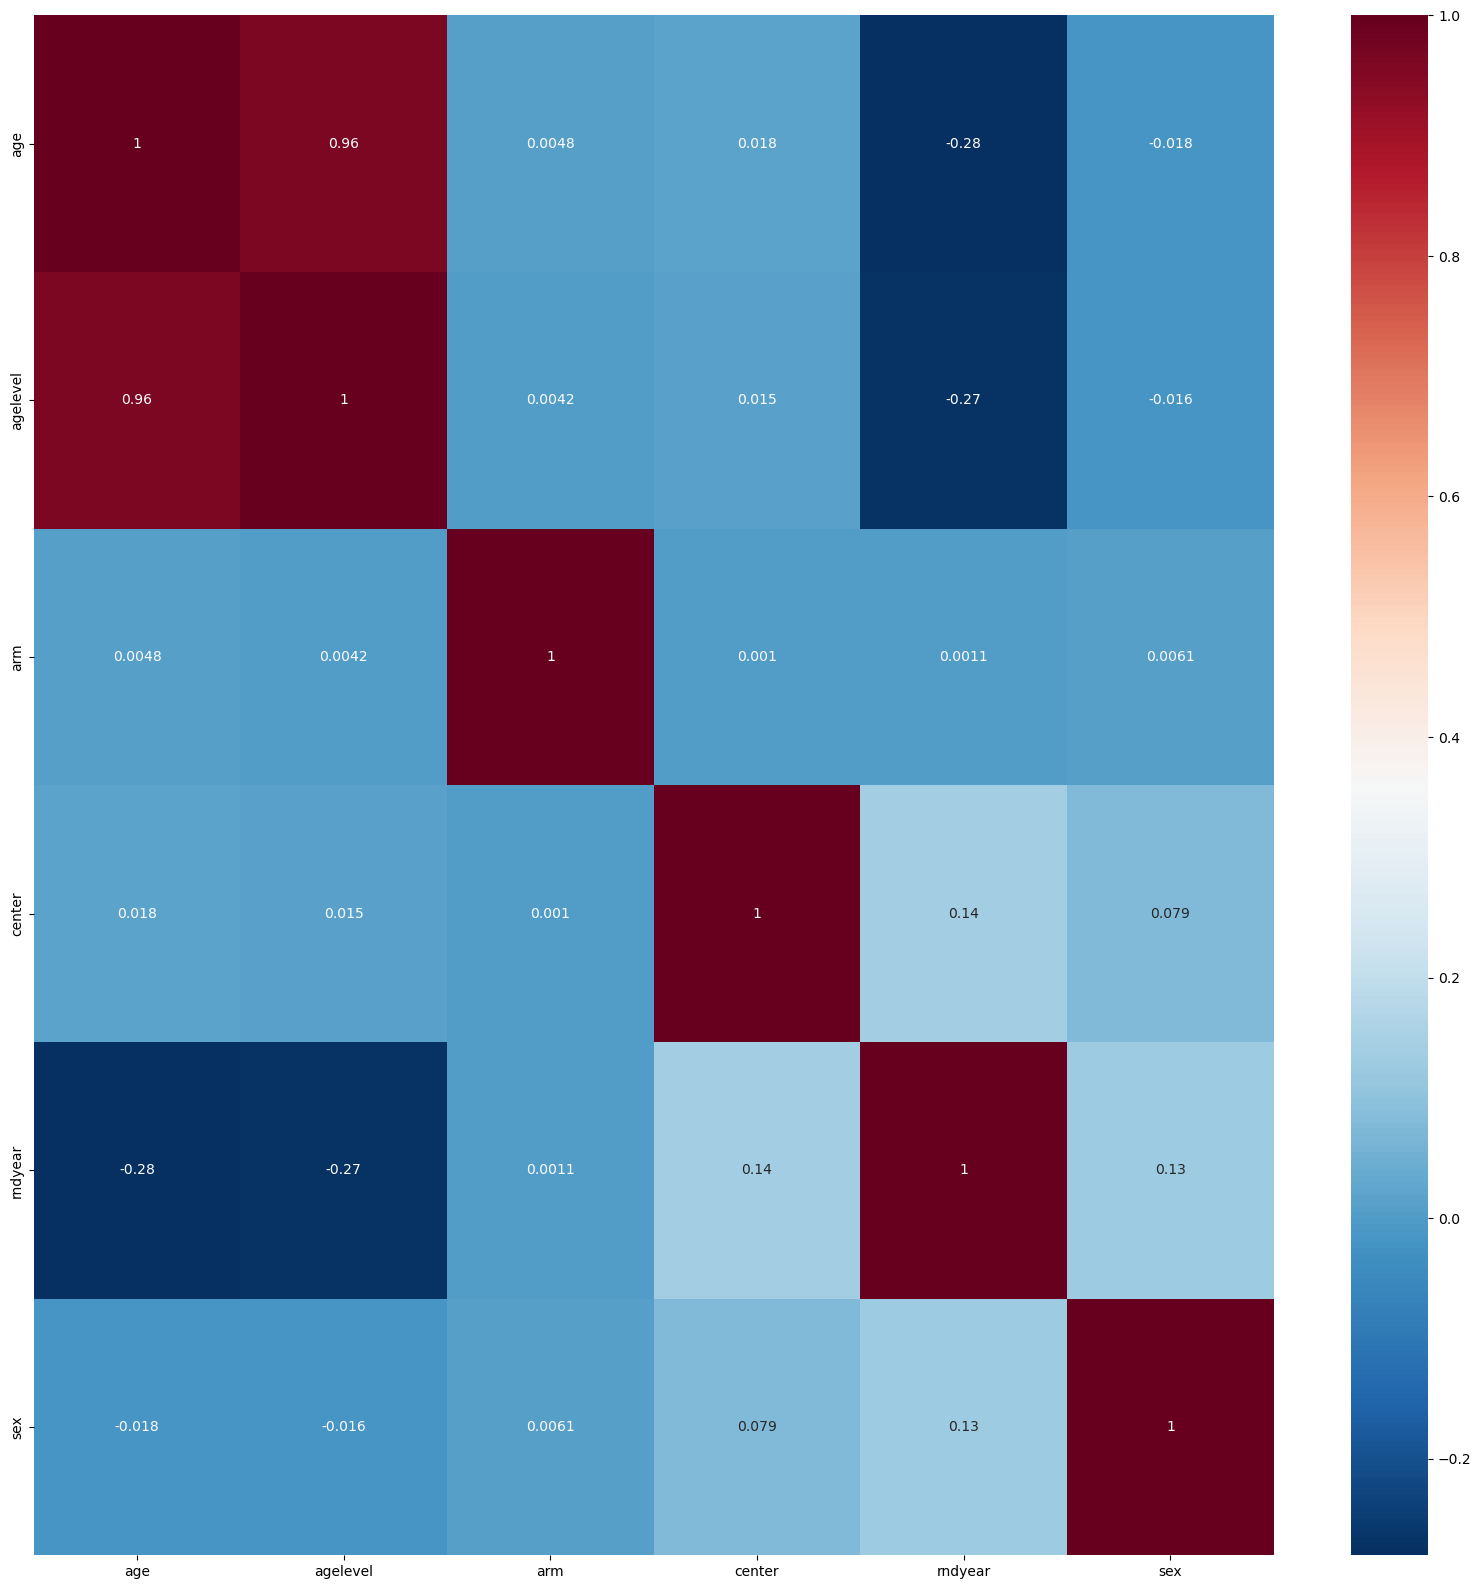

In [62]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section9].corr(), cmap='RdBu_r', annot = True)

---

We can observe the variables 'age' and 'agelevel', are highly correlated. Which makes sense, because both represent the age at trial entry, but agelevel is created from different categories. For our model I am going to consider only 'agelevel', because we have less different values.

---

## Section 10: Re-consent
---

In [67]:
section10_df = liver_cancer_df_with_bq[section10]
section10_df

reconsent_outcome  reconsent_outcome_days
0                       2                    5336
1                       1                    4759
2                       1                    4658
3                       5                    5621
4                       1                    4106
...                   ...                     ...
154882                  1                    4767
154883                  3                    6054
154884                 12                    2152
154885                 12                    4524
154886                 12                    1579

[149369 rows x 2 columns]

In [68]:
daf.nulls_percentage(section10_df)

reconsent_outcome , 0.0% nulls , 10 unique values, int64
reconsent_outcome_days , 0.0% nulls , 6649 unique values, int64


array([[<Axes: title={'center': 'reconsent_outcome'}>,
        <Axes: title={'center': 'reconsent_outcome_days'}>]], dtype=object)

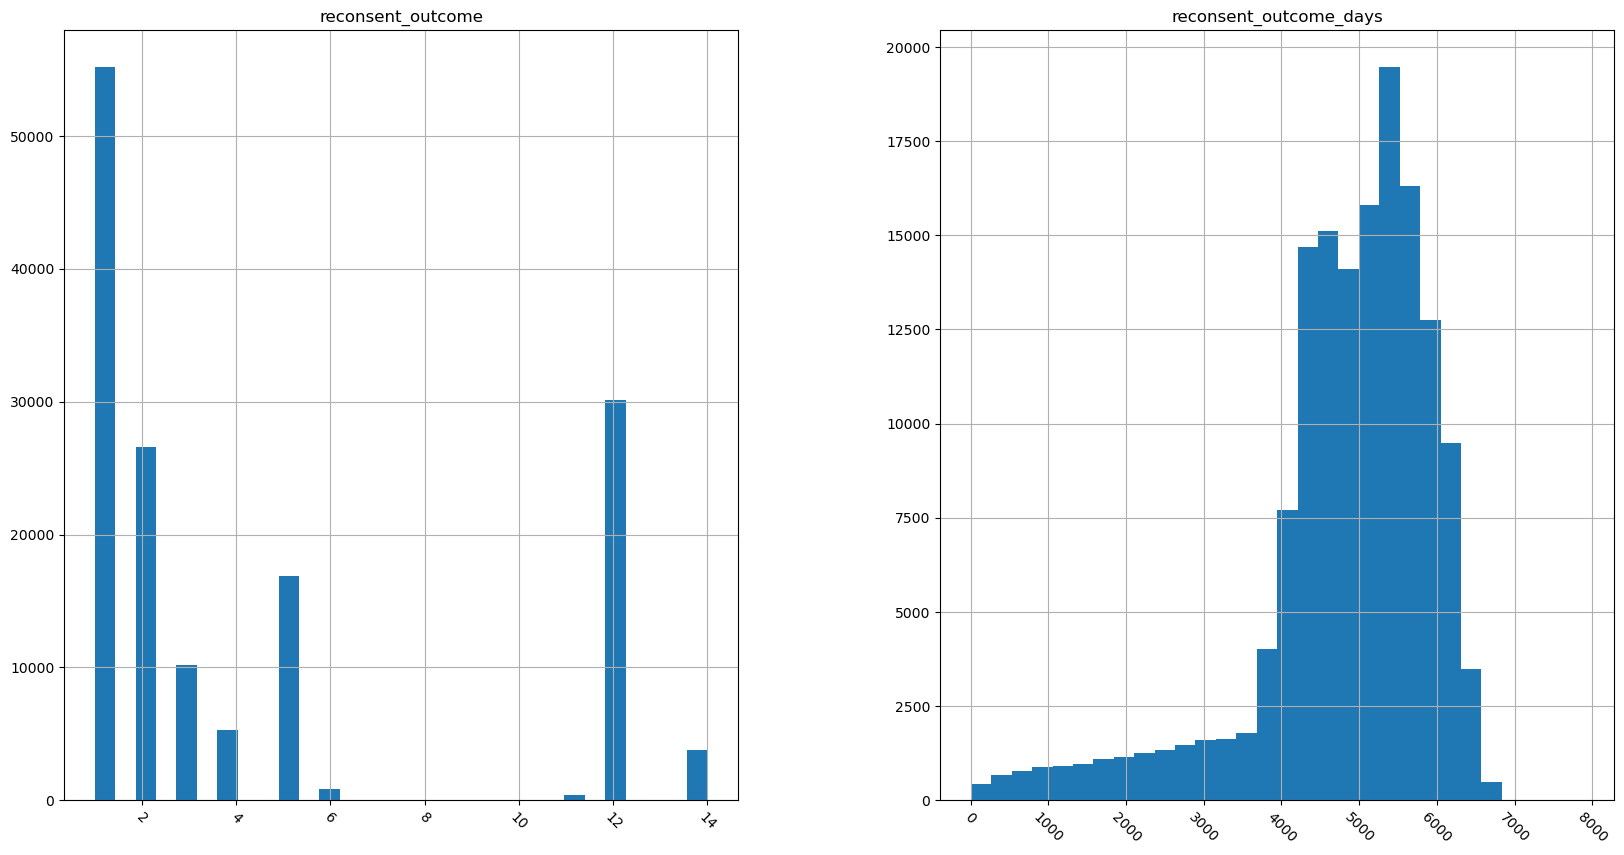

In [69]:
section10_df.hist(figsize=(20,10), bins = 30, xrot=-45)

---

These variables are not going to be considered to the model, because they don't give information more than information about consent to centralized follow-up. However, the important data, such as, liver cancer, cause of death, etc. are already present in our study.

---

## Section 11: Cancer Diagnosis
---

In [74]:
section11_df = liver_cancer_df_with_bq[section11]
section11_df

liver_cancer  liver_cancer_diagdays  liver_cancer_first  liver_annyr
0                  0                    NaN                 NaN          NaN
1                  0                    NaN                 NaN          NaN
2                  0                    NaN                 NaN          NaN
3                  0                    NaN                 NaN          NaN
4                  0                    NaN                 NaN          NaN
...              ...                    ...                 ...          ...
154882             0                    NaN                 NaN          NaN
154883             0                    NaN                 NaN          NaN
154884             0                    NaN                 NaN          NaN
154885             0                    NaN                 NaN          NaN
154886             0                    NaN                 NaN          NaN

[149369 rows x 4 columns]

In [75]:
daf.nulls_percentage(section11_df)

liver_cancer , 0.0% nulls , 2 unique values, int64
liver_cancer_diagdays , 99.9% nulls , 218 unique values, float64
liver_cancer_first , 99.9% nulls , 2 unique values, float64
liver_annyr , 99.9% nulls , 15 unique values, float64


array([[<Axes: title={'center': 'liver_cancer'}>,
        <Axes: title={'center': 'liver_cancer_diagdays'}>],
       [<Axes: title={'center': 'liver_cancer_first'}>,
        <Axes: title={'center': 'liver_annyr'}>]], dtype=object)

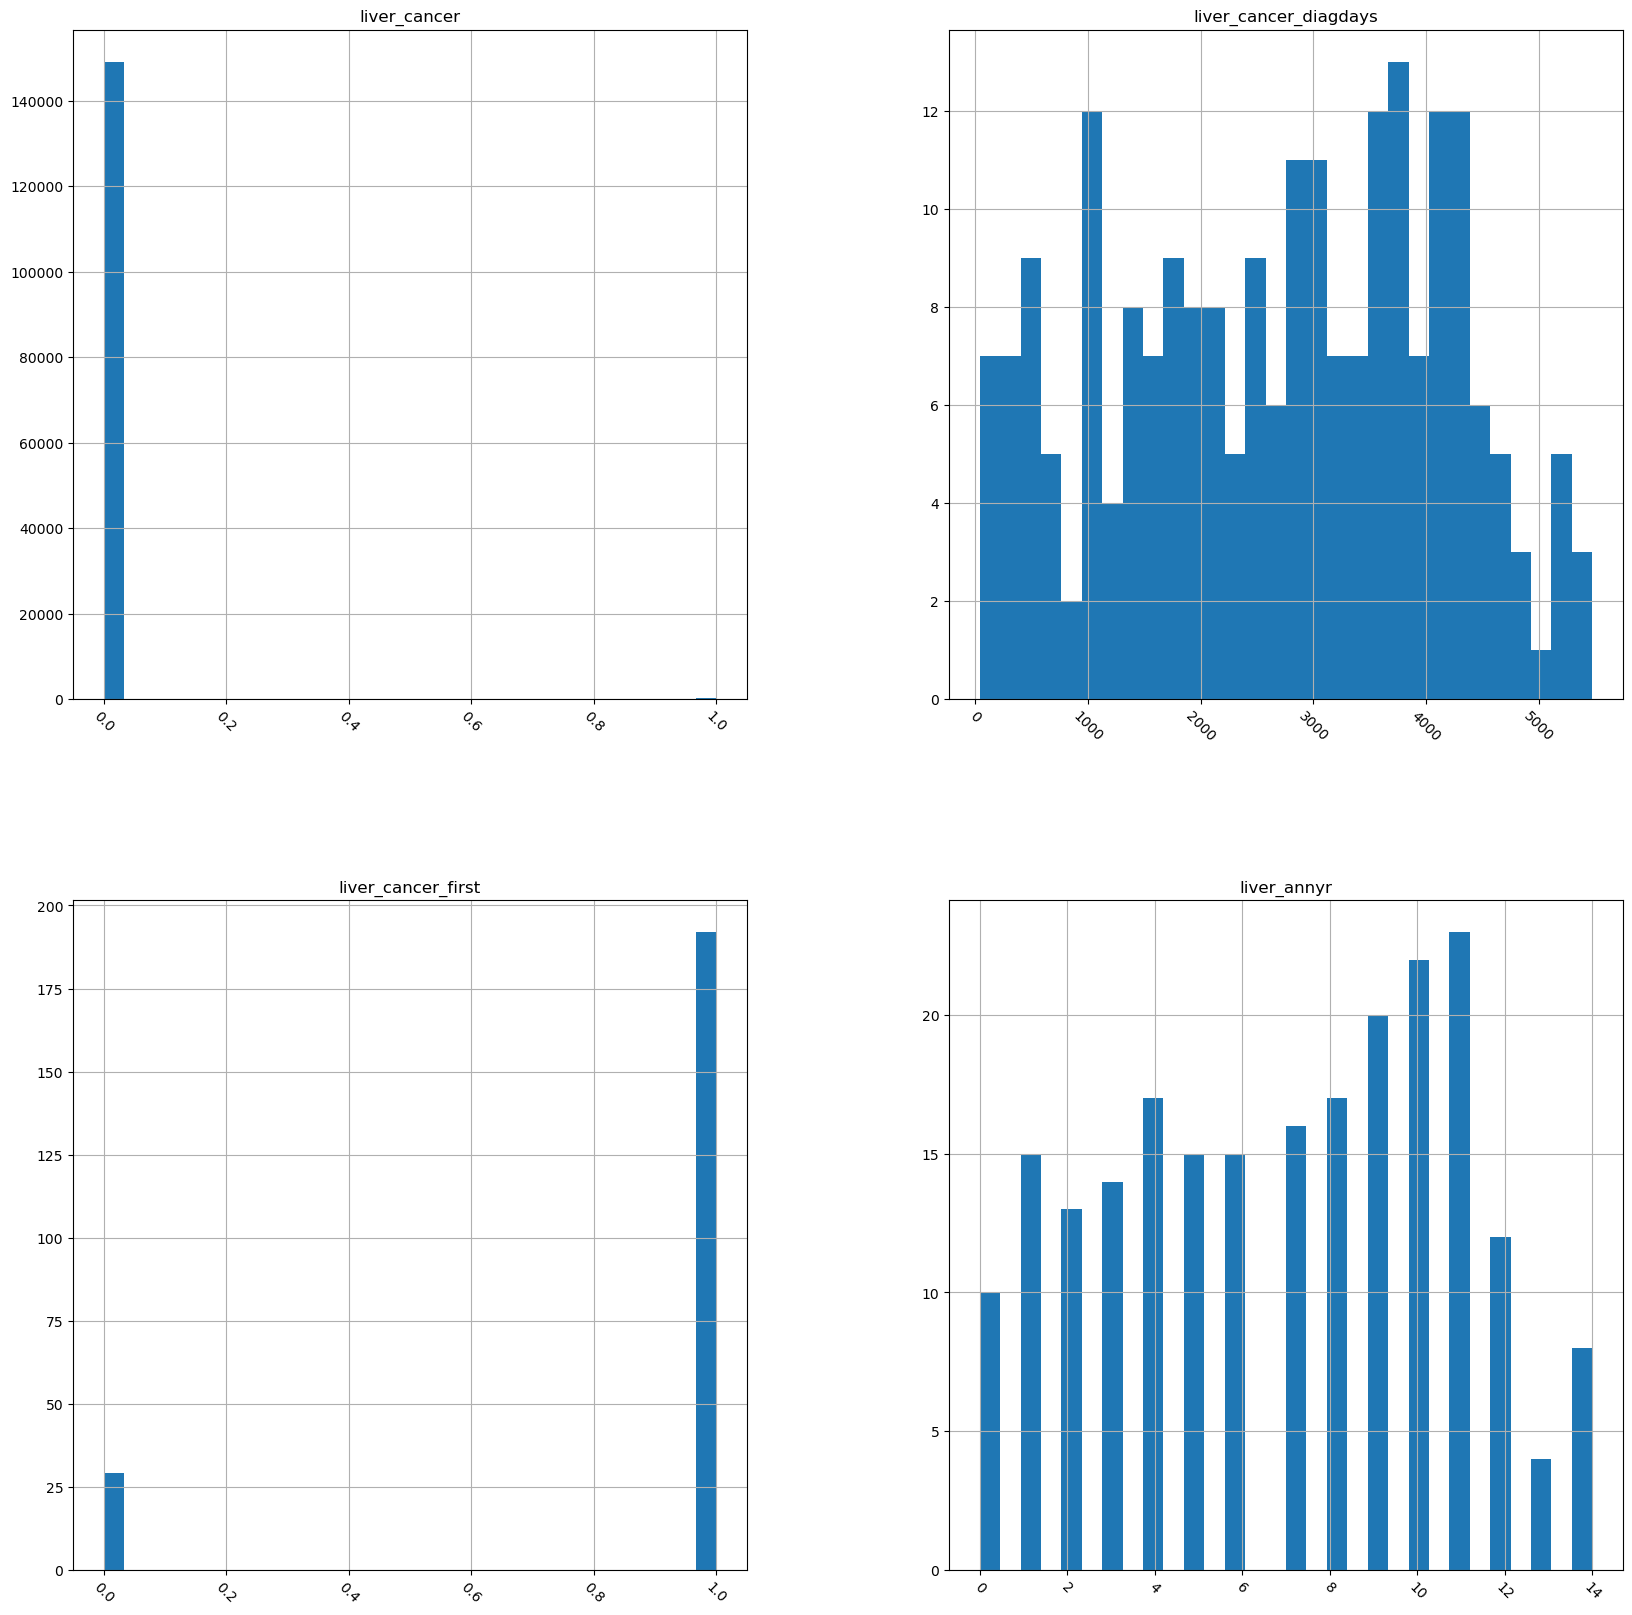

In [76]:
section11_df.hist(figsize=(20,20), bins = 30, xrot=-45)

<Axes: >

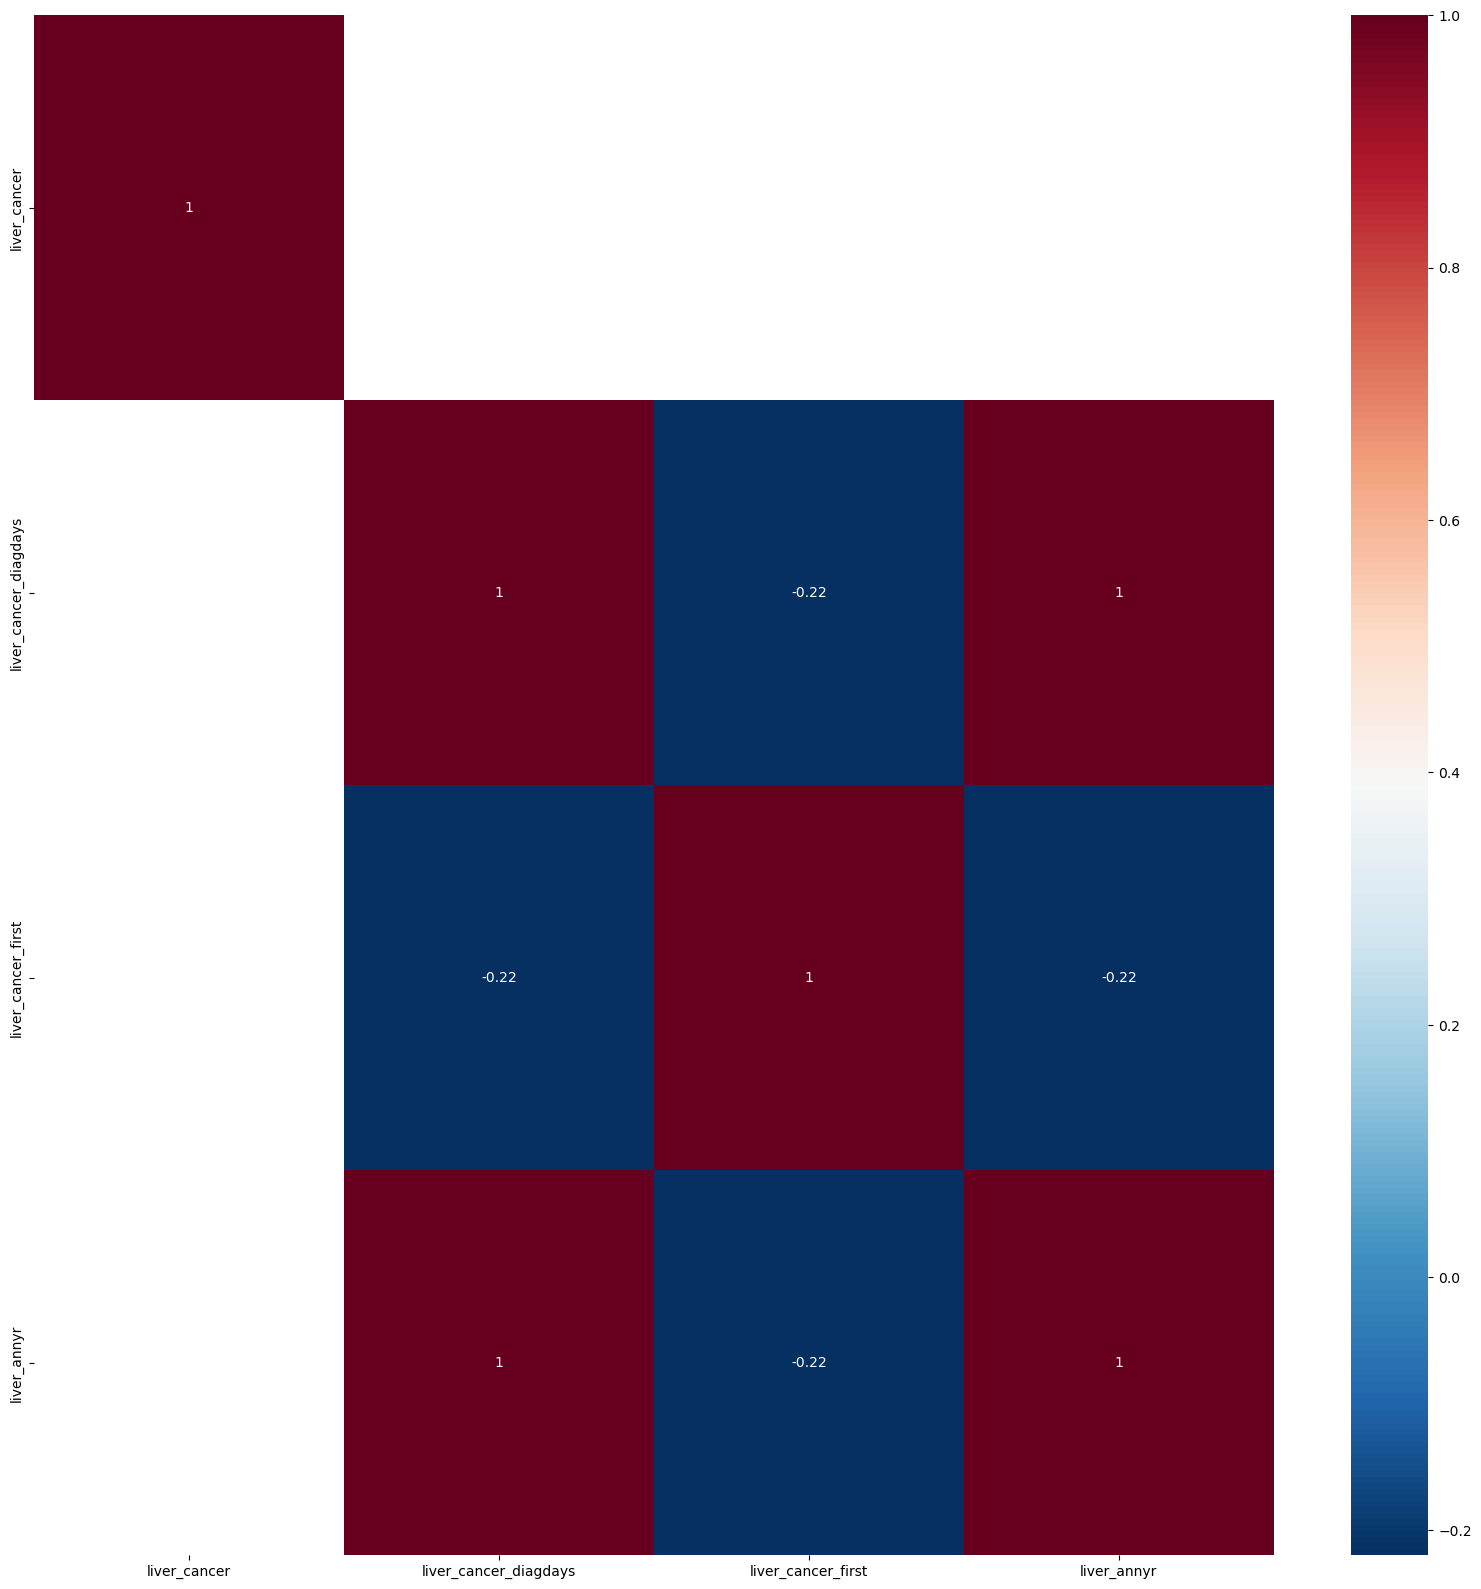

In [77]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section11].corr(), cmap='RdBu_r', annot = True)

---

In this section we have the variables about the cancer diagnosis. 

First, I have 'liver_cancer' which will be my target variable. I will study separately later in deep, but I will mention for now how unbalanced is this, so I will solve this problem because has a huge impact on our study.

Second, we can see how correlated are variables 'liver_cancer_diagdays' and 'liver_annyr', both representing information about how long the cancer was diagnosed. For my model, since I am going to study the appearance of liver cancer, I won't take into consideration how long the patient suffered cancer, so I will delete both from my characteristics.

---

## Section 12: Cancer Characteristics
---

In [82]:
section12_df = liver_cancer_df_with_bq[section12]
section12_df

liver_behavior  liver_grade  liver_morphology liver_topography  \
0                  NaN          NaN               NaN              NaN   
1                  NaN          NaN               NaN              NaN   
2                  NaN          NaN               NaN              NaN   
3                  NaN          NaN               NaN              NaN   
4                  NaN          NaN               NaN              NaN   
...                ...          ...               ...              ...   
154882             NaN          NaN               NaN              NaN   
154883             NaN          NaN               NaN              NaN   
154884             NaN          NaN               NaN              NaN   
154885             NaN          NaN               NaN              NaN   
154886             NaN          NaN               NaN              NaN   

        liver_seer  liver_seercat  
0              NaN            NaN  
1              NaN            NaN  
2              NaN            NaN  
3              NaN            NaN  
4              NaN            NaN  
...            ...            ...  
154882         NaN            NaN  
154883         NaN            NaN  
154884         NaN            NaN  
154885         NaN            NaN  
154886         NaN            NaN  

[149369 rows x 6 columns]

In [83]:
section12_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149369 entries, 0 to 154886
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   liver_behavior    221 non-null    float64
 1   liver_grade       221 non-null    float64
 2   liver_morphology  221 non-null    float64
 3   liver_topography  221 non-null    object 
 4   liver_seer        221 non-null    float64
 5   liver_seercat     221 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.0+ MB


In [84]:
daf.nulls_percentage(section12_df)

liver_behavior , 99.9% nulls , 1 unique values, float64
liver_grade , 99.9% nulls , 5 unique values, float64
liver_morphology , 99.9% nulls , 10 unique values, float64
liver_topography , 99.9% nulls , 2 unique values, object
liver_seer , 99.9% nulls , 2 unique values, float64
liver_seercat , 99.9% nulls , 1 unique values, float64


array([[<Axes: title={'center': 'liver_behavior'}>,
        <Axes: title={'center': 'liver_grade'}>],
       [<Axes: title={'center': 'liver_morphology'}>,
        <Axes: title={'center': 'liver_seer'}>],
       [<Axes: title={'center': 'liver_seercat'}>, <Axes: >]],
      dtype=object)

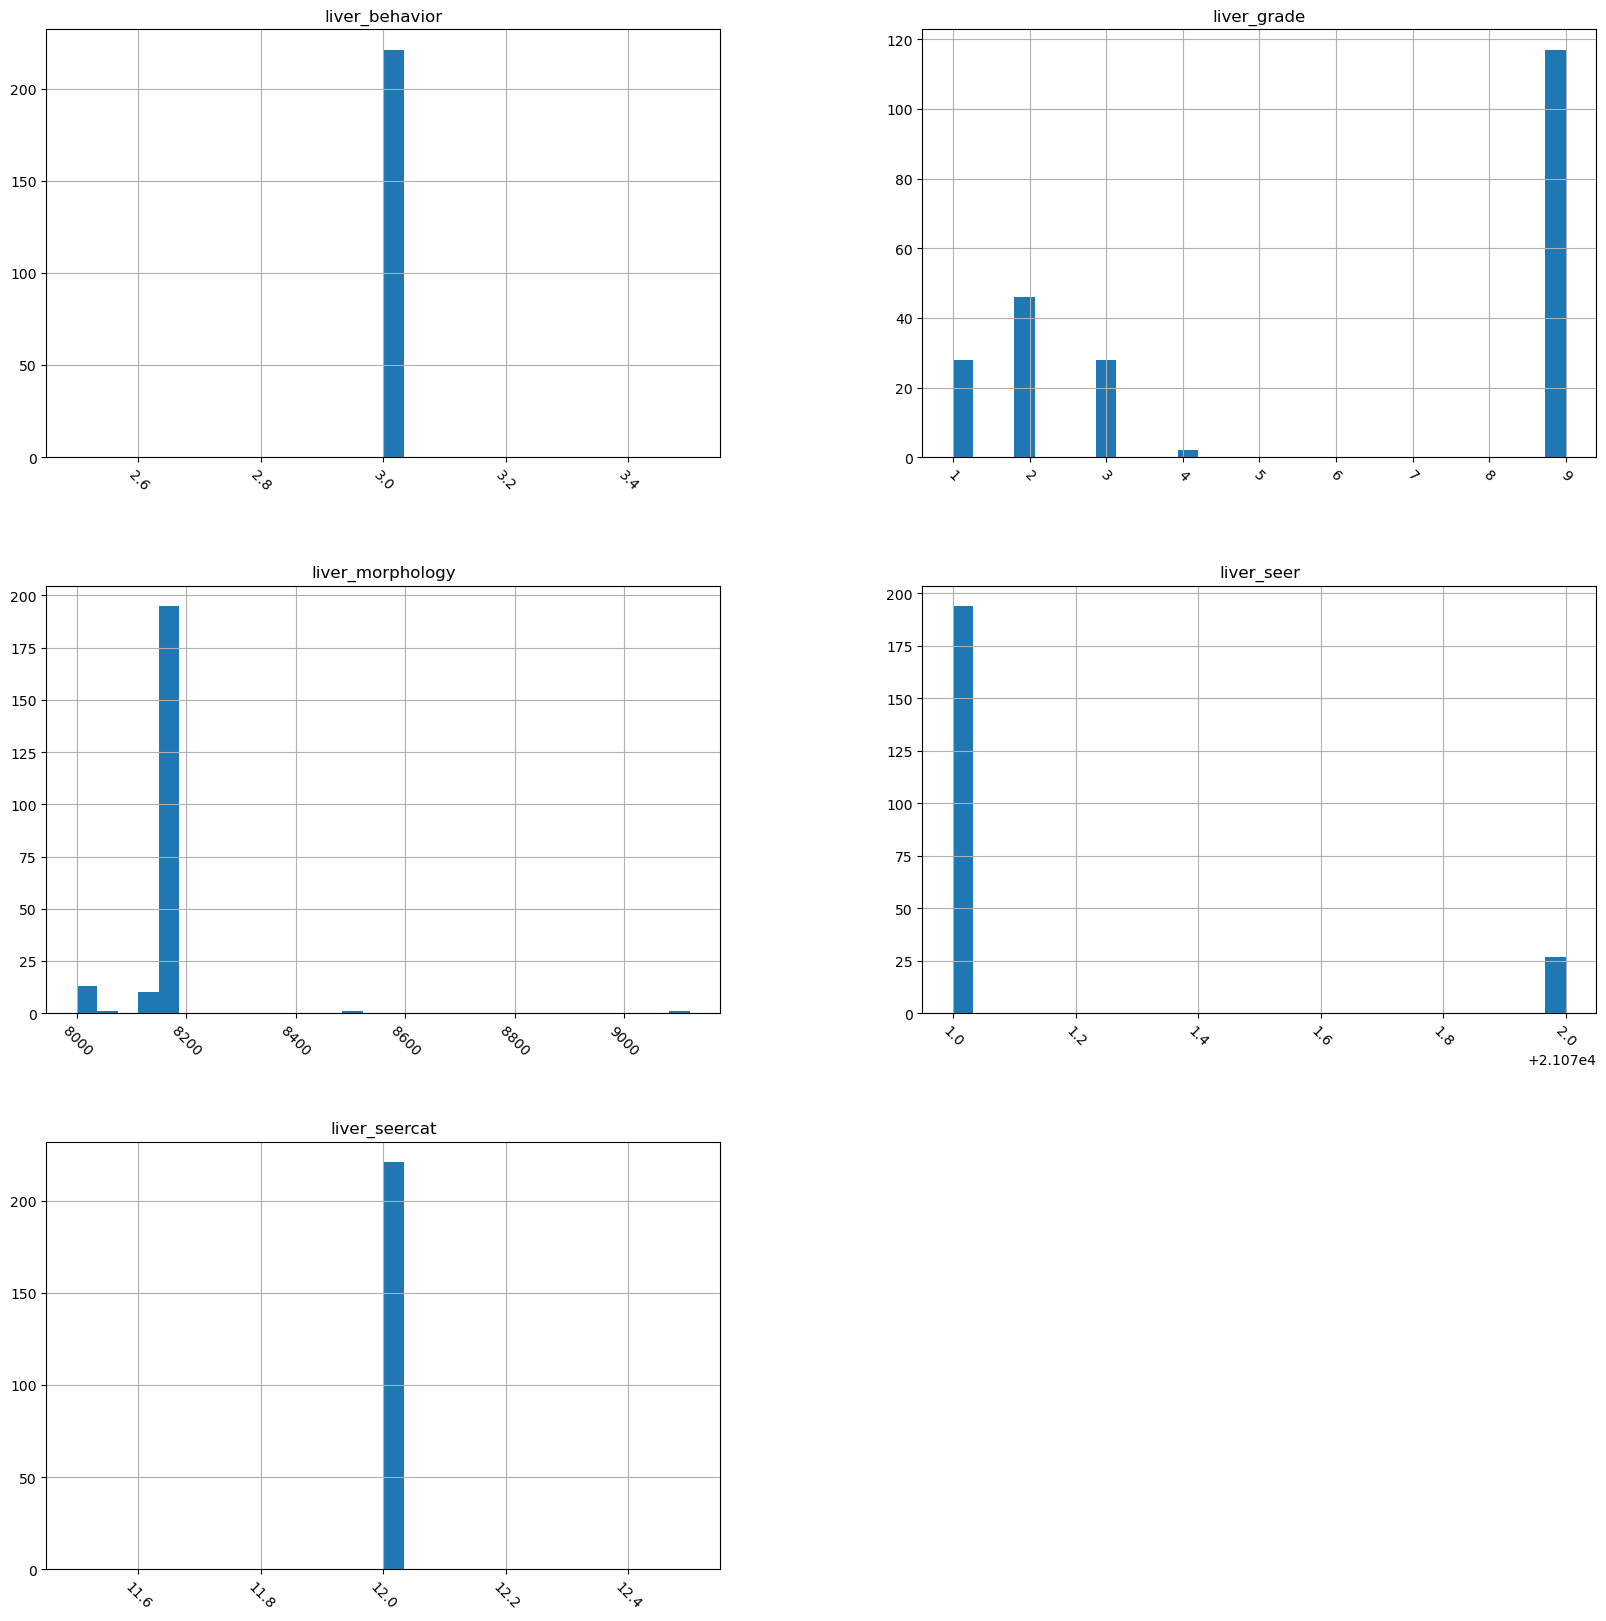

In [85]:
section12_df.hist(figsize=(20,20), bins = 30, xrot=-45)

---

Here we have the data about the cancer characteristics. For my initial study, I am not going to take into consideration these variables. The main reason, is because it is not the purpose of my study, which is, the existence of a liver cancer or not and death incidence. 

Also, after reviewing those parameters and their characteristics, we can observe how, some of them, have an unique value, or the number of null values is very high, due to a low number of positive cases in my dataset.  

---

## Section 13: Mortality status
---

I am not going to study death or not, only the development of the disease.

In [91]:
section13_df = liver_cancer_df_with_bq[section13]
section13_df

is_dead  is_dead_with_cod  dth_days
0             1                 1    7939.0
1             0                 0       NaN
2             0                 0       NaN
3             0                 0       NaN
4             0                 0       NaN
...         ...               ...       ...
154882        0                 0       NaN
154883        1                 1    7099.0
154884        1                 1    2152.0
154885        1                 1    4524.0
154886        1                 1    1579.0

[149369 rows x 3 columns]

In [92]:
section13_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149369 entries, 0 to 154886
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   is_dead           149369 non-null  int64  
 1   is_dead_with_cod  149369 non-null  int64  
 2   dth_days          55867 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 4.6 MB


In [93]:
daf.nulls_percentage(section13_df)

is_dead , 0.0% nulls , 2 unique values, int64
is_dead_with_cod , 0.0% nulls , 2 unique values, int64
dth_days , 62.6% nulls , 8776 unique values, float64


array([[<Axes: title={'center': 'is_dead'}>,
        <Axes: title={'center': 'is_dead_with_cod'}>],
       [<Axes: title={'center': 'dth_days'}>, <Axes: >]], dtype=object)

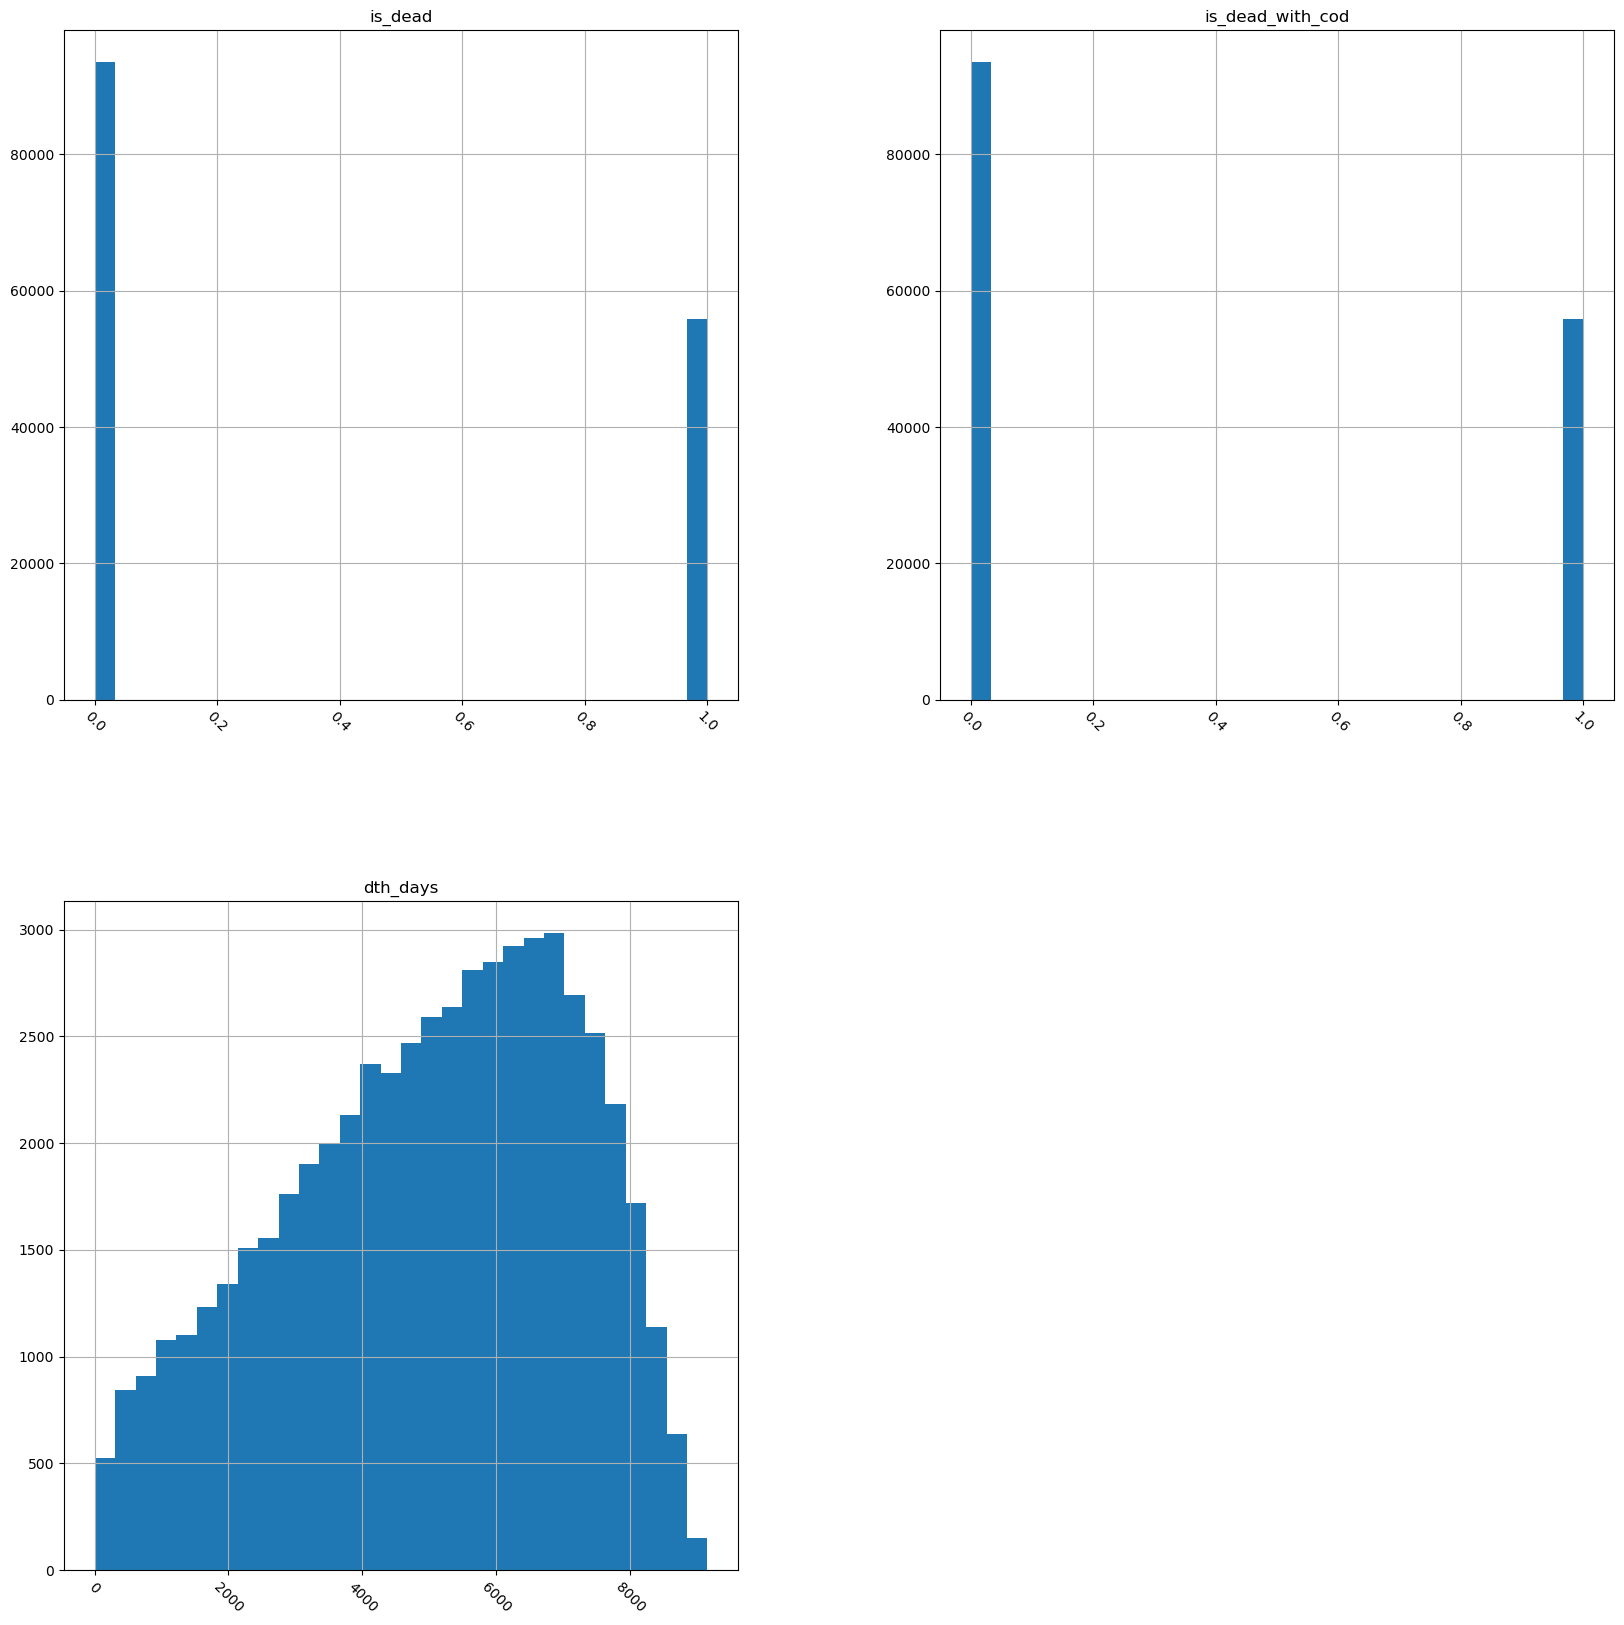

In [94]:
section13_df.hist(figsize=(20,20), bins = 30, xrot=-45)

<Axes: >

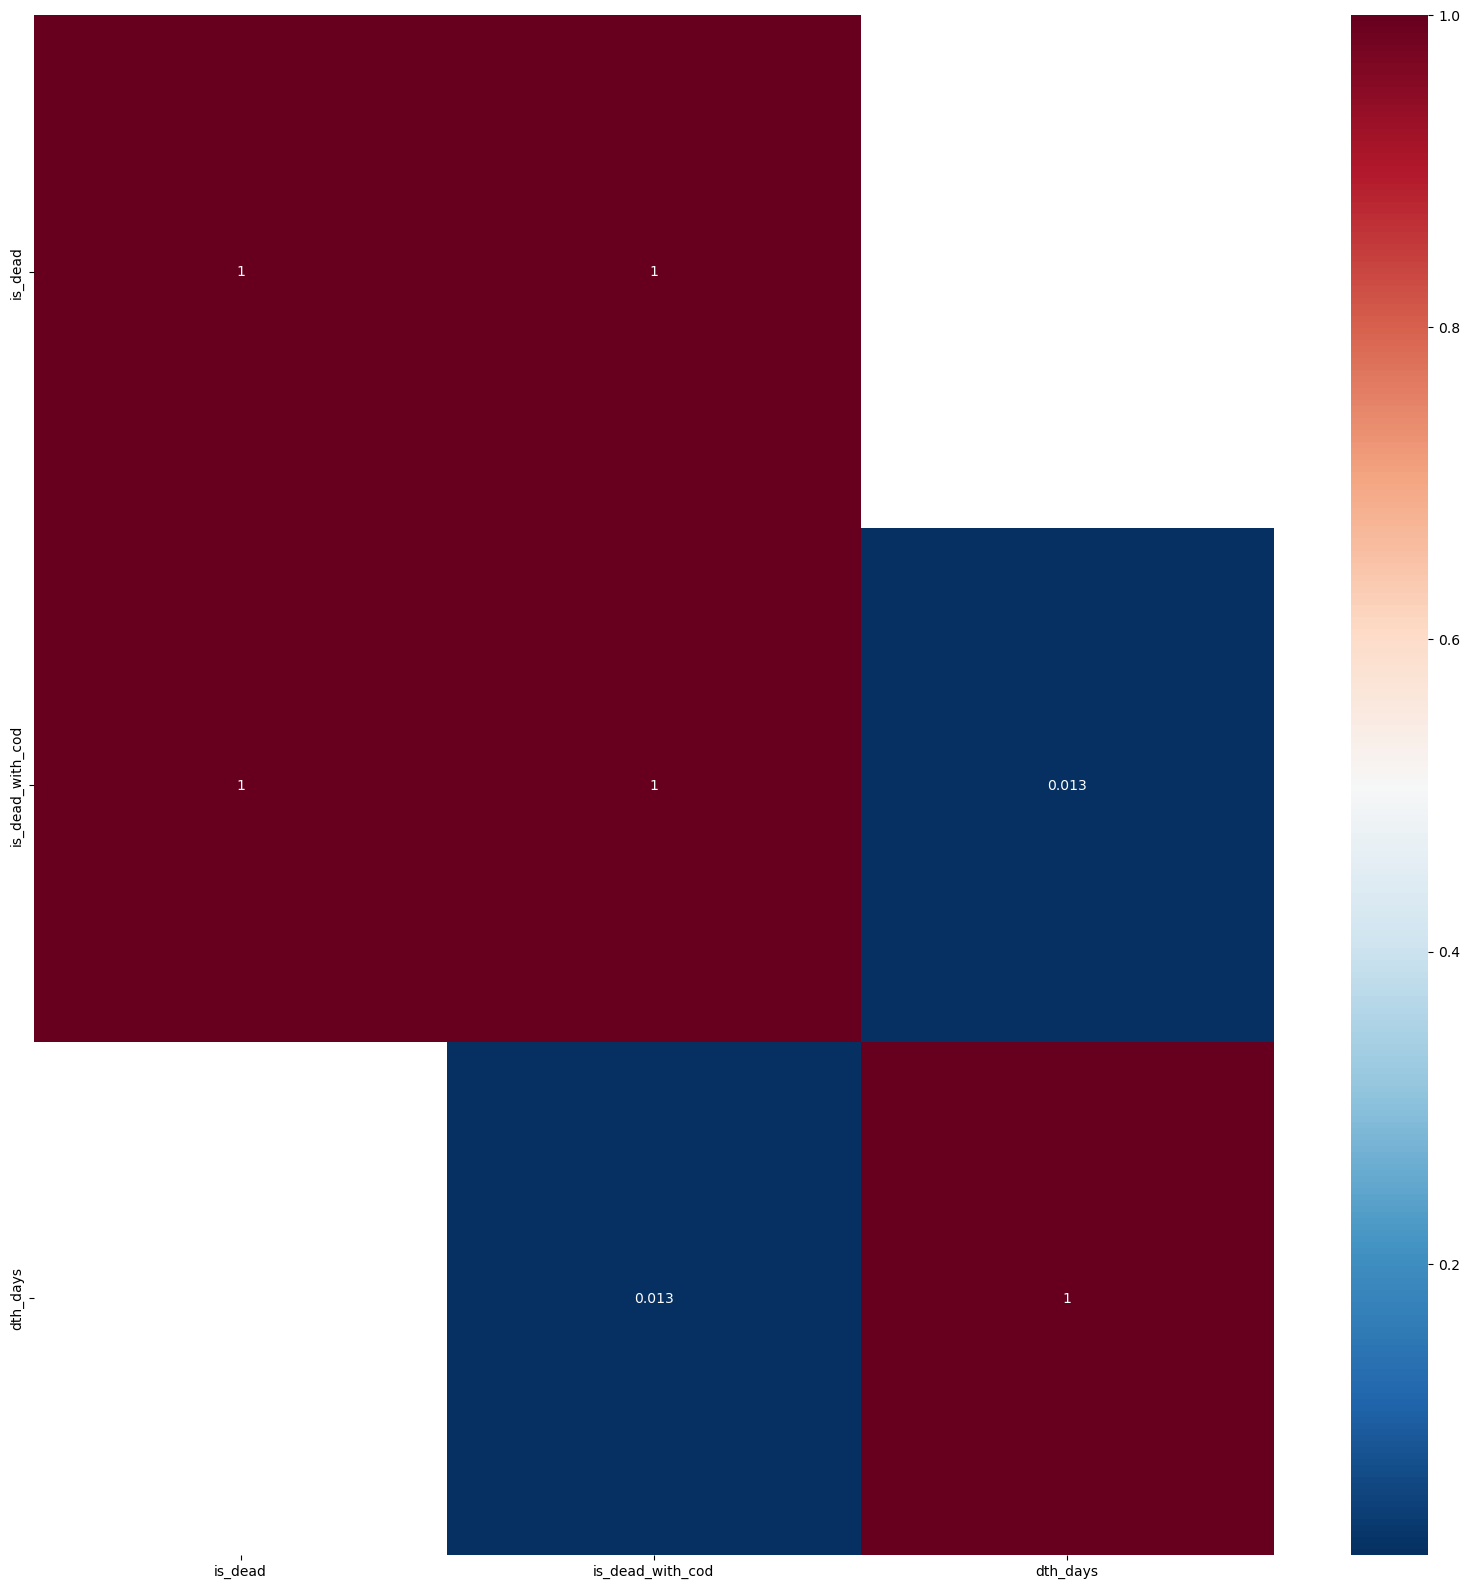

In [95]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section13].corr(), cmap='RdBu_r', annot = True)

---

In this section about the mortality status, we have two variables high correlated and one with many different values with not an important information. For those reason the only one that I am gonna use for my model, will be 'is_dead_with_cod'.

---

## Section 14: Death Certificate Cause of Death
---

In [100]:
section14_df = liver_cancer_df_with_bq[section14]
section14_df

d_seer_death  d_cancersite  d_dth_liver  d_codeath_cat
0            50051.0         999.0            0          900.0
1                NaN           NaN            0            NaN
2                NaN           NaN            0            NaN
3                NaN           NaN            0            NaN
4                NaN           NaN            0            NaN
...              ...           ...          ...            ...
154882           NaN           NaN            0            NaN
154883       60000.0         999.0            0         1000.0
154884       50060.0         999.0            0          200.0
154885          14.0          14.0            0          100.0
154886       50300.0         999.0            0          900.0

[149369 rows x 4 columns]

In [101]:
section14_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149369 entries, 0 to 154886
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   d_seer_death   55846 non-null   float64
 1   d_cancersite   55846 non-null   float64
 2   d_dth_liver    149369 non-null  int64  
 3   d_codeath_cat  55846 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 5.7 MB


In [102]:
daf.nulls_percentage(section14_df)

d_seer_death , 62.6% nulls , 77 unique values, float64
d_cancersite , 62.6% nulls , 20 unique values, float64
d_dth_liver , 0.0% nulls , 2 unique values, int64
d_codeath_cat , 62.6% nulls , 17 unique values, float64


array([[<Axes: title={'center': 'd_seer_death'}>,
        <Axes: title={'center': 'd_cancersite'}>],
       [<Axes: title={'center': 'd_dth_liver'}>,
        <Axes: title={'center': 'd_codeath_cat'}>]], dtype=object)

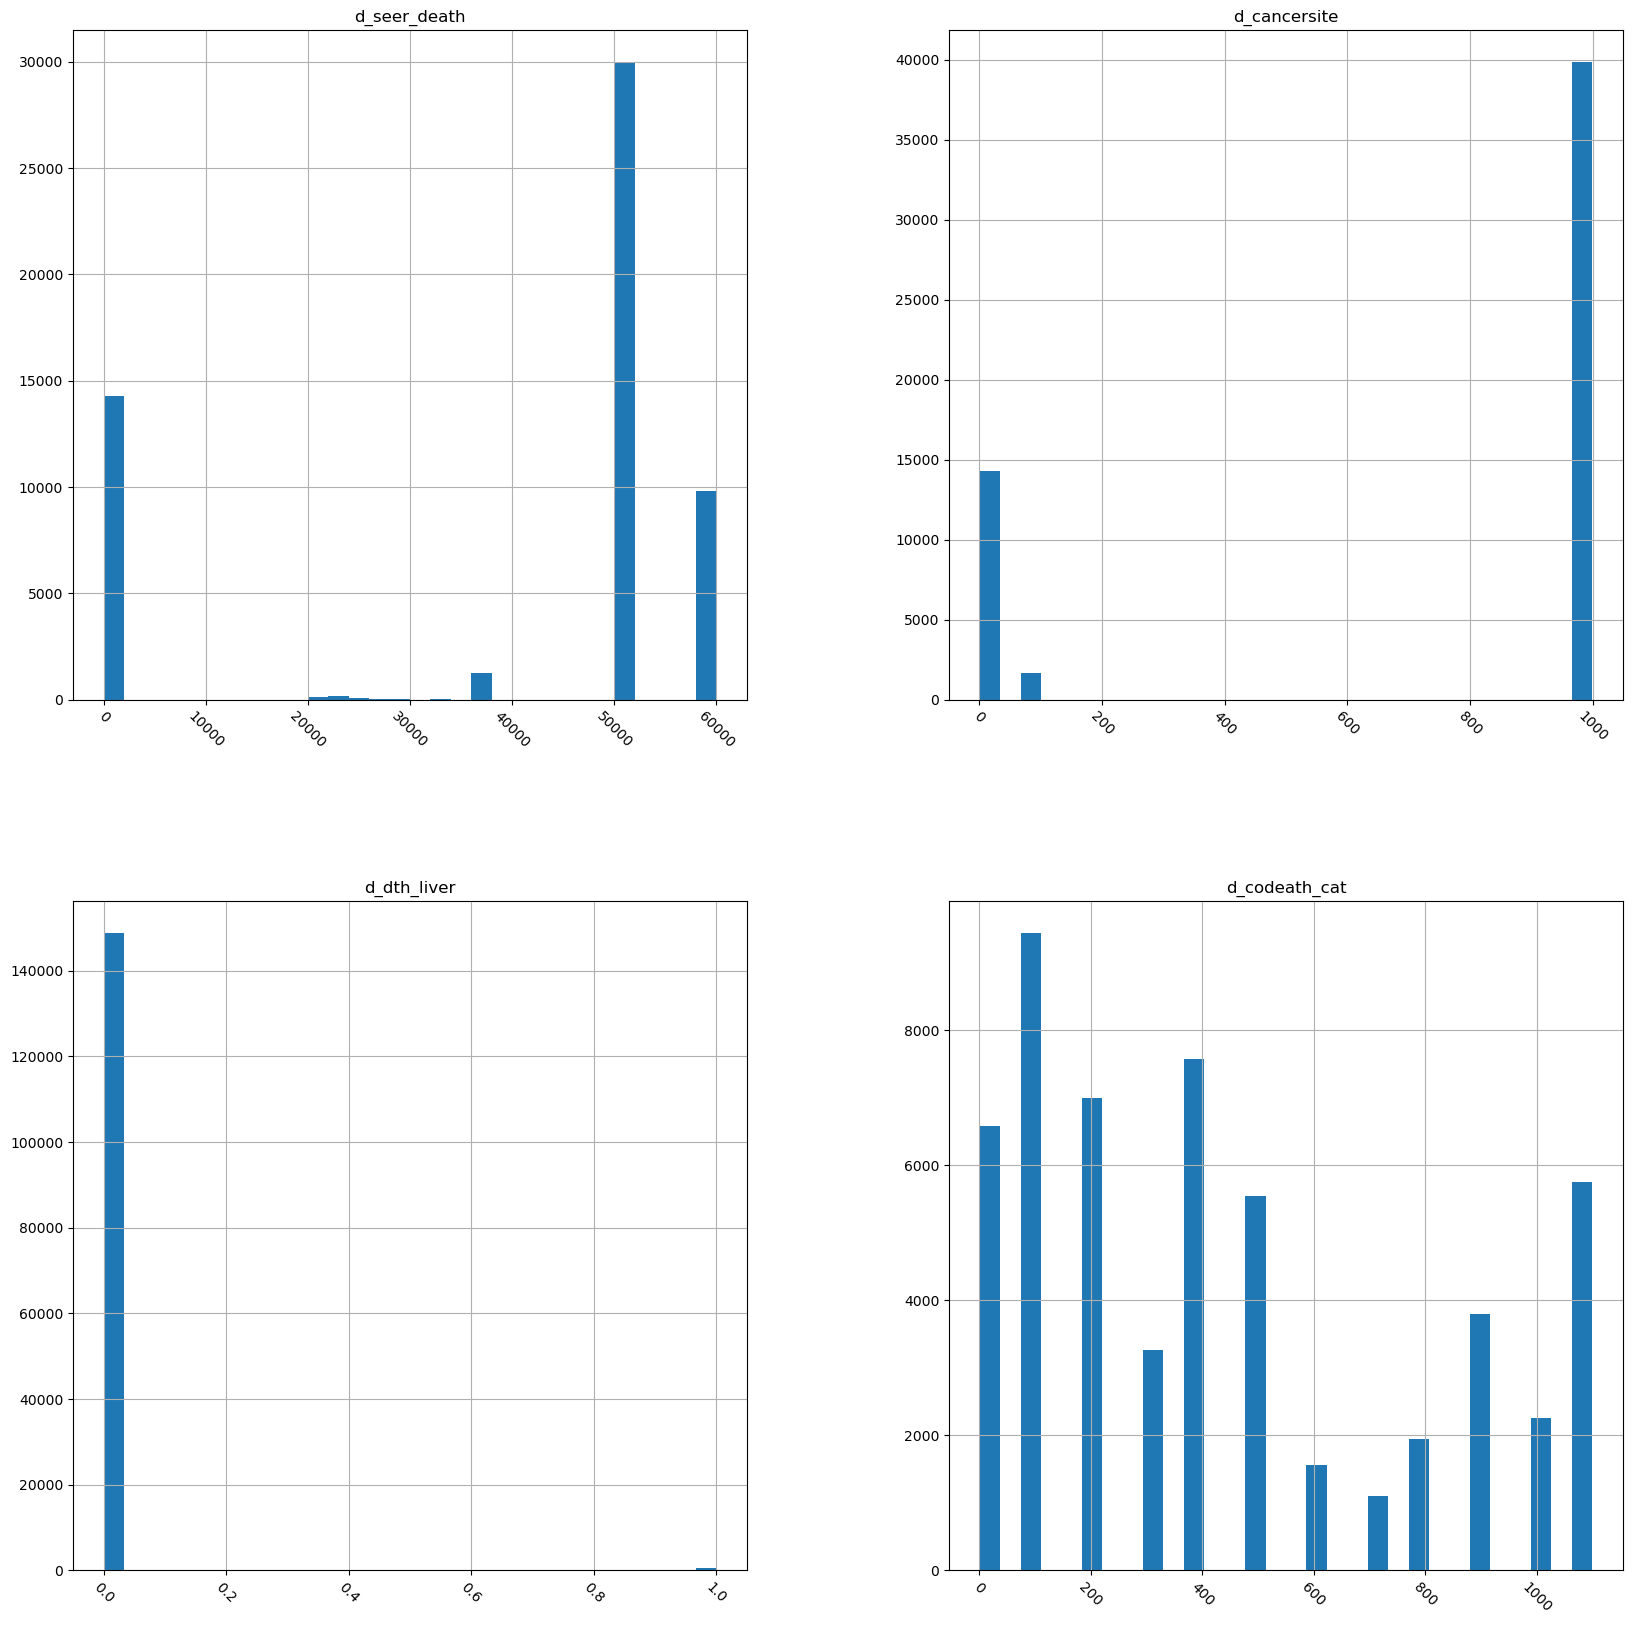

In [103]:
section14_df.hist(figsize=(20,20), bins = 30, xrot=-45)

<Axes: >

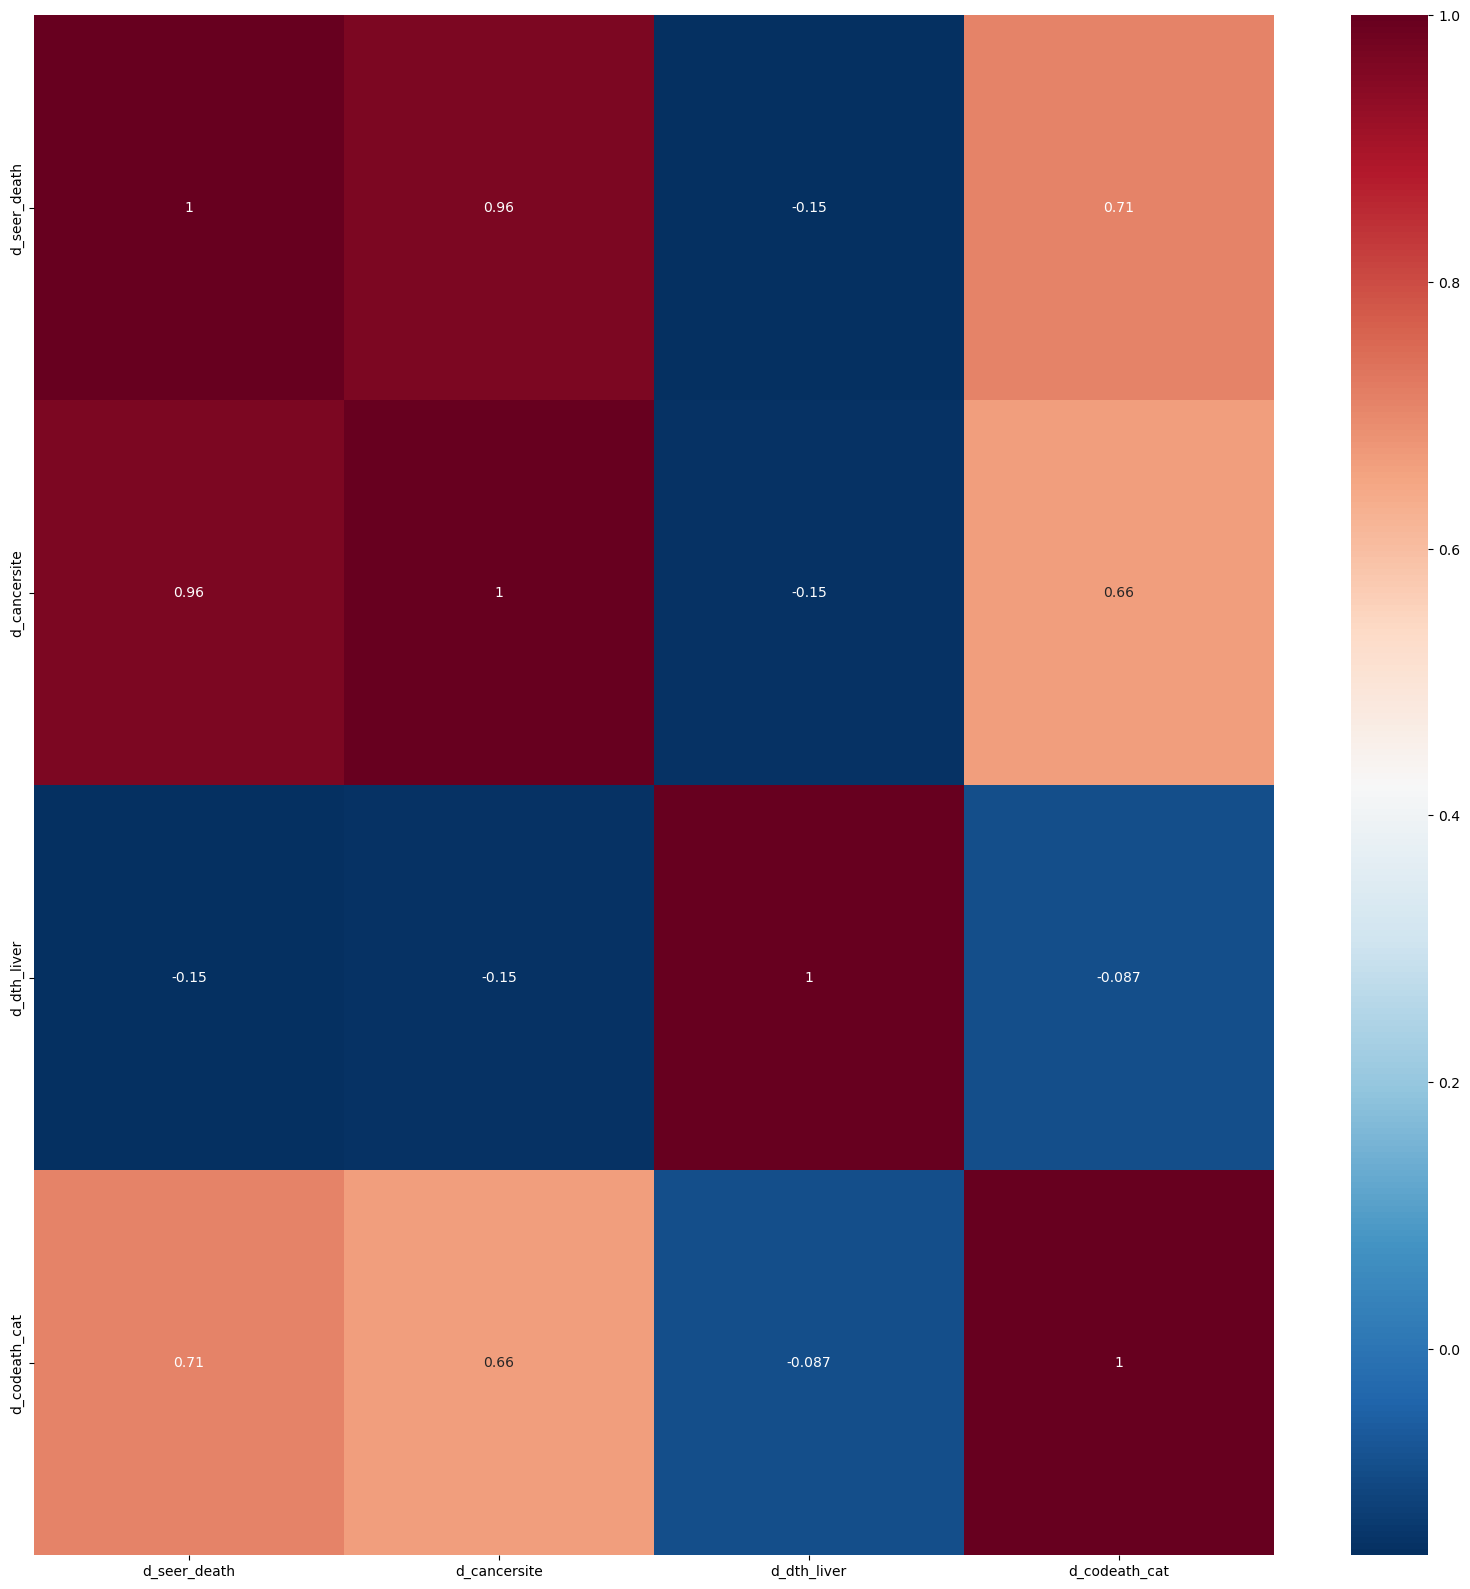

In [104]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section14].corr(), cmap='RdBu_r', annot = True)

## Section 15: Final Cause of Death
---

In [106]:
section15_df = liver_cancer_df_with_bq[section15]
section15_df

f_seer_death  f_cancersite  f_dth_liver  f_codeath_cat
0            50051.0         999.0            0          900.0
1                NaN           NaN            0            NaN
2                NaN           NaN            0            NaN
3                NaN           NaN            0            NaN
4                NaN           NaN            0            NaN
...              ...           ...          ...            ...
154882           NaN           NaN            0            NaN
154883       60000.0         999.0            0         1000.0
154884       50060.0         999.0            0          200.0
154885          14.0          14.0            0          100.0
154886       50300.0         999.0            0          900.0

[149369 rows x 4 columns]

In [107]:
section15_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149369 entries, 0 to 154886
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   f_seer_death   55845 non-null   float64
 1   f_cancersite   55845 non-null   float64
 2   f_dth_liver    149369 non-null  int64  
 3   f_codeath_cat  55845 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 5.7 MB


In [108]:
daf.nulls_percentage(section15_df)

f_seer_death , 62.6% nulls , 77 unique values, float64
f_cancersite , 62.6% nulls , 20 unique values, float64
f_dth_liver , 0.0% nulls , 2 unique values, int64
f_codeath_cat , 62.6% nulls , 17 unique values, float64


array([[<Axes: title={'center': 'f_seer_death'}>,
        <Axes: title={'center': 'f_cancersite'}>],
       [<Axes: title={'center': 'f_dth_liver'}>,
        <Axes: title={'center': 'f_codeath_cat'}>]], dtype=object)

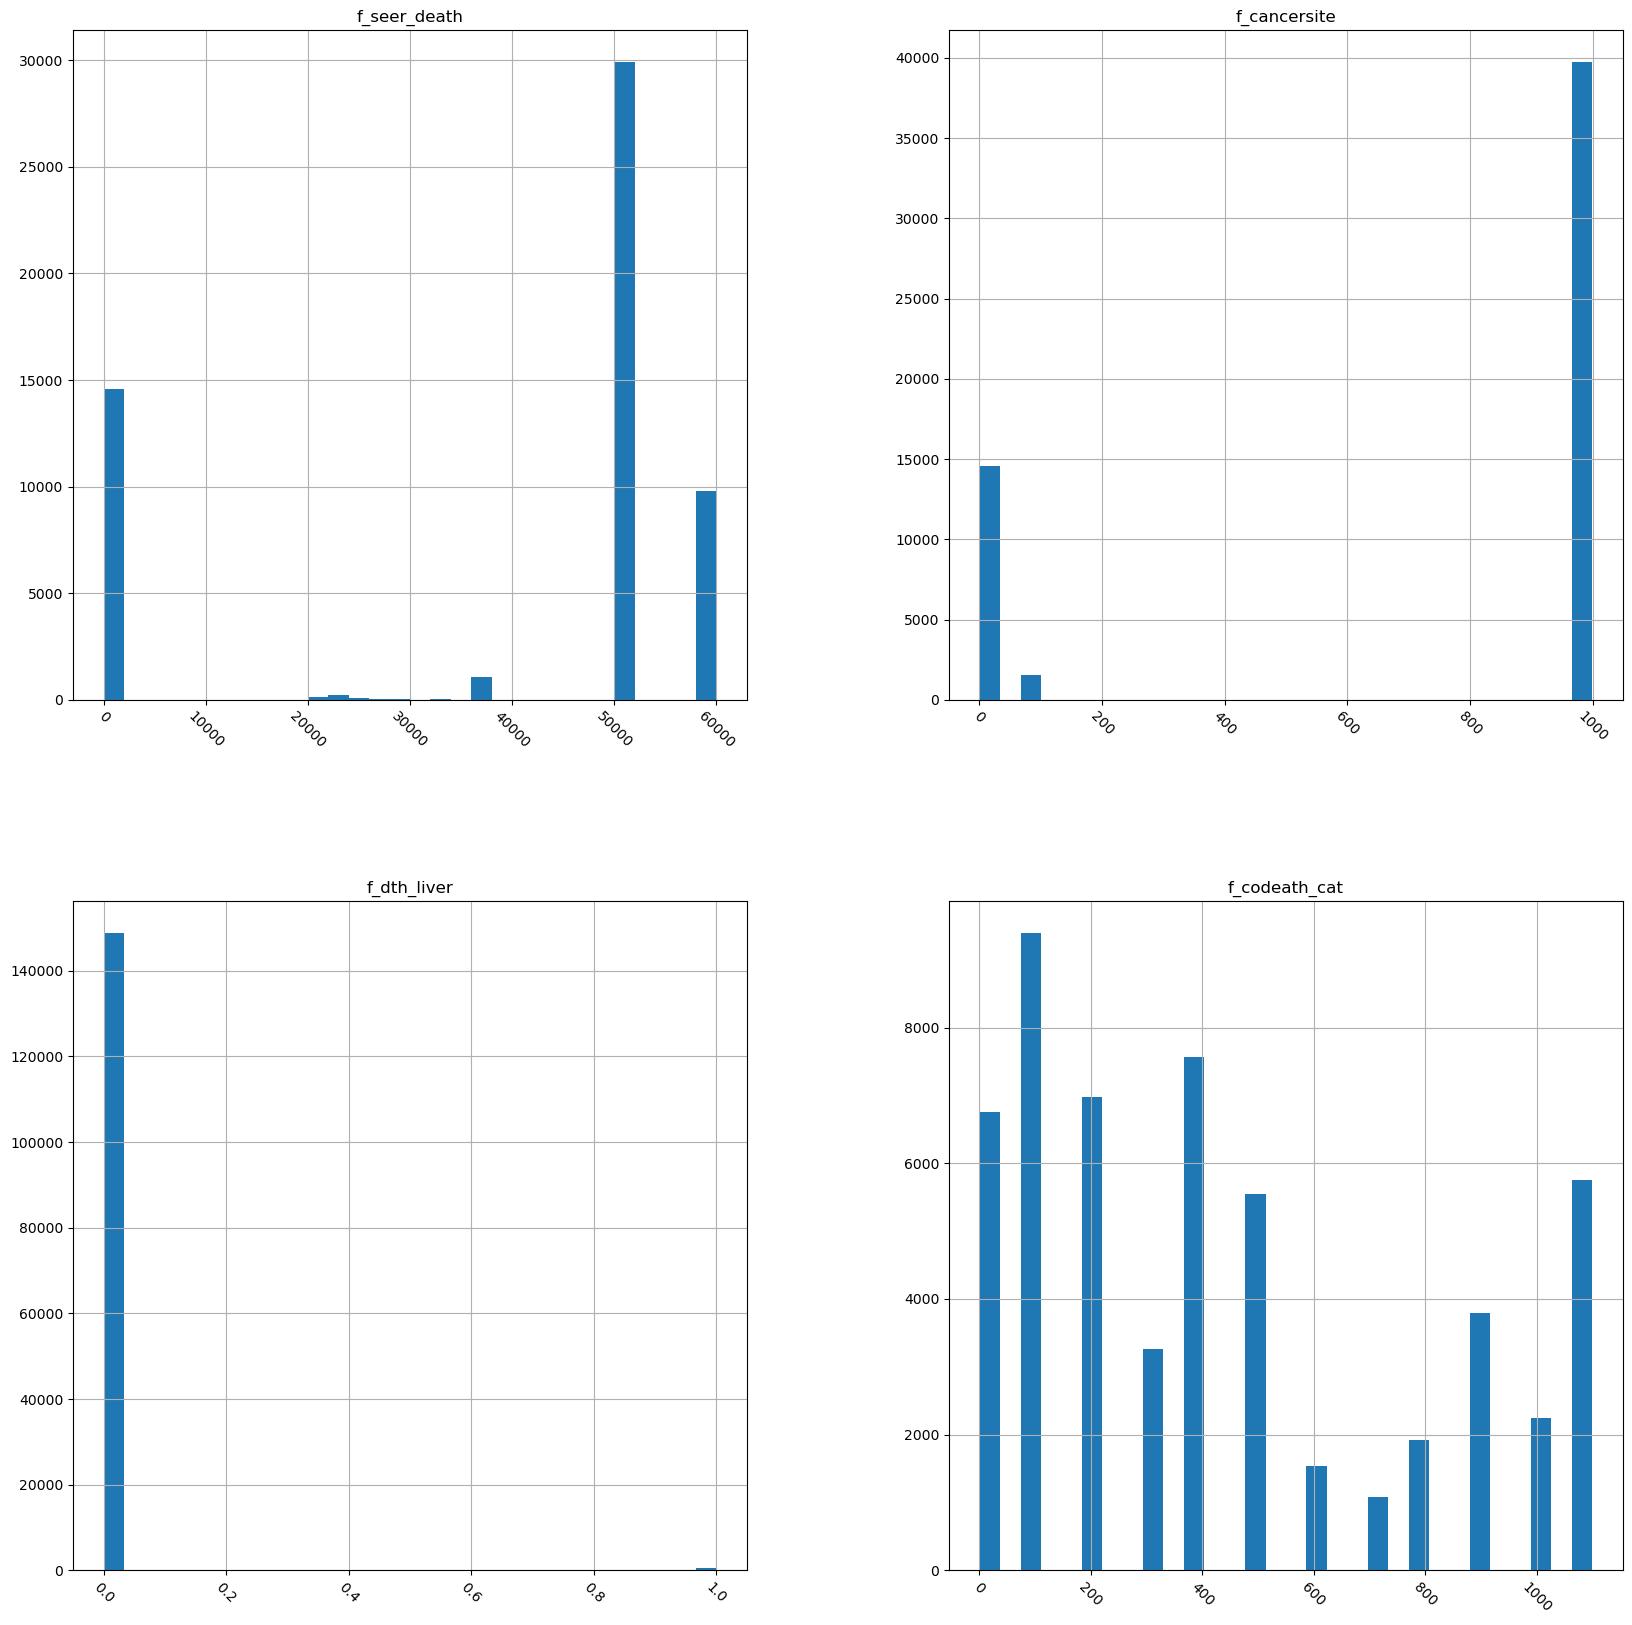

In [109]:
section15_df.hist(figsize=(20,20), bins = 30, xrot=-45)

<Axes: >

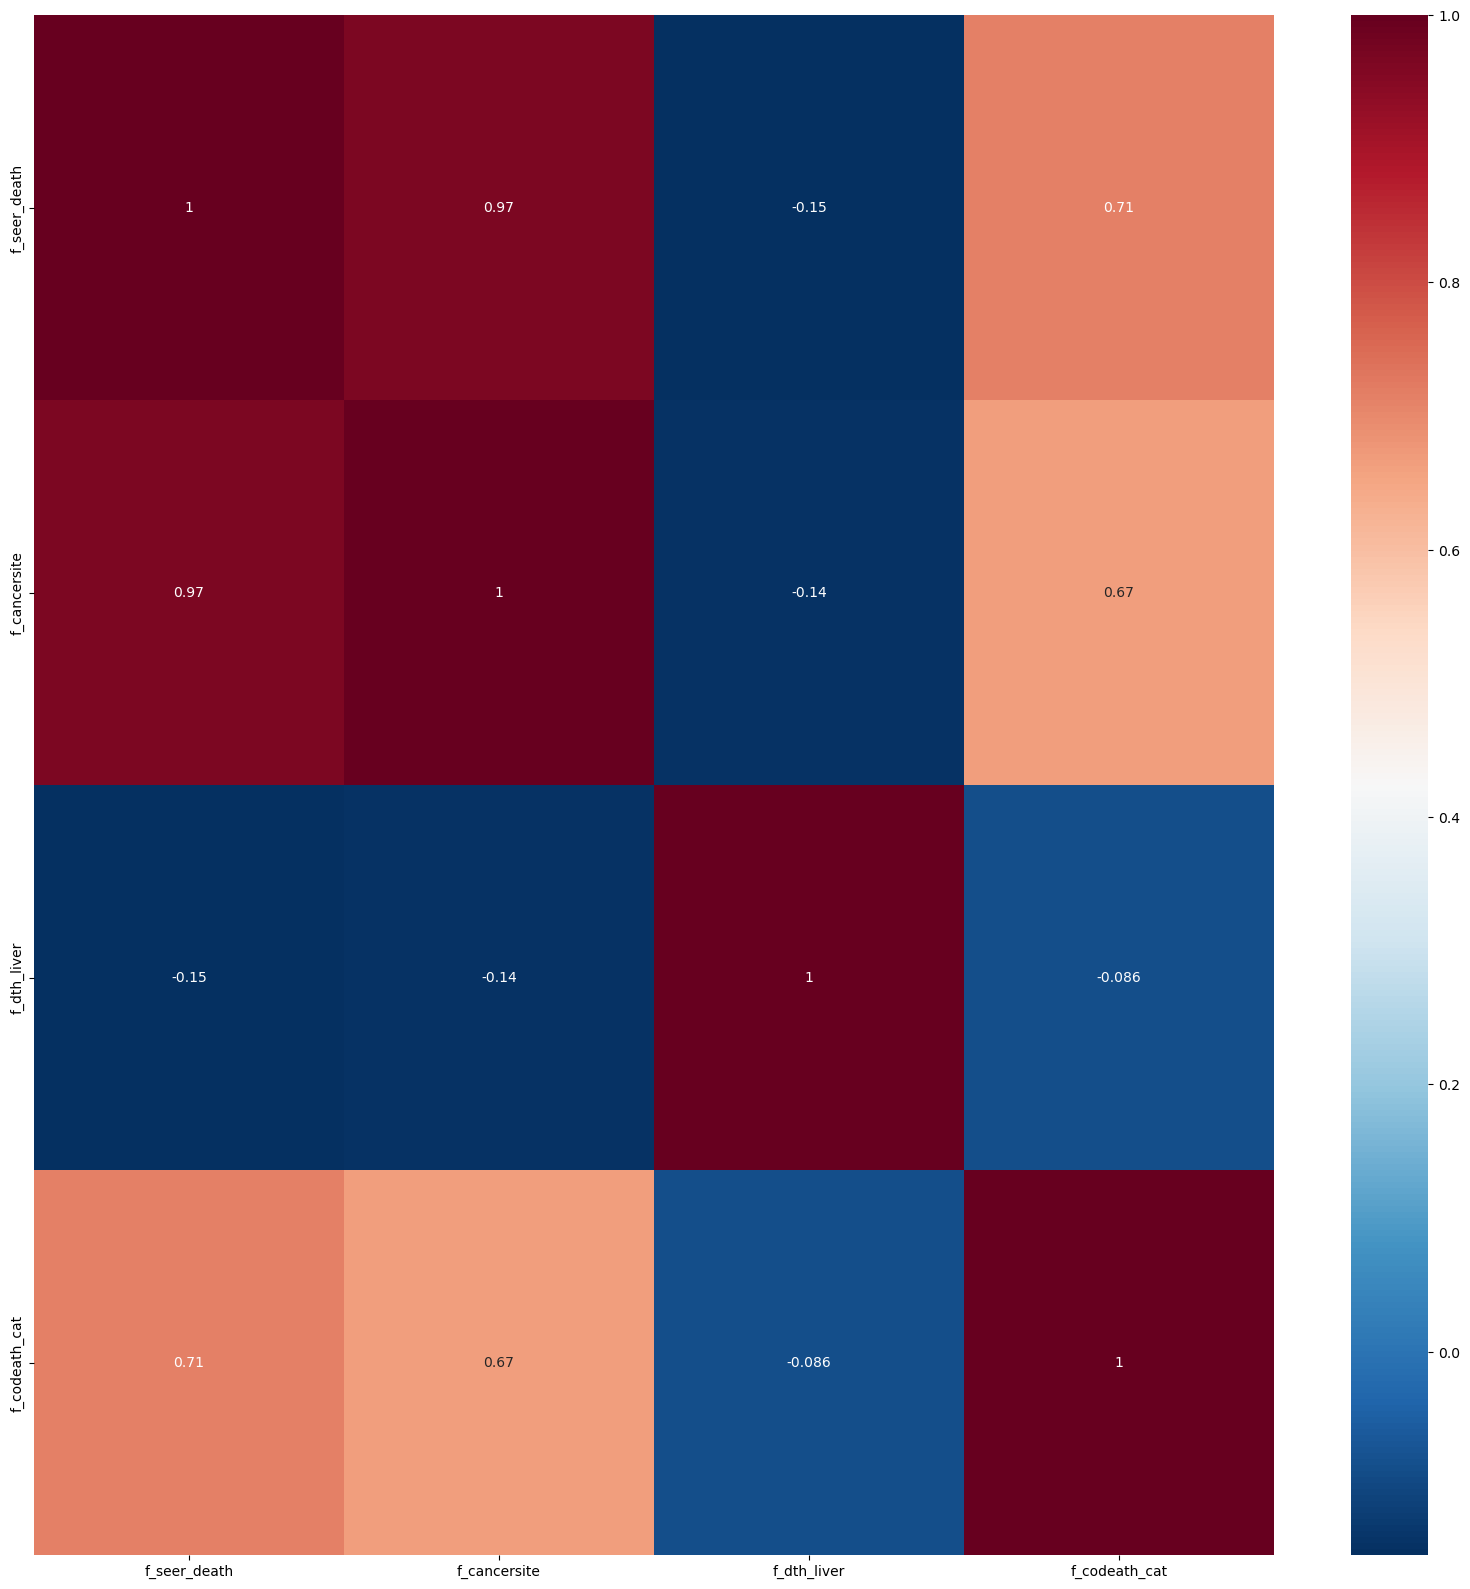

In [110]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section15].corr(), cmap='RdBu_r', annot = True)

## Section 16: BQ Compliance
---

No voy a considerar ninguna accion con el formulario.

## Section 17: BQ Demographics
---

In [114]:
section17_df = liver_cancer_df_with_bq[section17]
section17_df

race7  hispanic_f  educat  marital  occupat
0           2         0.0     2.0      3.0      4.0
1           1         0.0     7.0      1.0      2.0
2           1         0.0     5.0      1.0      4.0
3           1         0.0     5.0      1.0      1.0
4           1         0.0     6.0      3.0      2.0
...       ...         ...     ...      ...      ...
154882      4         0.0     6.0      5.0      7.0
154883      1         0.0     6.0      1.0      4.0
154884      1         0.0     5.0      1.0      4.0
154885      1         0.0     3.0      1.0      4.0
154886      1         0.0     3.0      1.0      6.0

[149369 rows x 5 columns]

In [115]:
section17_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149369 entries, 0 to 154886
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   race7       149369 non-null  int64  
 1   hispanic_f  145494 non-null  float64
 2   educat      148972 non-null  float64
 3   marital     148999 non-null  float64
 4   occupat     148620 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 6.8 MB


In [116]:
daf.nulls_percentage(section17_df)

race7 , 0.0% nulls , 7 unique values, int64
hispanic_f , 2.6% nulls , 2 unique values, float64
educat , 0.3% nulls , 7 unique values, float64
marital , 0.2% nulls , 5 unique values, float64
occupat , 0.5% nulls , 7 unique values, float64


array([[<Axes: title={'center': 'race7'}>,
        <Axes: title={'center': 'hispanic_f'}>],
       [<Axes: title={'center': 'educat'}>,
        <Axes: title={'center': 'marital'}>],
       [<Axes: title={'center': 'occupat'}>, <Axes: >]], dtype=object)

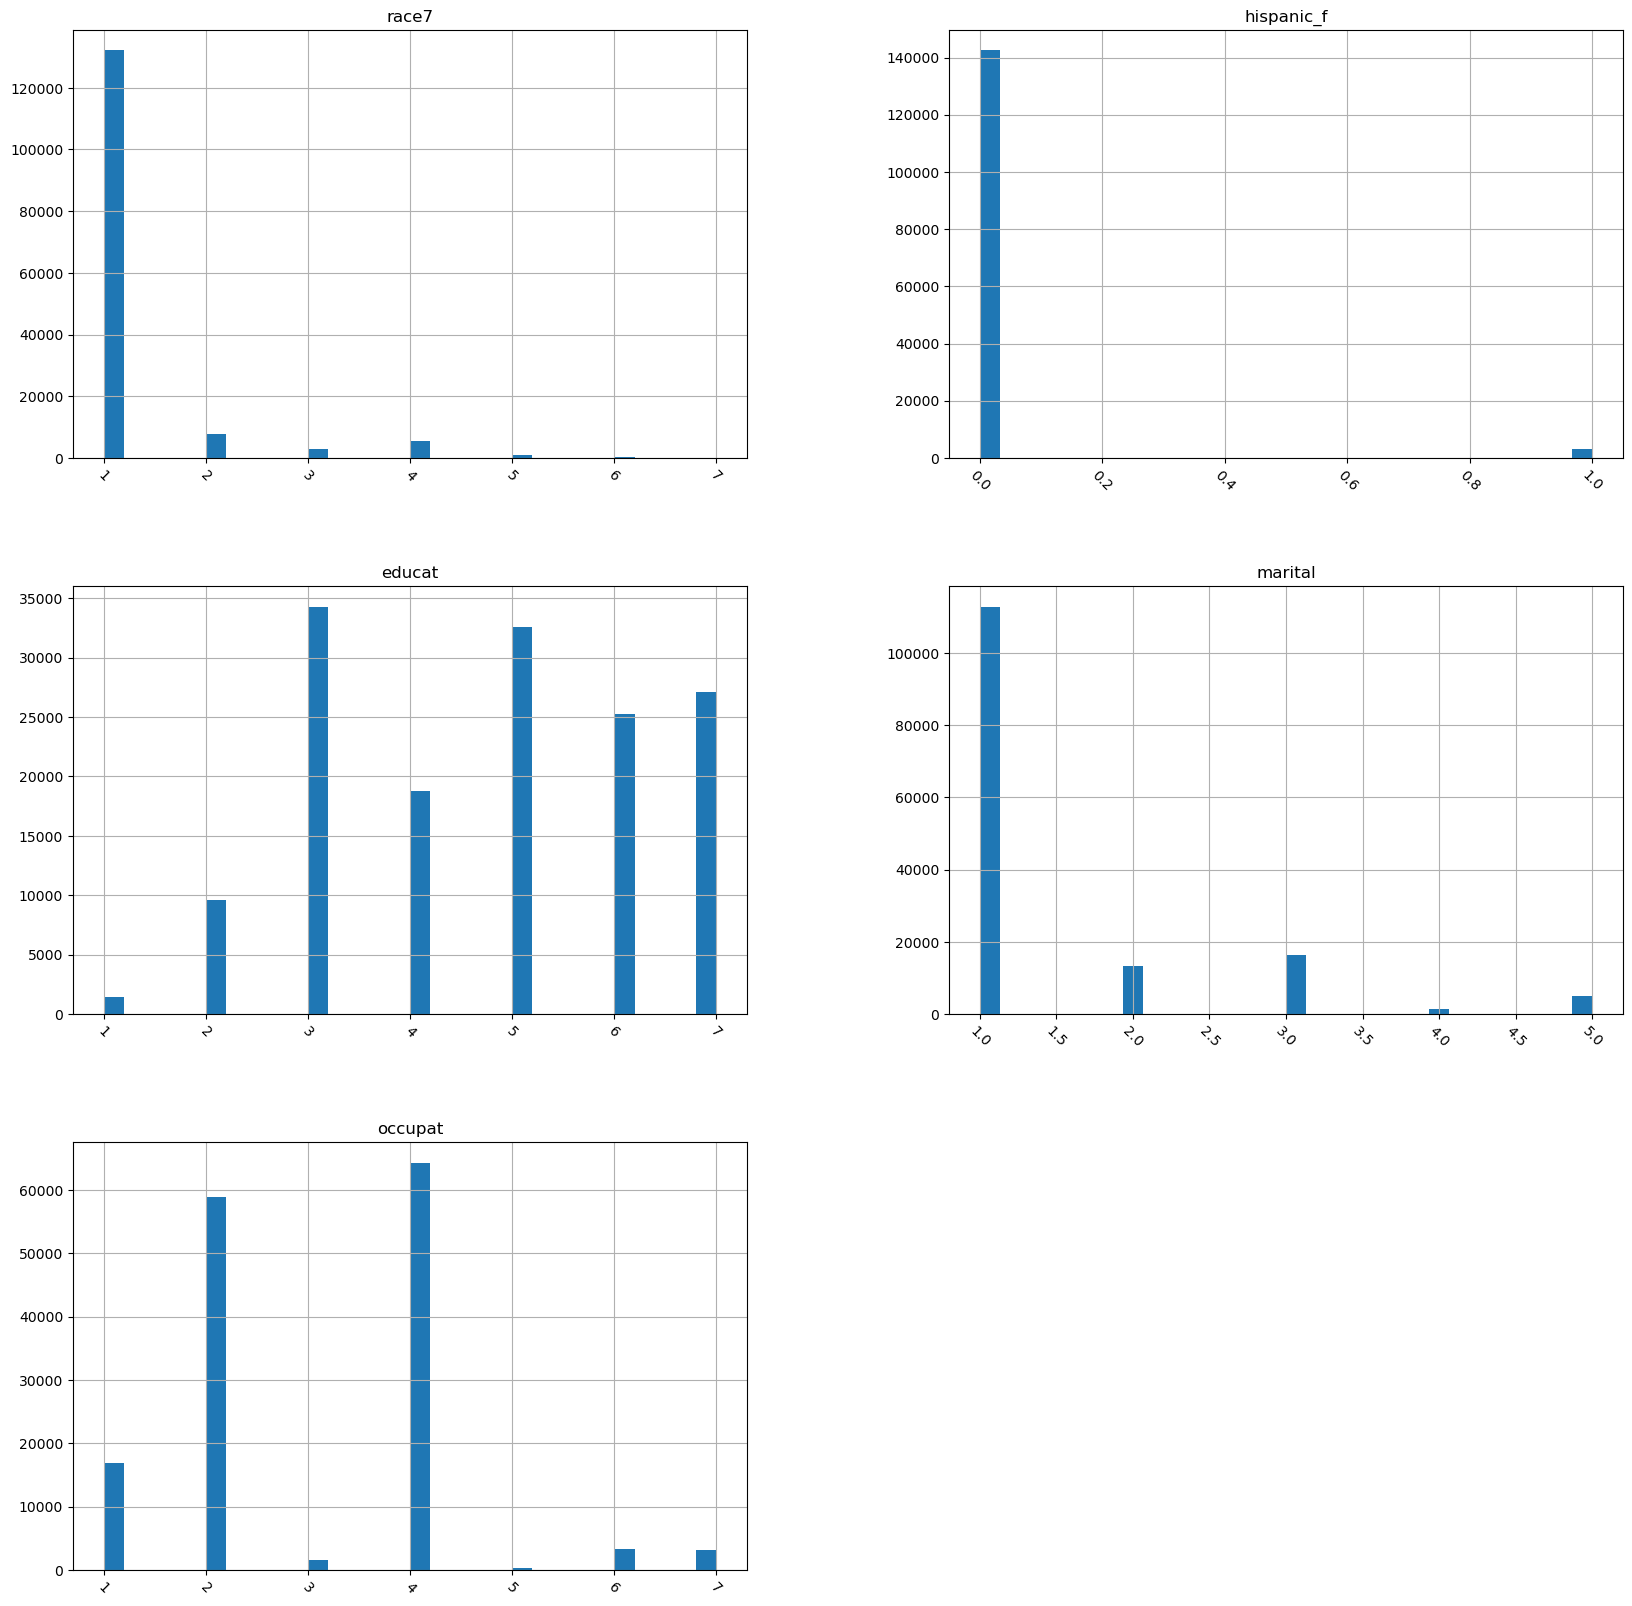

In [117]:
section17_df.hist(figsize=(20,20), bins = 30, xrot=-45)

<Axes: >

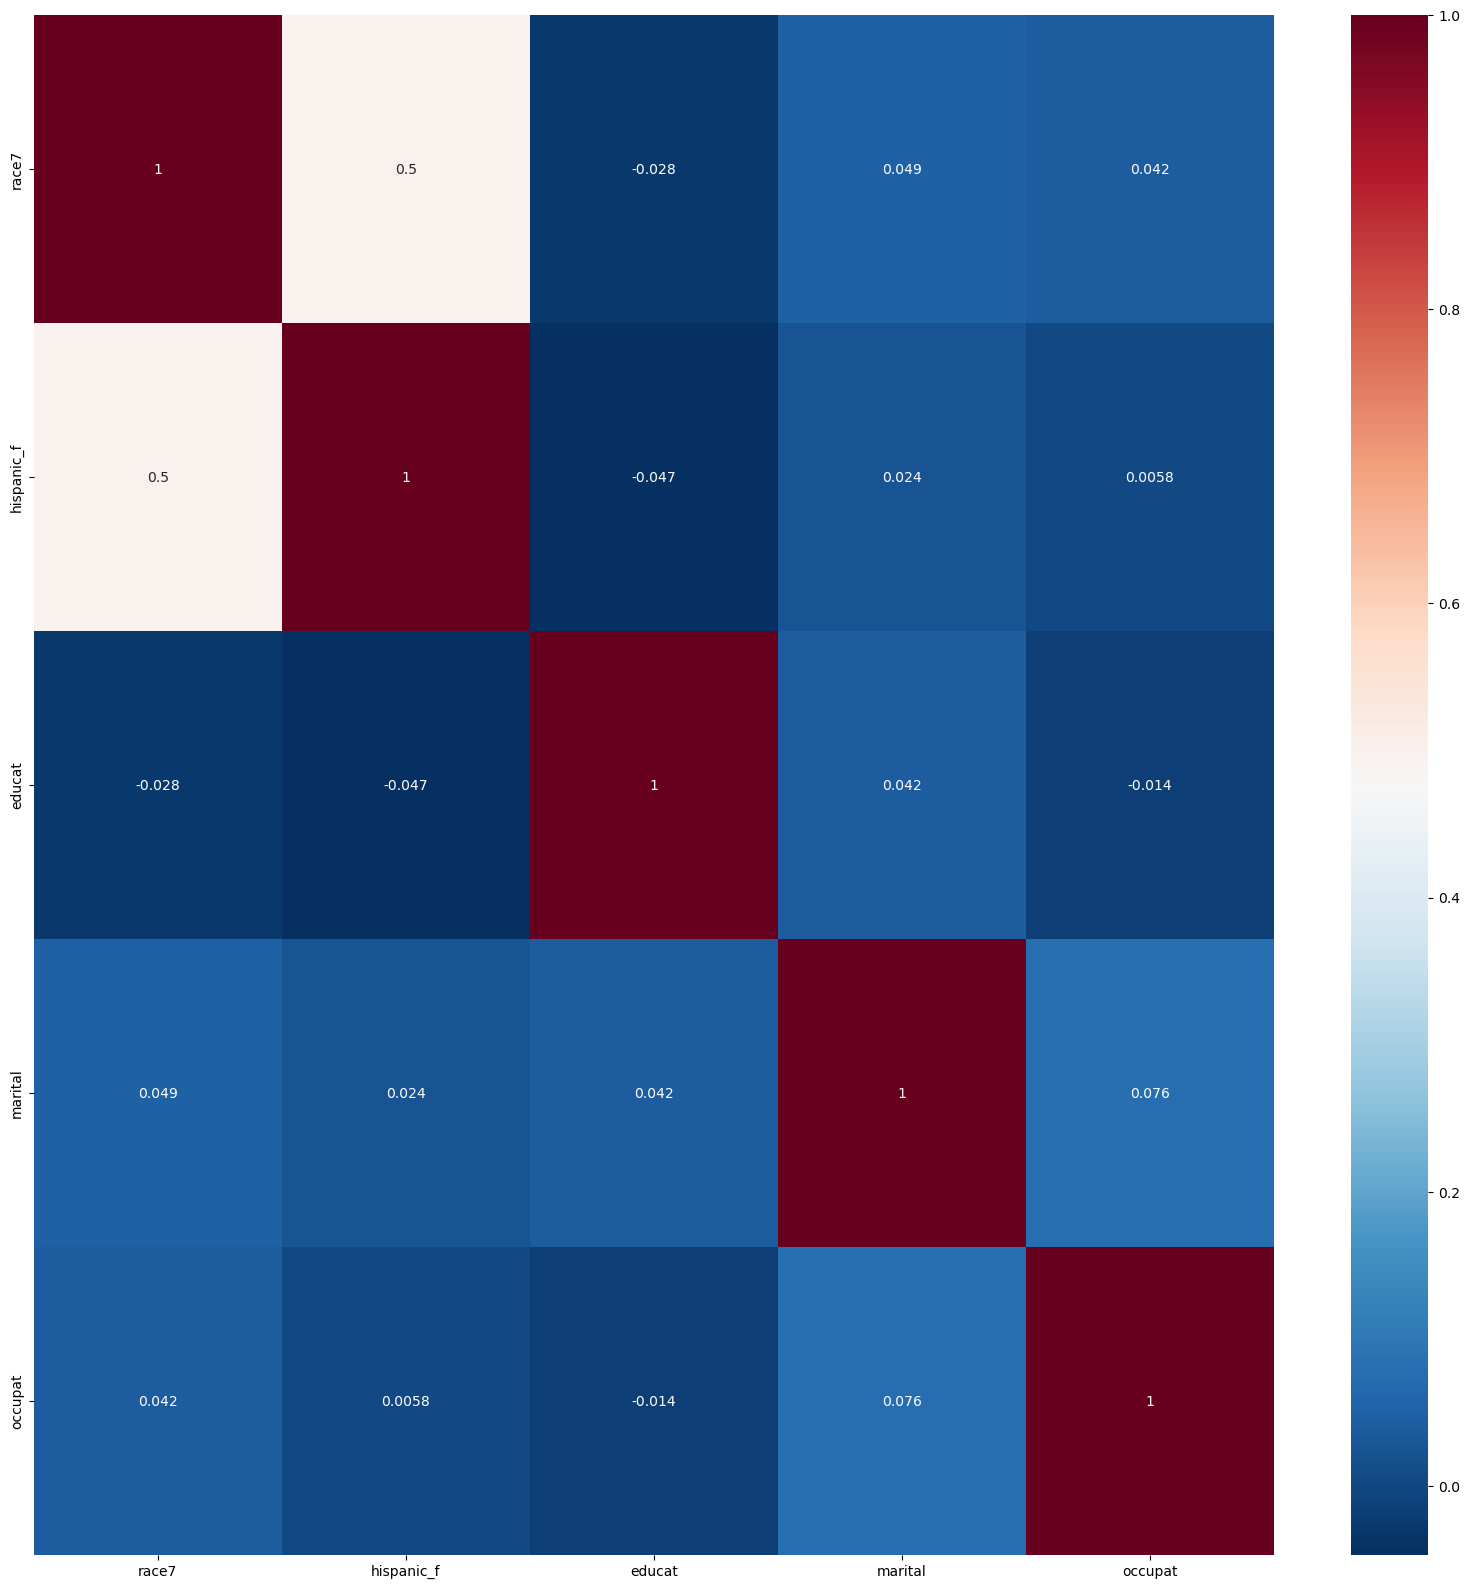

In [118]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section17].corr(), cmap='RdBu_r', annot = True)

## Section 18: BQ Smoking
---

In [120]:
section18_df = liver_cancer_df_with_bq[section18]
section18_df

cig_stat  cig_stop  cig_years  cigpd_f  pack_years  cigar  filtered_f  \
0            0.0       NaN        0.0      0.0         0.0    0.0         NaN   
1            2.0      33.0        8.0      5.0        24.0    2.0         1.0   
2            2.0      13.0       35.0      2.0        35.0    0.0         2.0   
3            0.0       NaN        0.0      0.0         0.0    0.0         NaN   
4            2.0      25.0       20.0      1.0        10.0    0.0         1.0   
...          ...       ...        ...      ...         ...    ...         ...   
154882       0.0       NaN        0.0      0.0         0.0    0.0         NaN   
154883       0.0       NaN        0.0      0.0         0.0    0.0         NaN   
154884       2.0      14.0       42.0      3.0        63.0    0.0         2.0   
154885       1.0       0.0       42.0      2.0        42.0    0.0         1.0   
154886       0.0       NaN        0.0      0.0         0.0    0.0         NaN   

        pipe  rsmoker_f  smokea_f  smoked_f  ssmokea_f  
0        0.0        NaN       NaN       0.0        NaN  
1        2.0        0.0      21.0       1.0       29.0  
2        0.0        0.0      15.0       1.0       50.0  
3        0.0        NaN       NaN       0.0        NaN  
4        0.0        0.0      18.0       1.0       38.0  
...      ...        ...       ...       ...        ...  
154882   0.0        NaN       NaN       0.0        NaN  
154883   0.0        NaN       NaN       0.0        NaN  
154884   0.0        0.0      16.0       1.0       58.0  
154885   0.0        1.0      20.0       1.0        NaN  
154886   0.0        NaN       NaN       0.0        NaN  

[149369 rows x 12 columns]

In [121]:
section18_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149369 entries, 0 to 154886
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cig_stat    149348 non-null  float64
 1   cig_stop    79101 non-null   float64
 2   cig_years   147688 non-null  float64
 3   cigpd_f     149155 non-null  float64
 4   pack_years  147543 non-null  float64
 5   cigar       147635 non-null  float64
 6   filtered_f  80182 non-null   float64
 7   pipe        147795 non-null  float64
 8   rsmoker_f   80344 non-null   float64
 9   smokea_f    79855 non-null   float64
 10  smoked_f    149350 non-null  float64
 11  ssmokea_f   63153 non-null   float64
dtypes: float64(12)
memory usage: 14.8 MB


In [122]:
daf.nulls_percentage(section18_df)

cig_stat , 0.0% nulls , 3 unique values, float64
cig_stop , 47.0% nulls , 63 unique values, float64
cig_years , 1.1% nulls , 66 unique values, float64
cigpd_f , 0.1% nulls , 8 unique values, float64
pack_years , 1.2% nulls , 220 unique values, float64
cigar , 1.2% nulls , 3 unique values, float64
filtered_f , 46.3% nulls , 3 unique values, float64
pipe , 1.1% nulls , 3 unique values, float64
rsmoker_f , 46.2% nulls , 2 unique values, float64
smokea_f , 46.5% nulls , 63 unique values, float64
smoked_f , 0.0% nulls , 2 unique values, float64
ssmokea_f , 57.7% nulls , 67 unique values, float64


array([[<Axes: title={'center': 'cig_stat'}>,
        <Axes: title={'center': 'cig_stop'}>,
        <Axes: title={'center': 'cig_years'}>],
       [<Axes: title={'center': 'cigpd_f'}>,
        <Axes: title={'center': 'pack_years'}>,
        <Axes: title={'center': 'cigar'}>],
       [<Axes: title={'center': 'filtered_f'}>,
        <Axes: title={'center': 'pipe'}>,
        <Axes: title={'center': 'rsmoker_f'}>],
       [<Axes: title={'center': 'smokea_f'}>,
        <Axes: title={'center': 'smoked_f'}>,
        <Axes: title={'center': 'ssmokea_f'}>]], dtype=object)

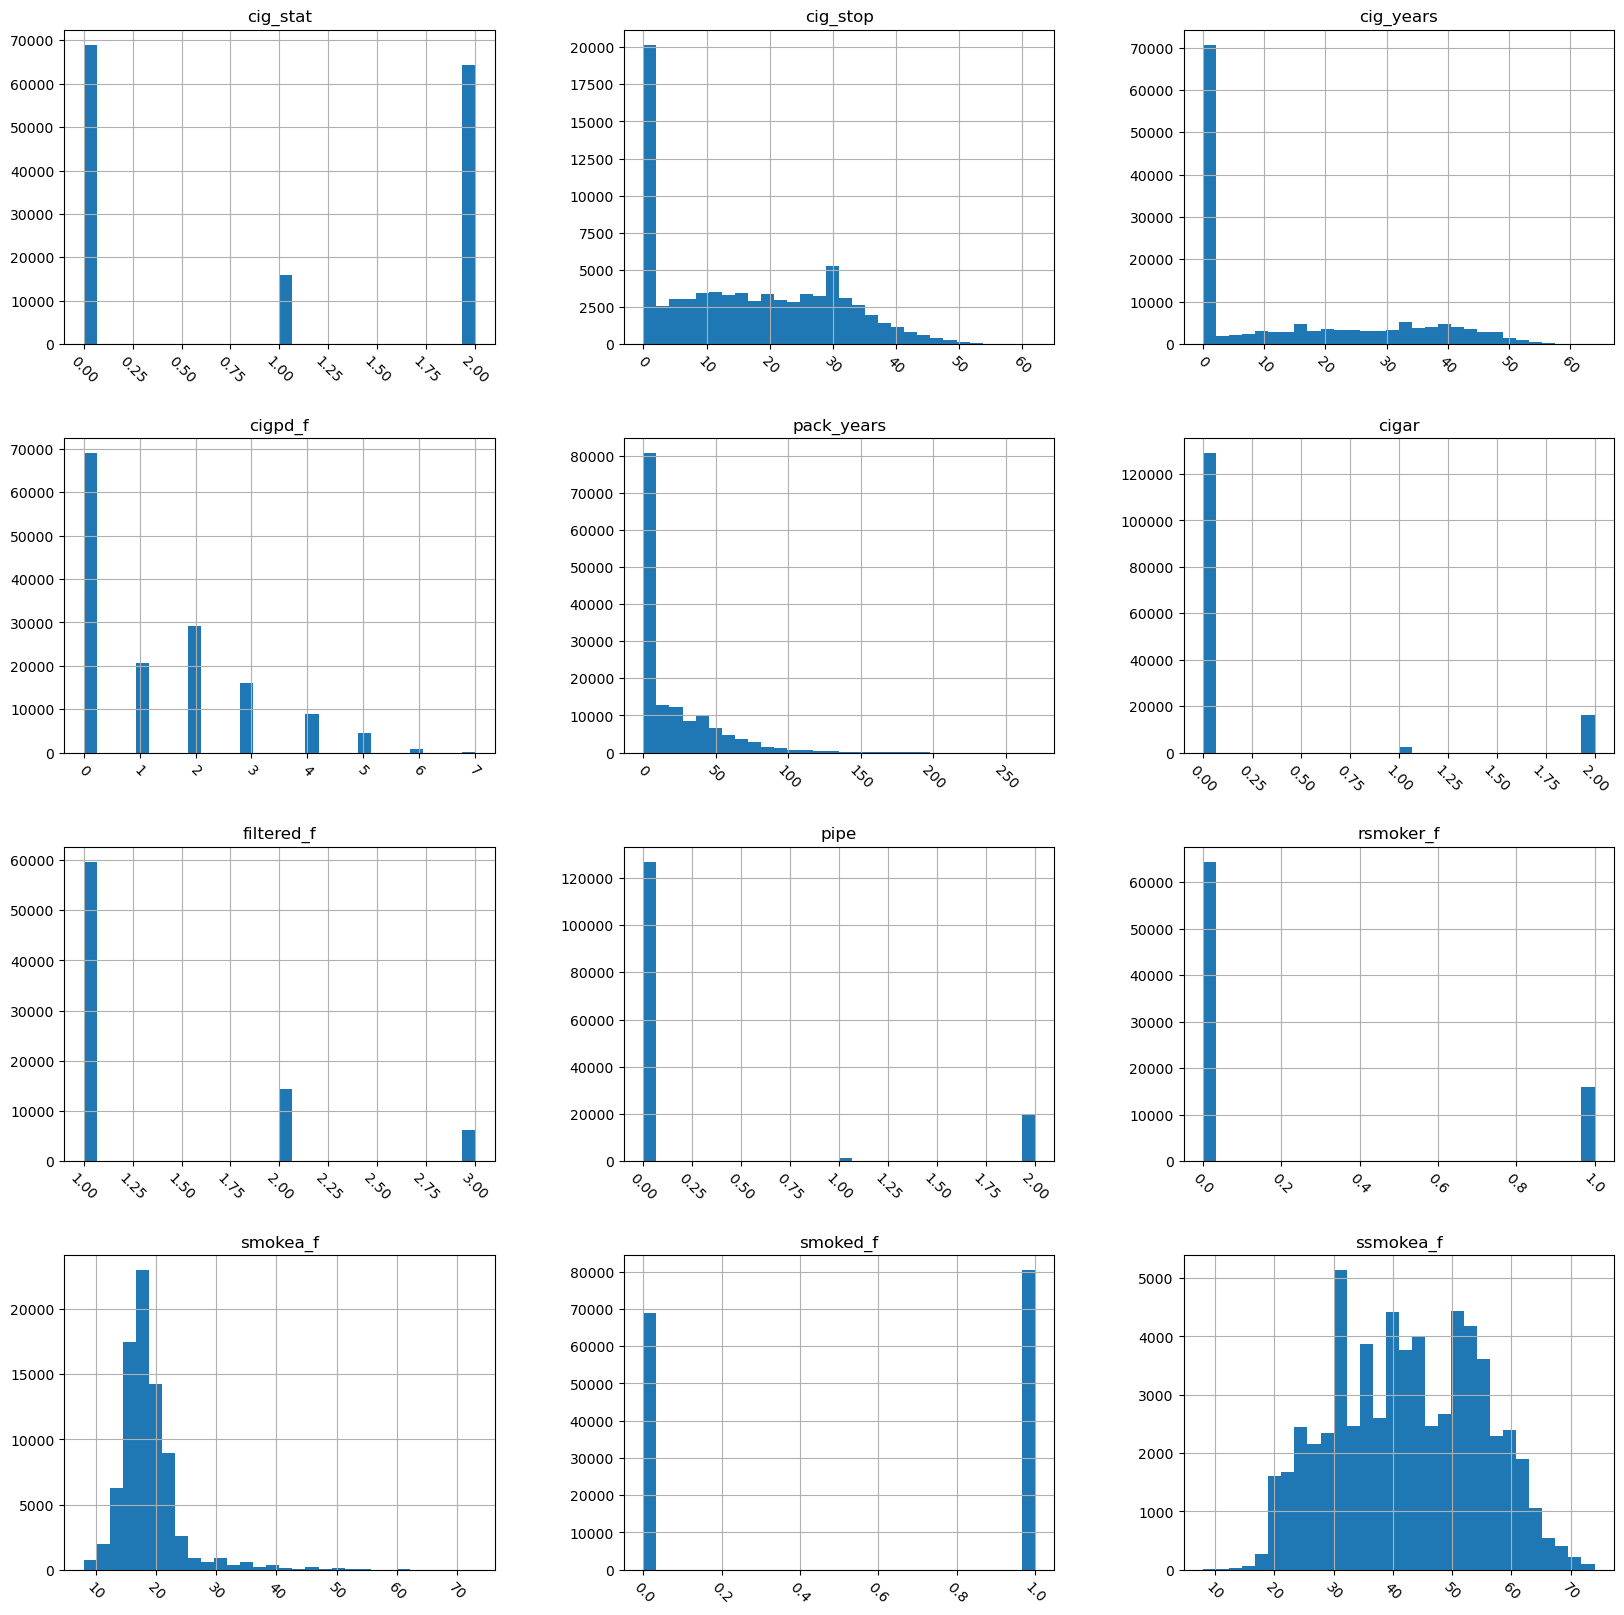

In [123]:
section18_df.hist(figsize=(20,20), bins = 30, xrot=-45)

<Axes: >

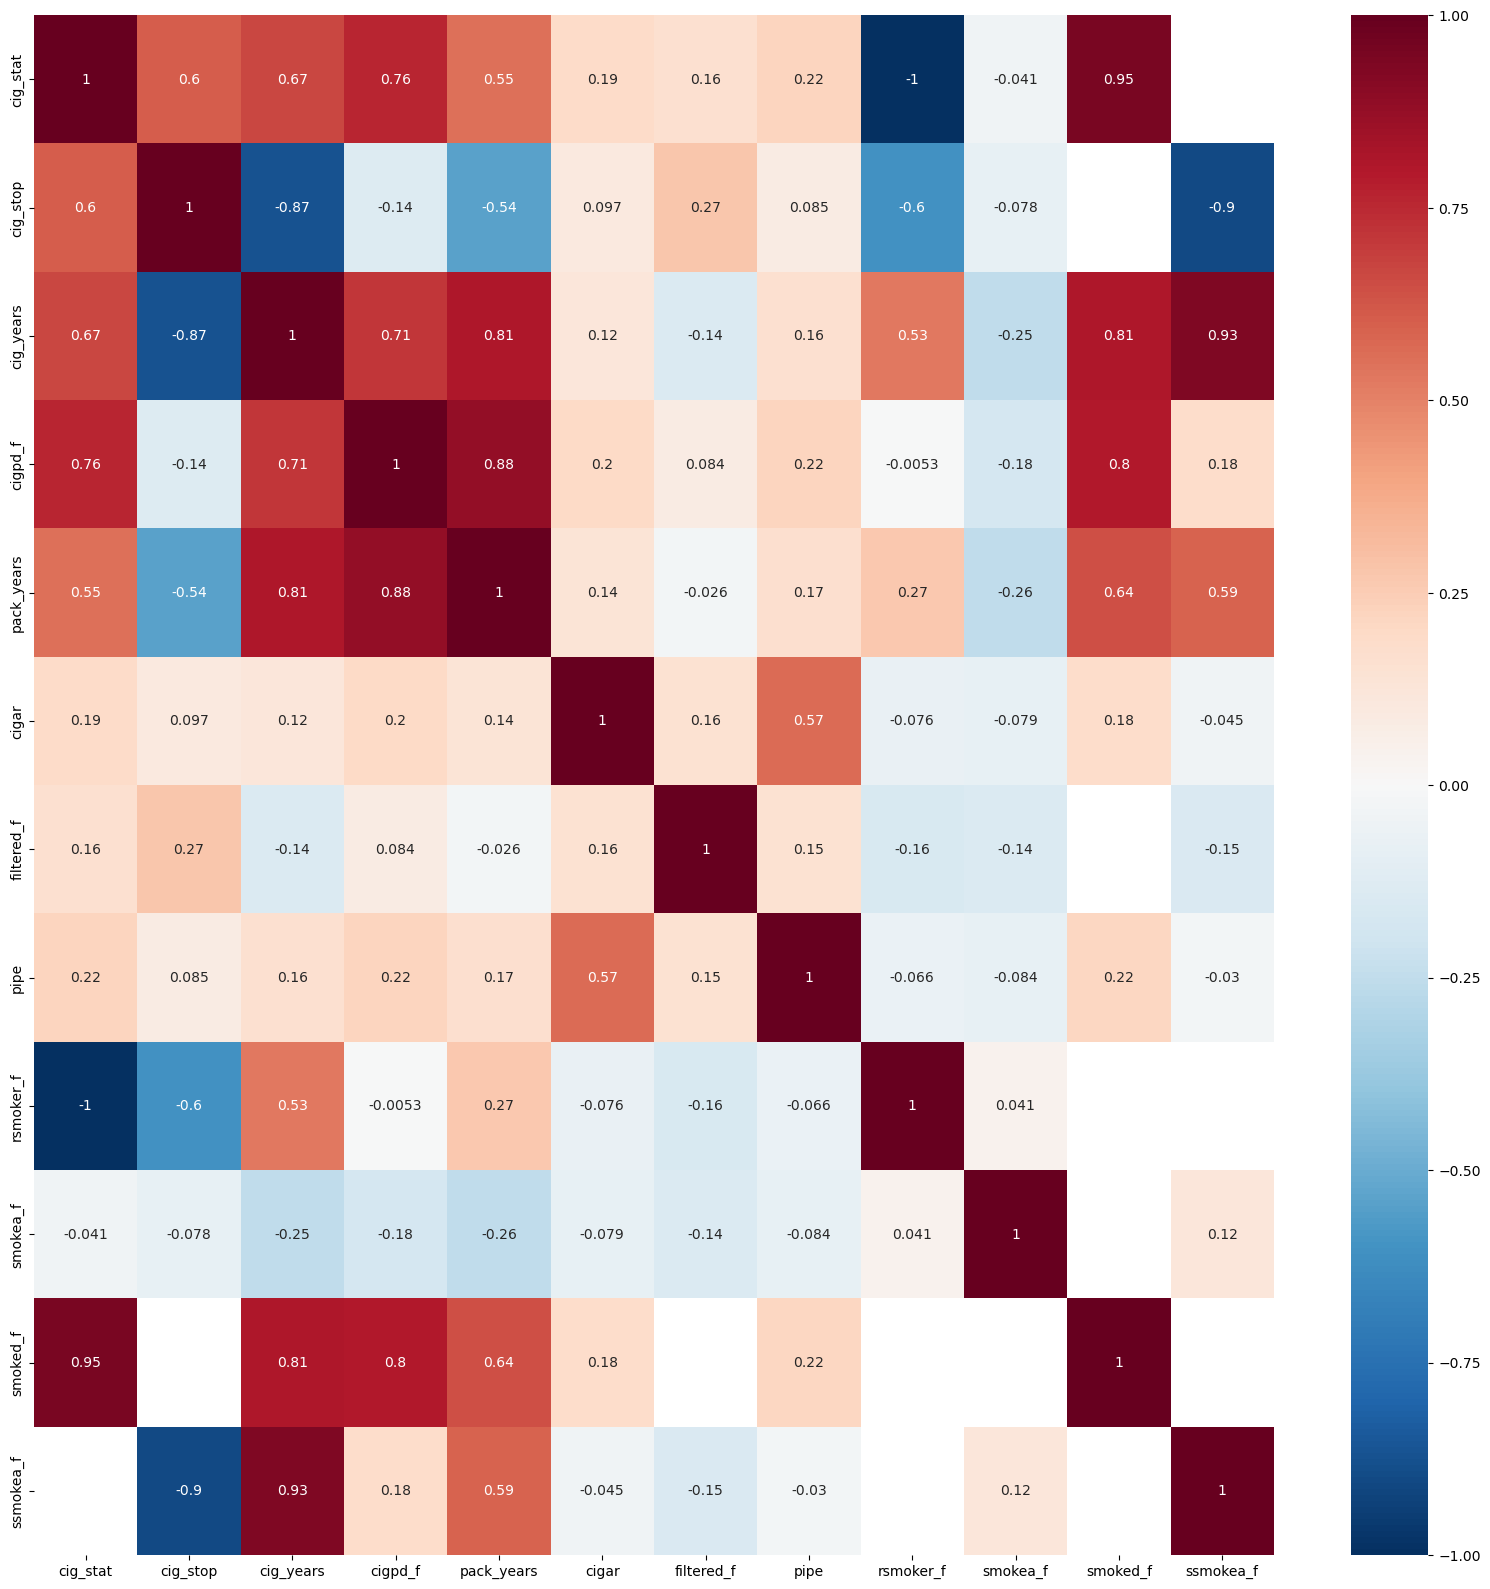

In [124]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section18].corr(), cmap='RdBu_r', annot = True)

## Section 19: BQ Family History
---

In [126]:
section19_df = liver_cancer_df_with_bq[section19]
section19_df

fh_cancer  liver_fh  liver_fh_age  liver_fh_cnt  brothers  sisters
0             1.0       9.0           NaN           0.0       3.0      3.0
1             1.0       0.0           NaN           0.0       2.0      0.0
2             1.0       0.0           NaN           0.0       2.0      1.0
3             0.0       0.0           NaN           0.0       0.0      0.0
4             1.0       0.0           NaN           0.0       0.0      2.0
...           ...       ...           ...           ...       ...      ...
154882        1.0       0.0           NaN           0.0       0.0      1.0
154883        1.0       0.0           NaN           0.0       2.0      2.0
154884        1.0       0.0           NaN           0.0       6.0      2.0
154885        0.0       0.0           NaN           0.0       4.0      1.0
154886        1.0       0.0           NaN           0.0       2.0      5.0

[149369 rows x 6 columns]

In [127]:
section19_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149369 entries, 0 to 154886
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   fh_cancer     148867 non-null  float64
 1   liver_fh      148210 non-null  float64
 2   liver_fh_age  2997 non-null    float64
 3   liver_fh_cnt  148210 non-null  float64
 4   brothers      148246 non-null  float64
 5   sisters       147898 non-null  float64
dtypes: float64(6)
memory usage: 8.0 MB


In [128]:
daf.nulls_percentage(section19_df)

fh_cancer , 0.3% nulls , 2 unique values, float64
liver_fh , 0.8% nulls , 3 unique values, float64
liver_fh_age , 98.0% nulls , 87 unique values, float64
liver_fh_cnt , 0.8% nulls , 4 unique values, float64
brothers , 0.8% nulls , 8 unique values, float64
sisters , 1.0% nulls , 8 unique values, float64


array([[<Axes: title={'center': 'fh_cancer'}>,
        <Axes: title={'center': 'liver_fh'}>],
       [<Axes: title={'center': 'liver_fh_age'}>,
        <Axes: title={'center': 'liver_fh_cnt'}>],
       [<Axes: title={'center': 'brothers'}>,
        <Axes: title={'center': 'sisters'}>]], dtype=object)

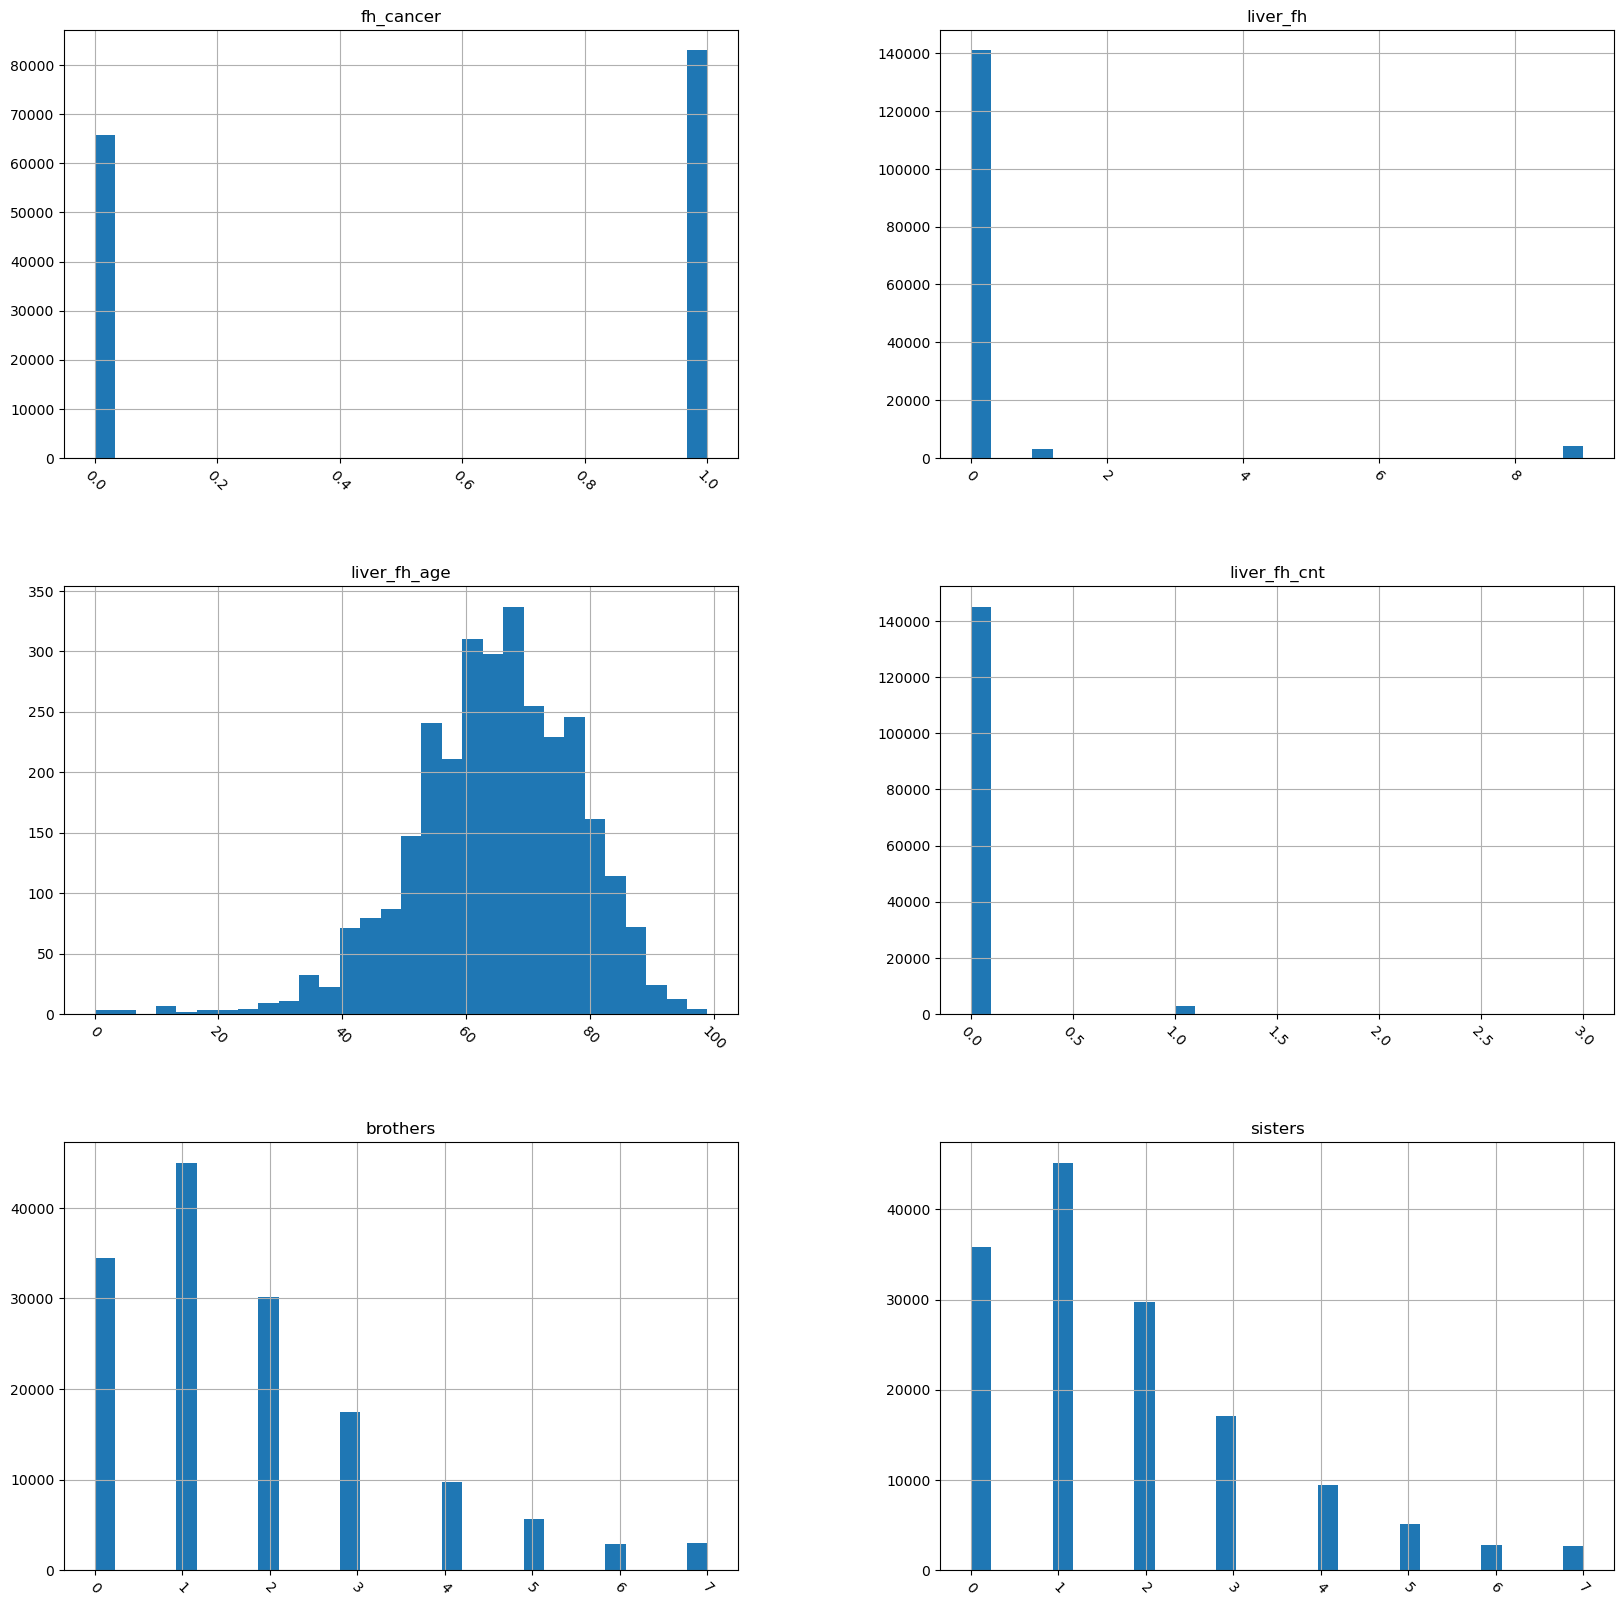

In [129]:
section19_df.hist(figsize=(20,20), bins = 30, xrot=-45)

<Axes: >

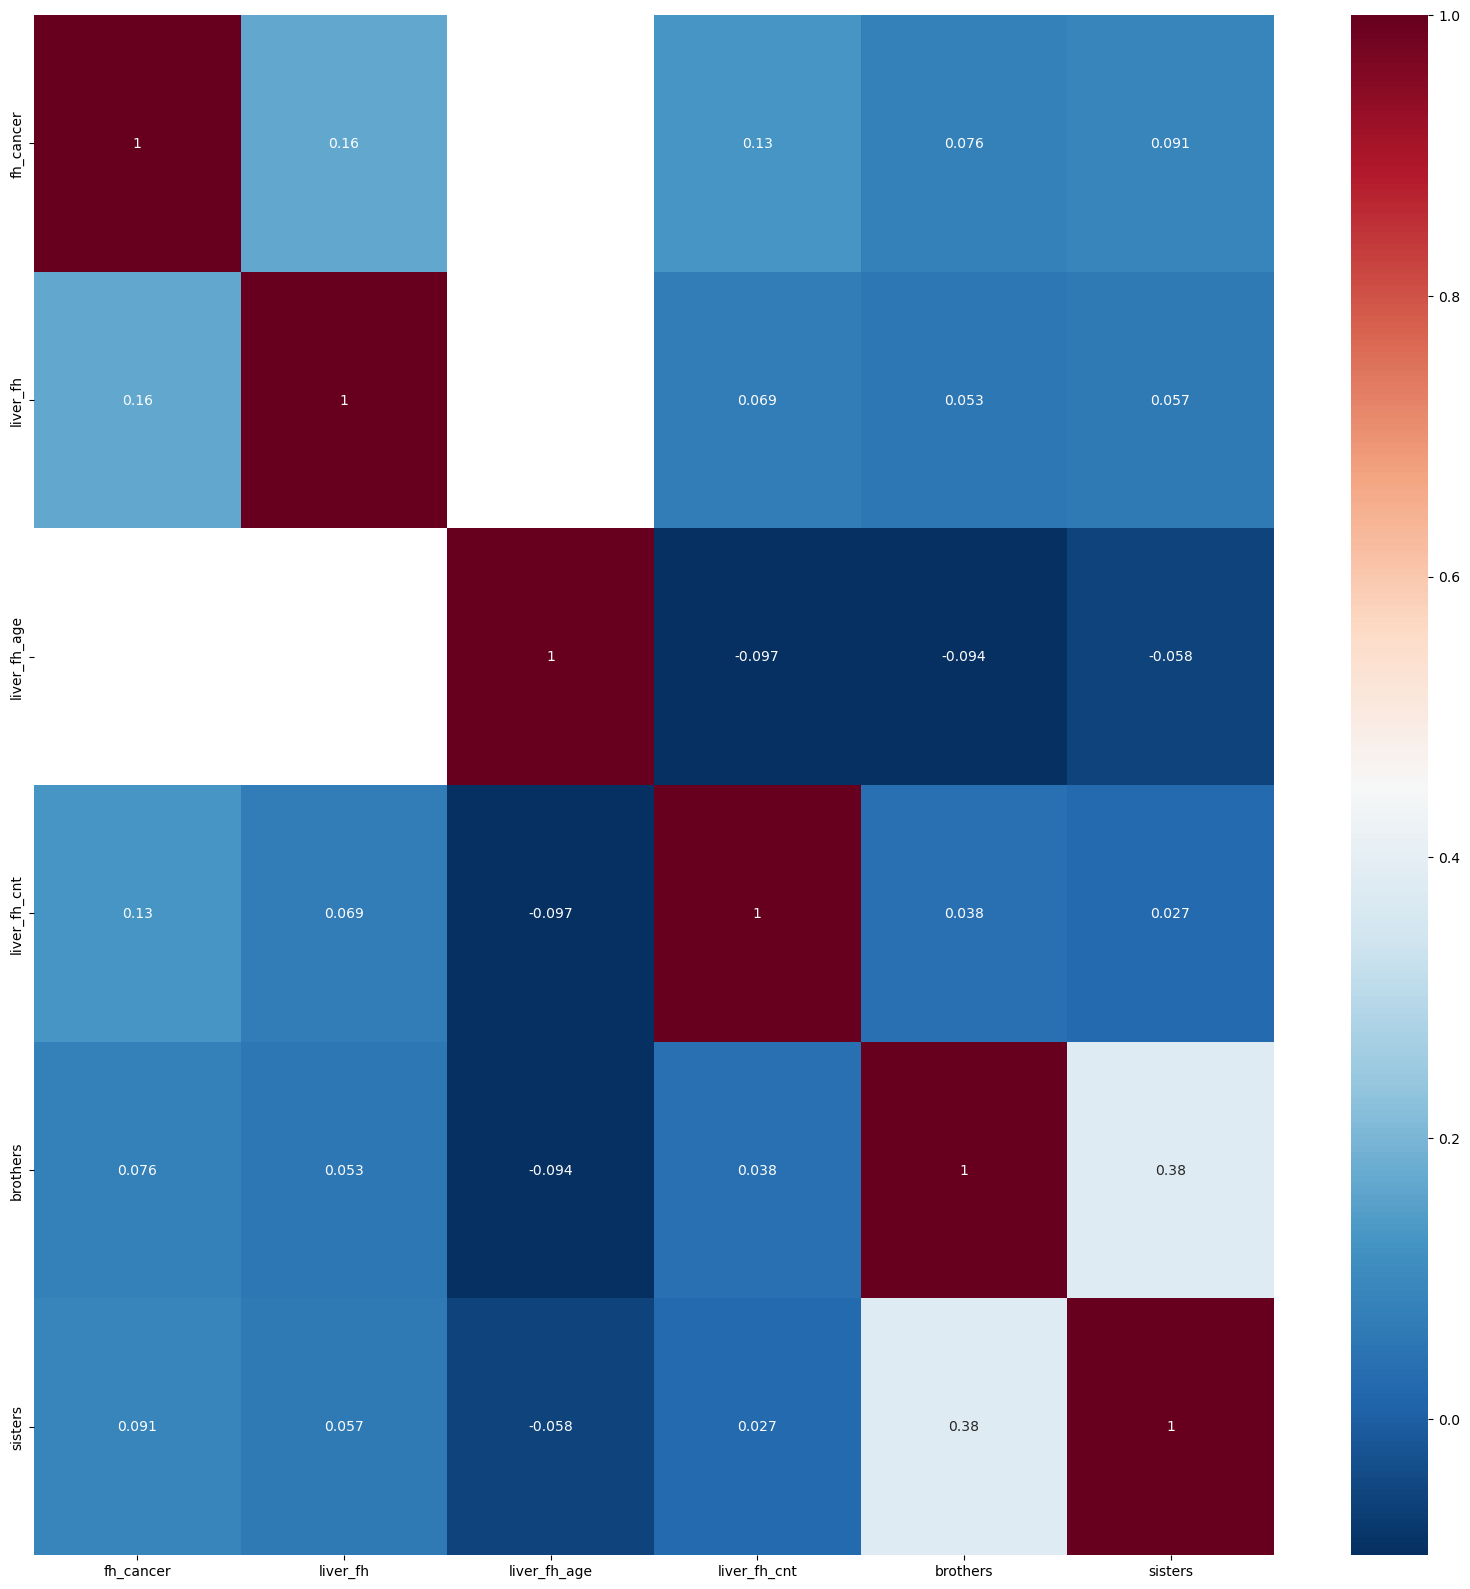

In [130]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section19].corr(), cmap='RdBu_r', annot = True)

## Section 20: BQ Body Type
---

In [132]:
section20_df = liver_cancer_df_with_bq[section20]
section20_df

bmi_curc   bmi_curr  height_f  weight_f     bmi_20  bmi_20c  \
0            3.0  25.724339      73.0     195.0  26.383937      3.0   
1            3.0  25.659988      71.0     184.0  22.313033      2.0   
2            4.0  34.585201      71.0     248.0  30.680421      4.0   
3            2.0  22.312012      64.0     130.0  20.595703      2.0   
4            3.0  27.460938      64.0     160.0  18.879395      2.0   
...          ...        ...       ...       ...        ...      ...   
154882       3.0  29.411224      70.0     205.0  25.107143      3.0   
154883       3.0  28.886246      68.0     190.0  20.524438      2.0   
154884       4.0  33.715306      70.0     235.0  21.520408      2.0   
154885       3.0  27.405881      67.0     175.0  20.985075      2.0   
154886       3.0  25.229736      64.0     147.0  22.655273      2.0   

        weight20_f     bmi_50  bmi_50c  weight50_f  
0            200.0  29.022331      3.0       220.0  
1            160.0  27.891291      3.0       200.0  
2            220.0  32.074985      4.0       230.0  
3            120.0  22.312012      2.0       130.0  
4            110.0  24.886475      2.0       145.0  
...            ...        ...      ...         ...  
154882       175.0  26.541837      3.0       185.0  
154883       135.0  26.605753      3.0       175.0  
154884       150.0  30.128571      4.0       210.0  
154885       134.0  25.839831      3.0       165.0  
154886       132.0  25.401367      3.0       148.0  

[149369 rows x 10 columns]

In [133]:
section20_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149369 entries, 0 to 154886
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bmi_curc    147078 non-null  float64
 1   bmi_curr    147078 non-null  float64
 2   height_f    148162 non-null  float64
 3   weight_f    147836 non-null  float64
 4   bmi_20      146618 non-null  float64
 5   bmi_20c     146618 non-null  float64
 6   weight20_f  147359 non-null  float64
 7   bmi_50      147236 non-null  float64
 8   bmi_50c     147236 non-null  float64
 9   weight50_f  147993 non-null  float64
dtypes: float64(10)
memory usage: 12.5 MB


In [134]:
daf.nulls_percentage(section20_df)

bmi_curc , 1.5% nulls , 4 unique values, float64
bmi_curr , 1.5% nulls , 3882 unique values, float64
height_f , 0.8% nulls , 37 unique values, float64
weight_f , 1.0% nulls , 289 unique values, float64
bmi_20 , 1.8% nulls , 2385 unique values, float64
bmi_20c , 1.8% nulls , 4 unique values, float64
weight20_f , 1.3% nulls , 219 unique values, float64
bmi_50 , 1.4% nulls , 3204 unique values, float64
bmi_50c , 1.4% nulls , 4 unique values, float64
weight50_f , 0.9% nulls , 271 unique values, float64


array([[<Axes: title={'center': 'bmi_curc'}>,
        <Axes: title={'center': 'bmi_curr'}>,
        <Axes: title={'center': 'height_f'}>],
       [<Axes: title={'center': 'weight_f'}>,
        <Axes: title={'center': 'bmi_20'}>,
        <Axes: title={'center': 'bmi_20c'}>],
       [<Axes: title={'center': 'weight20_f'}>,
        <Axes: title={'center': 'bmi_50'}>,
        <Axes: title={'center': 'bmi_50c'}>],
       [<Axes: title={'center': 'weight50_f'}>, <Axes: >, <Axes: >]],
      dtype=object)

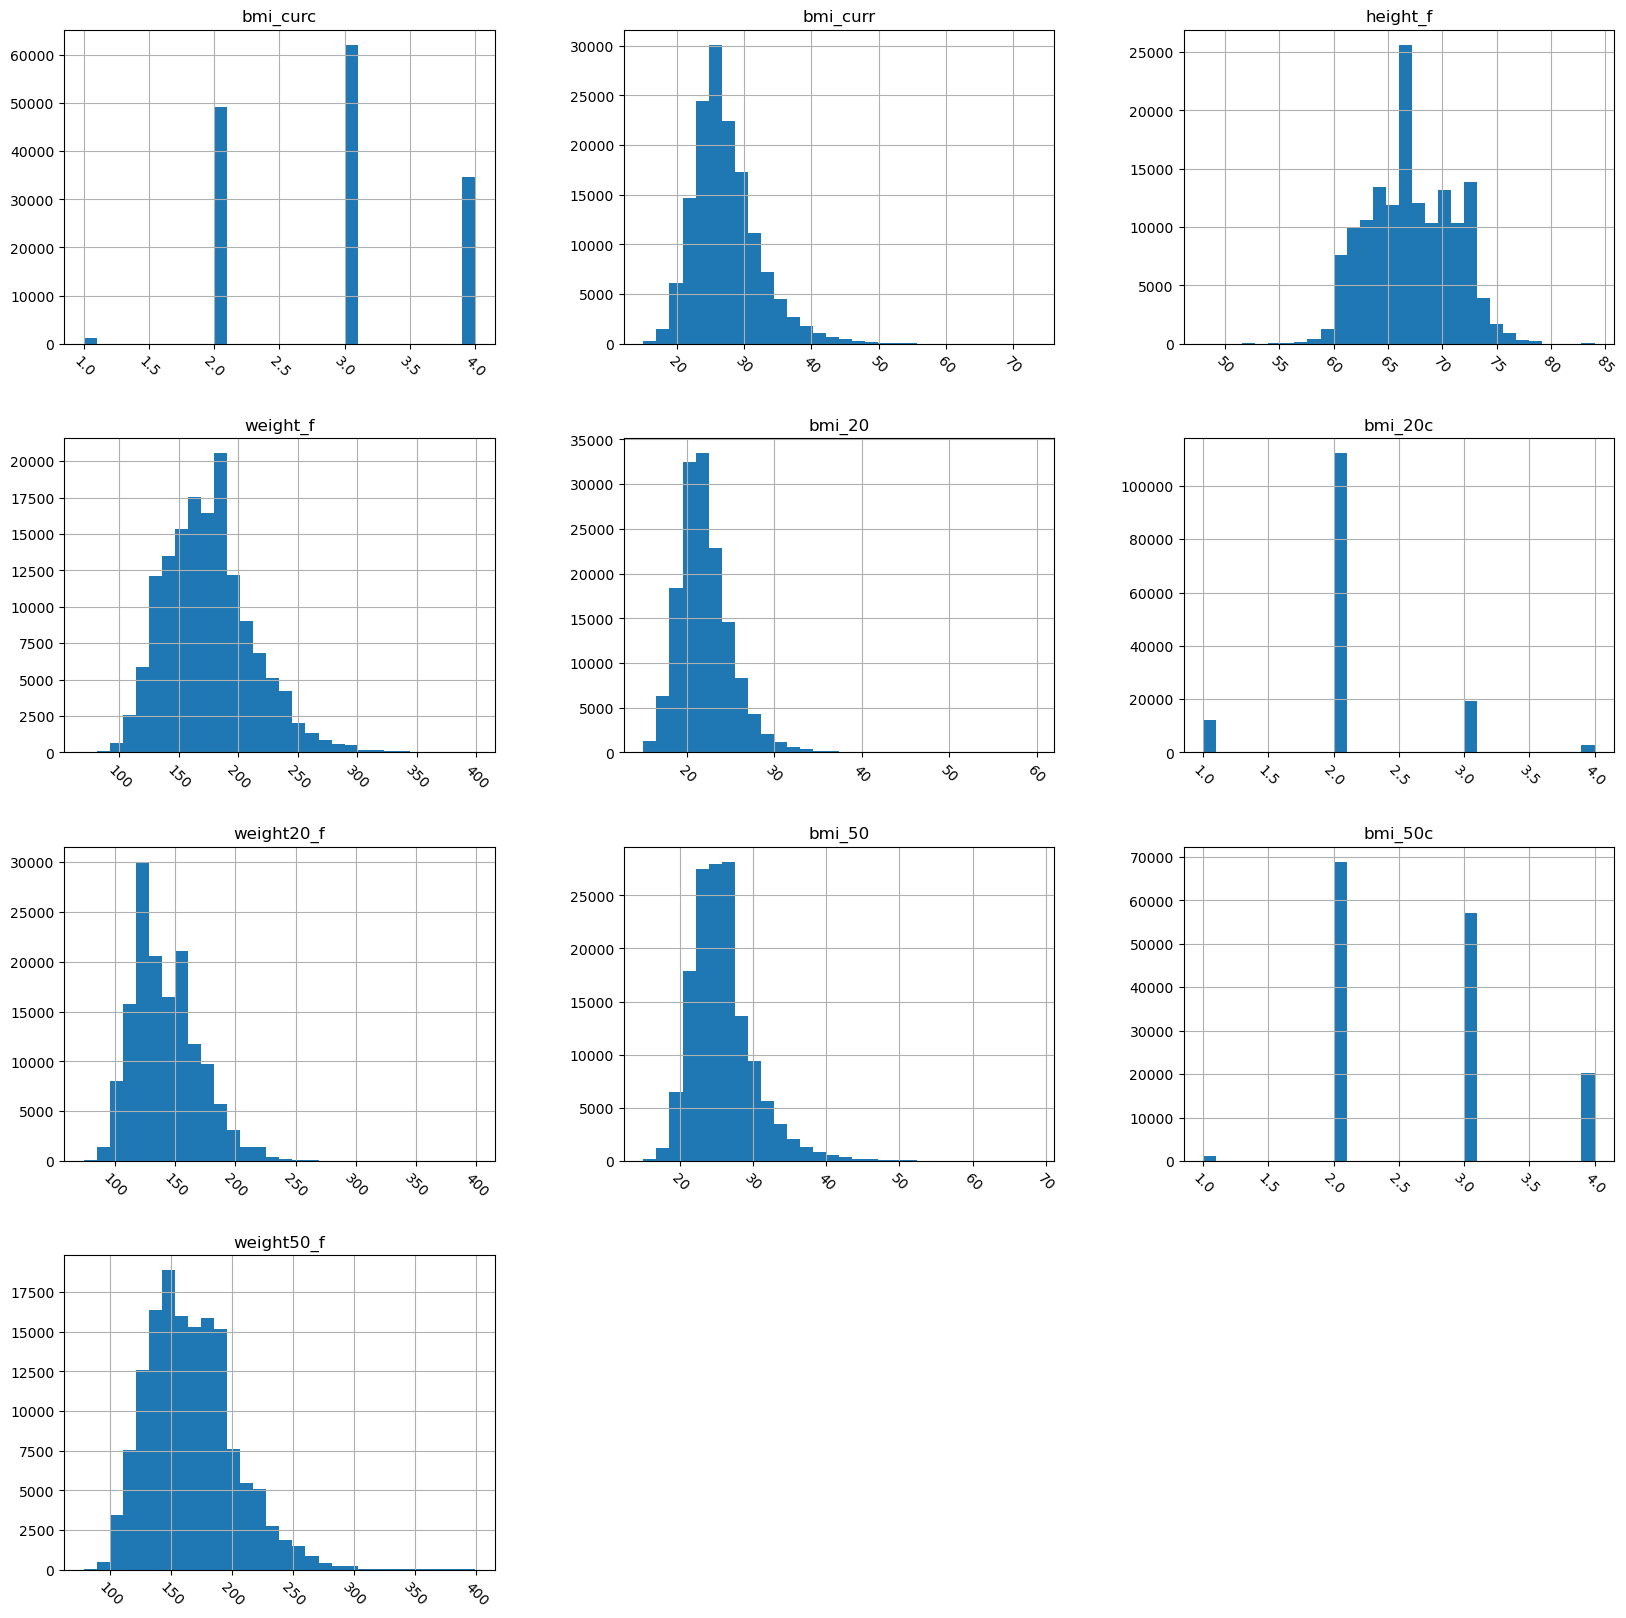

In [135]:
section20_df.hist(figsize=(20,20), bins = 30, xrot=-45)

<Axes: >

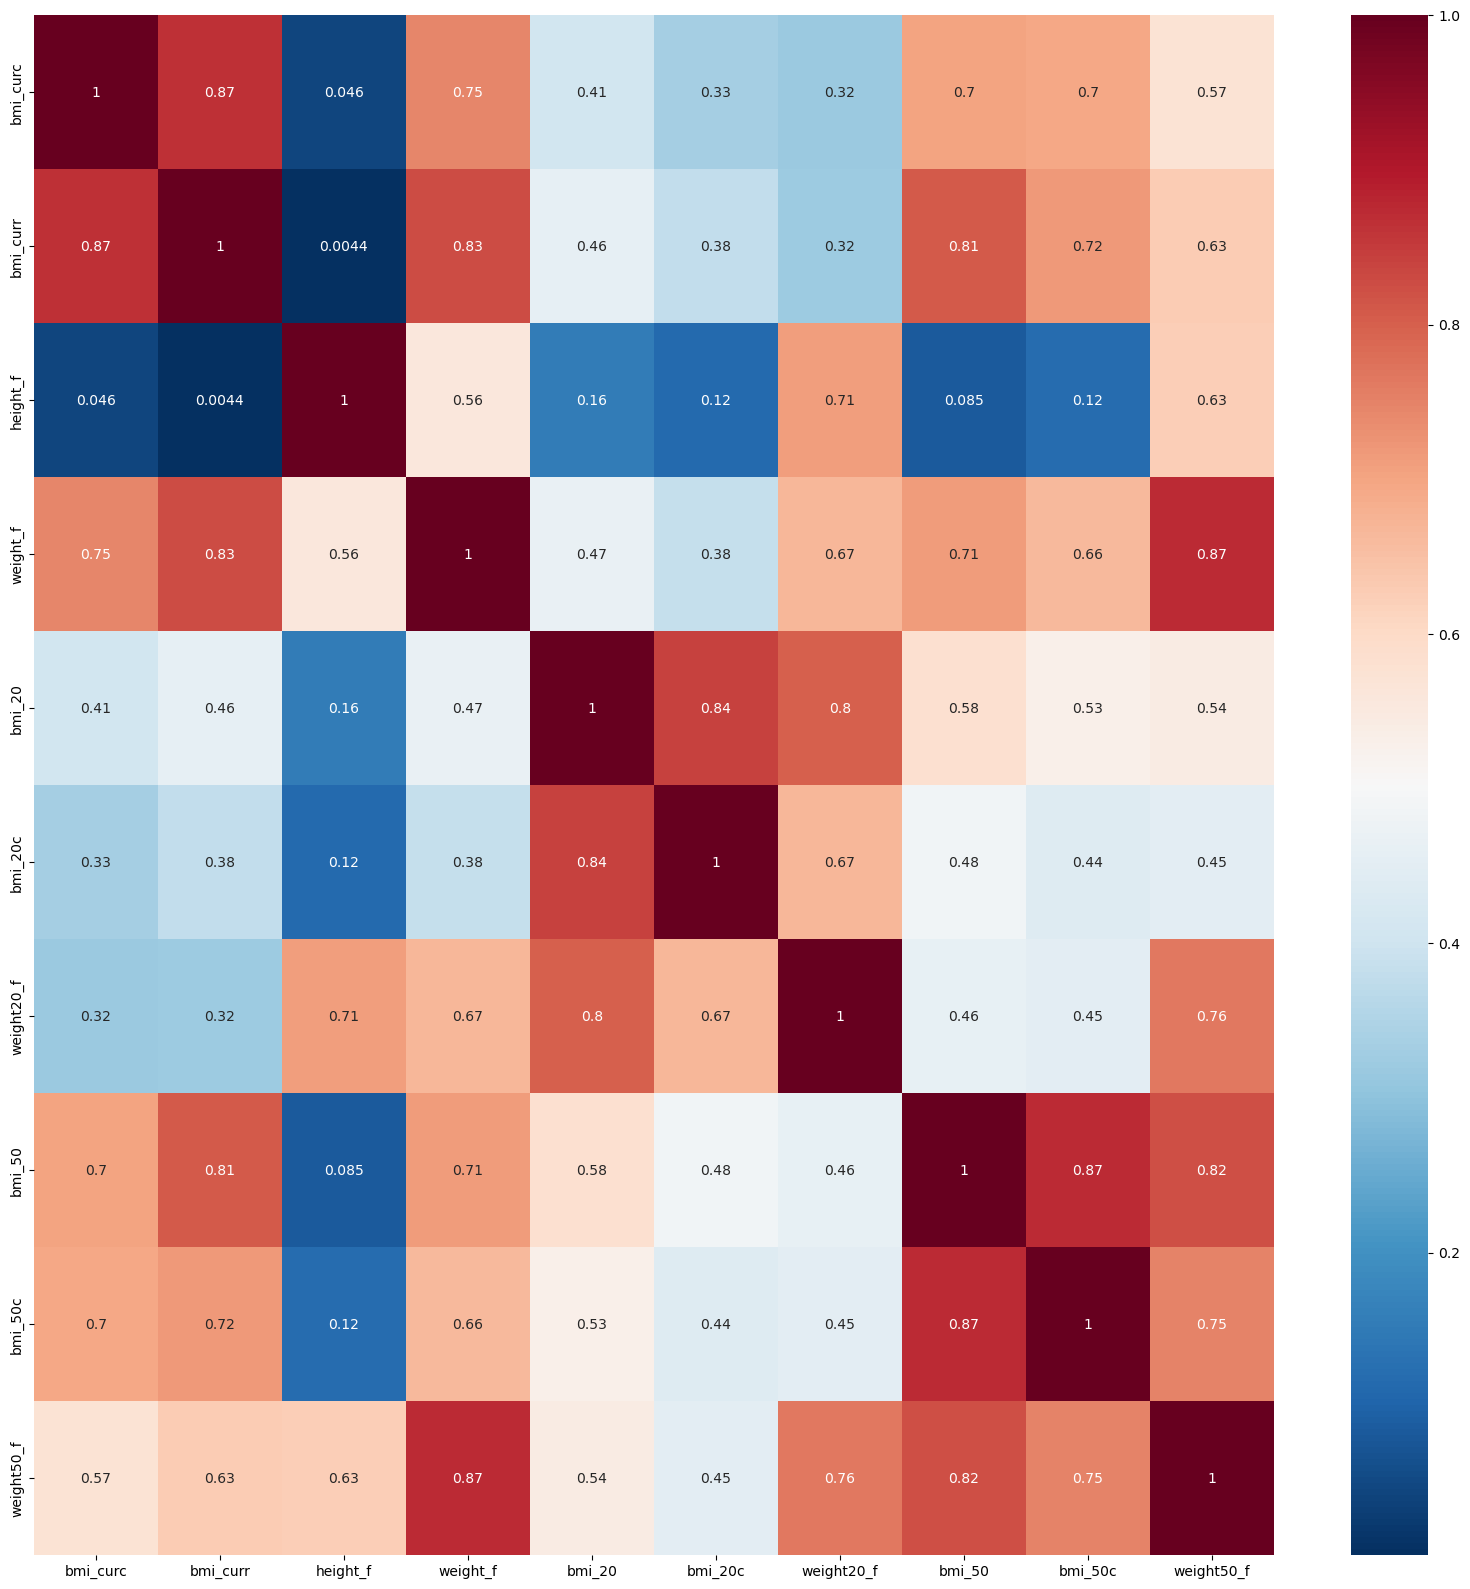

In [136]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section20].corr(), cmap='RdBu_r', annot = True)

## Section 21: BQ NSAIDS
---

In [138]:
section21_df = liver_cancer_df_with_bq[section21]
section21_df

asp  asppd  ibup  ibuppd
0       1.0    4.0   0.0     0.0
1       0.0    0.0   0.0     0.0
2       1.0    2.0   0.0     0.0
3       0.0    0.0   0.0     0.0
4       0.0    0.0   0.0     0.0
...     ...    ...   ...     ...
154882  0.0    0.0   0.0     0.0
154883  0.0    0.0   0.0     0.0
154884  0.0    0.0   0.0     0.0
154885  1.0    1.0   1.0     2.0
154886  0.0    0.0   1.0     7.0

[149369 rows x 4 columns]

In [139]:
section21_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149369 entries, 0 to 154886
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   asp     148517 non-null  float64
 1   asppd   148839 non-null  float64
 2   ibup    148545 non-null  float64
 3   ibuppd  148365 non-null  float64
dtypes: float64(4)
memory usage: 5.7 MB


In [140]:
daf.nulls_percentage(section21_df)

asp , 0.6% nulls , 2 unique values, float64
asppd , 0.4% nulls , 8 unique values, float64
ibup , 0.6% nulls , 2 unique values, float64
ibuppd , 0.7% nulls , 8 unique values, float64


array([[<Axes: title={'center': 'asp'}>,
        <Axes: title={'center': 'asppd'}>],
       [<Axes: title={'center': 'ibup'}>,
        <Axes: title={'center': 'ibuppd'}>]], dtype=object)

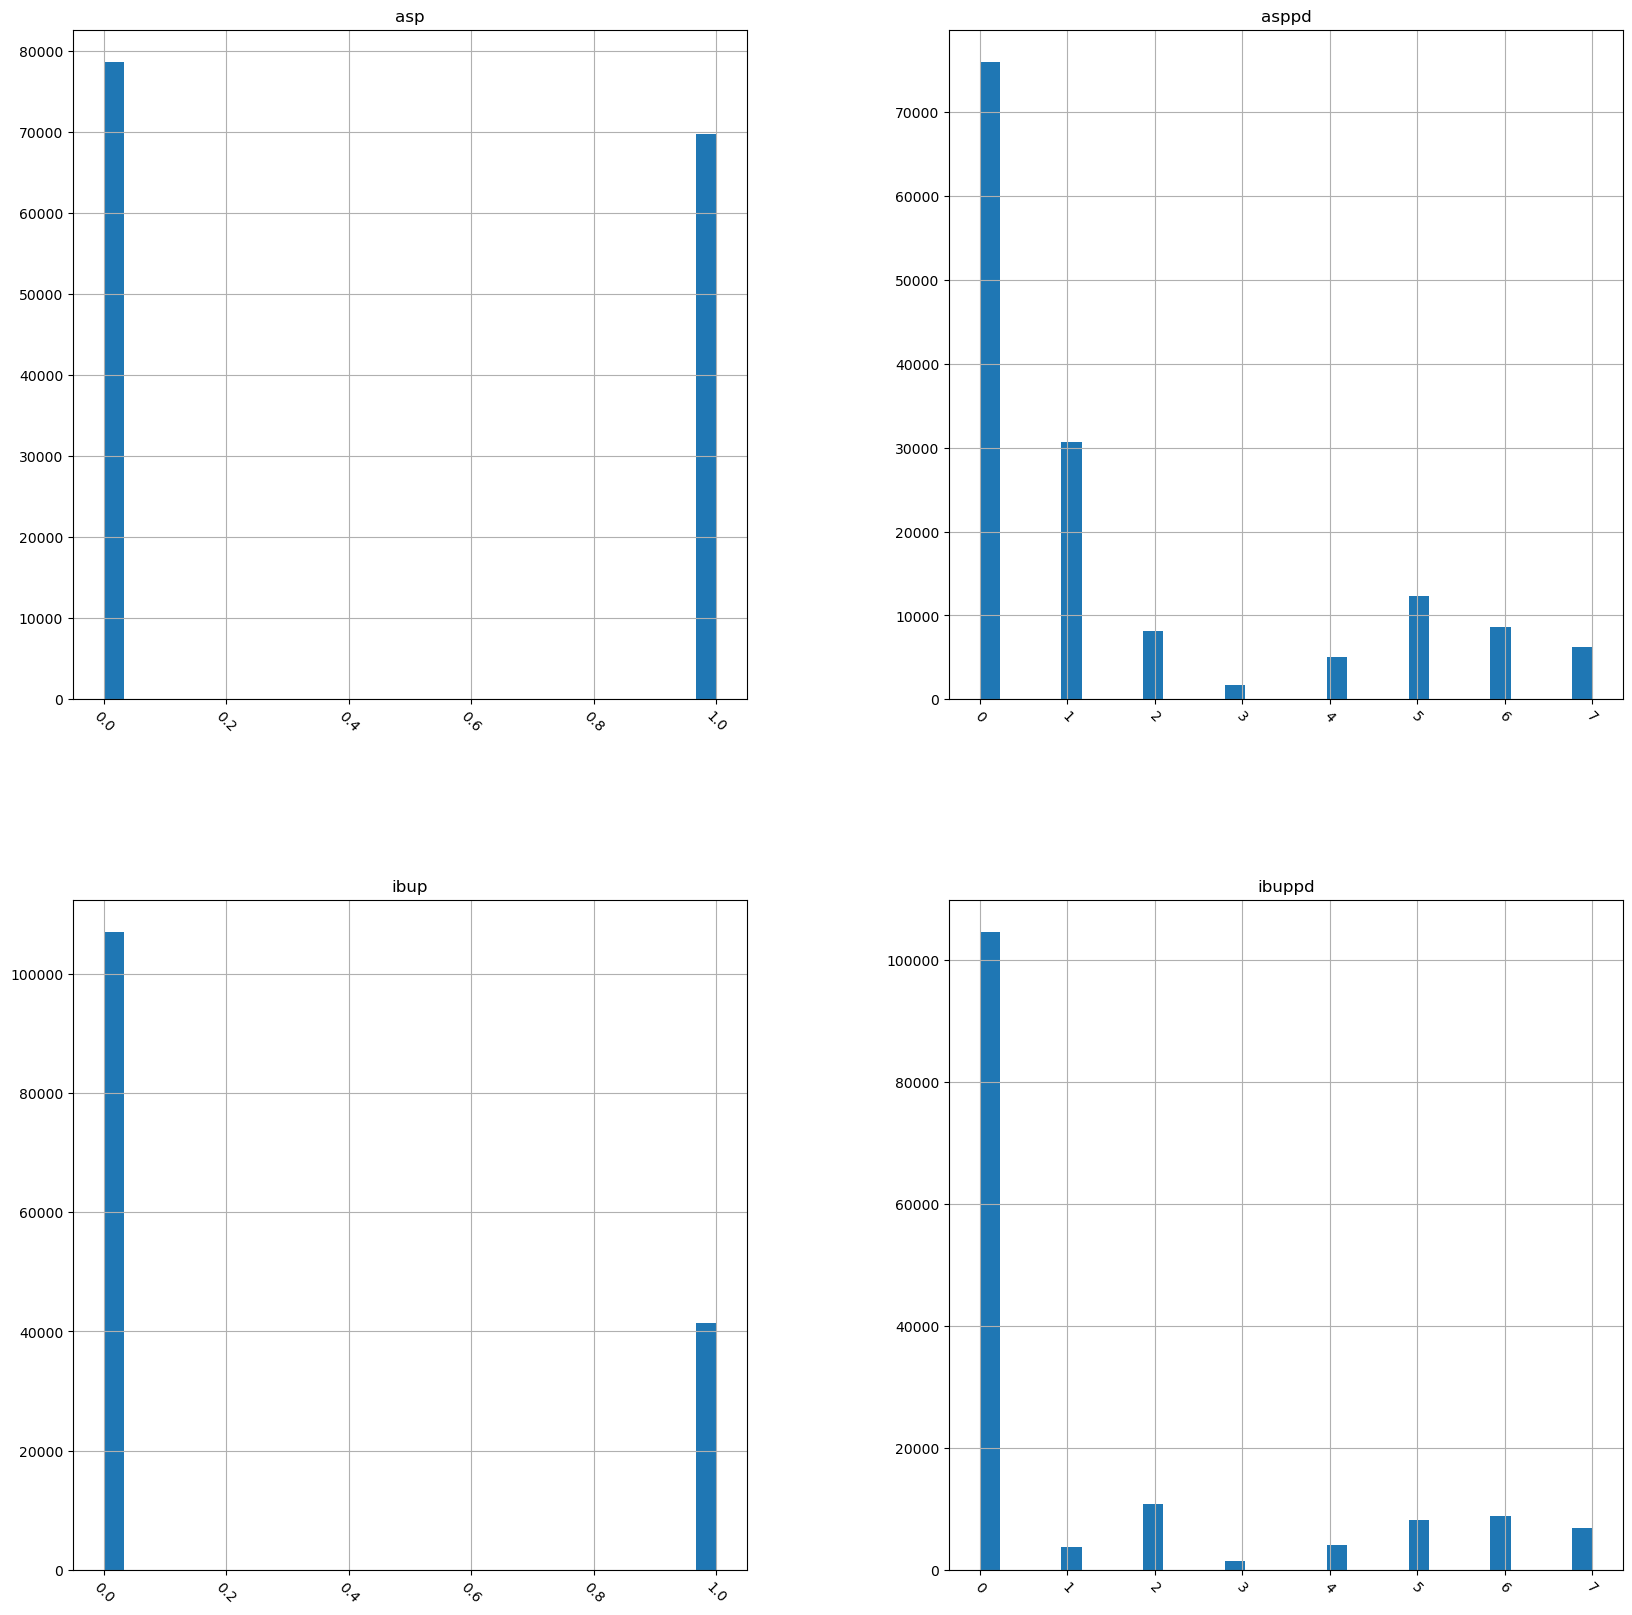

In [141]:
section21_df.hist(figsize=(20,20), bins = 30, xrot=-45)

<Axes: >

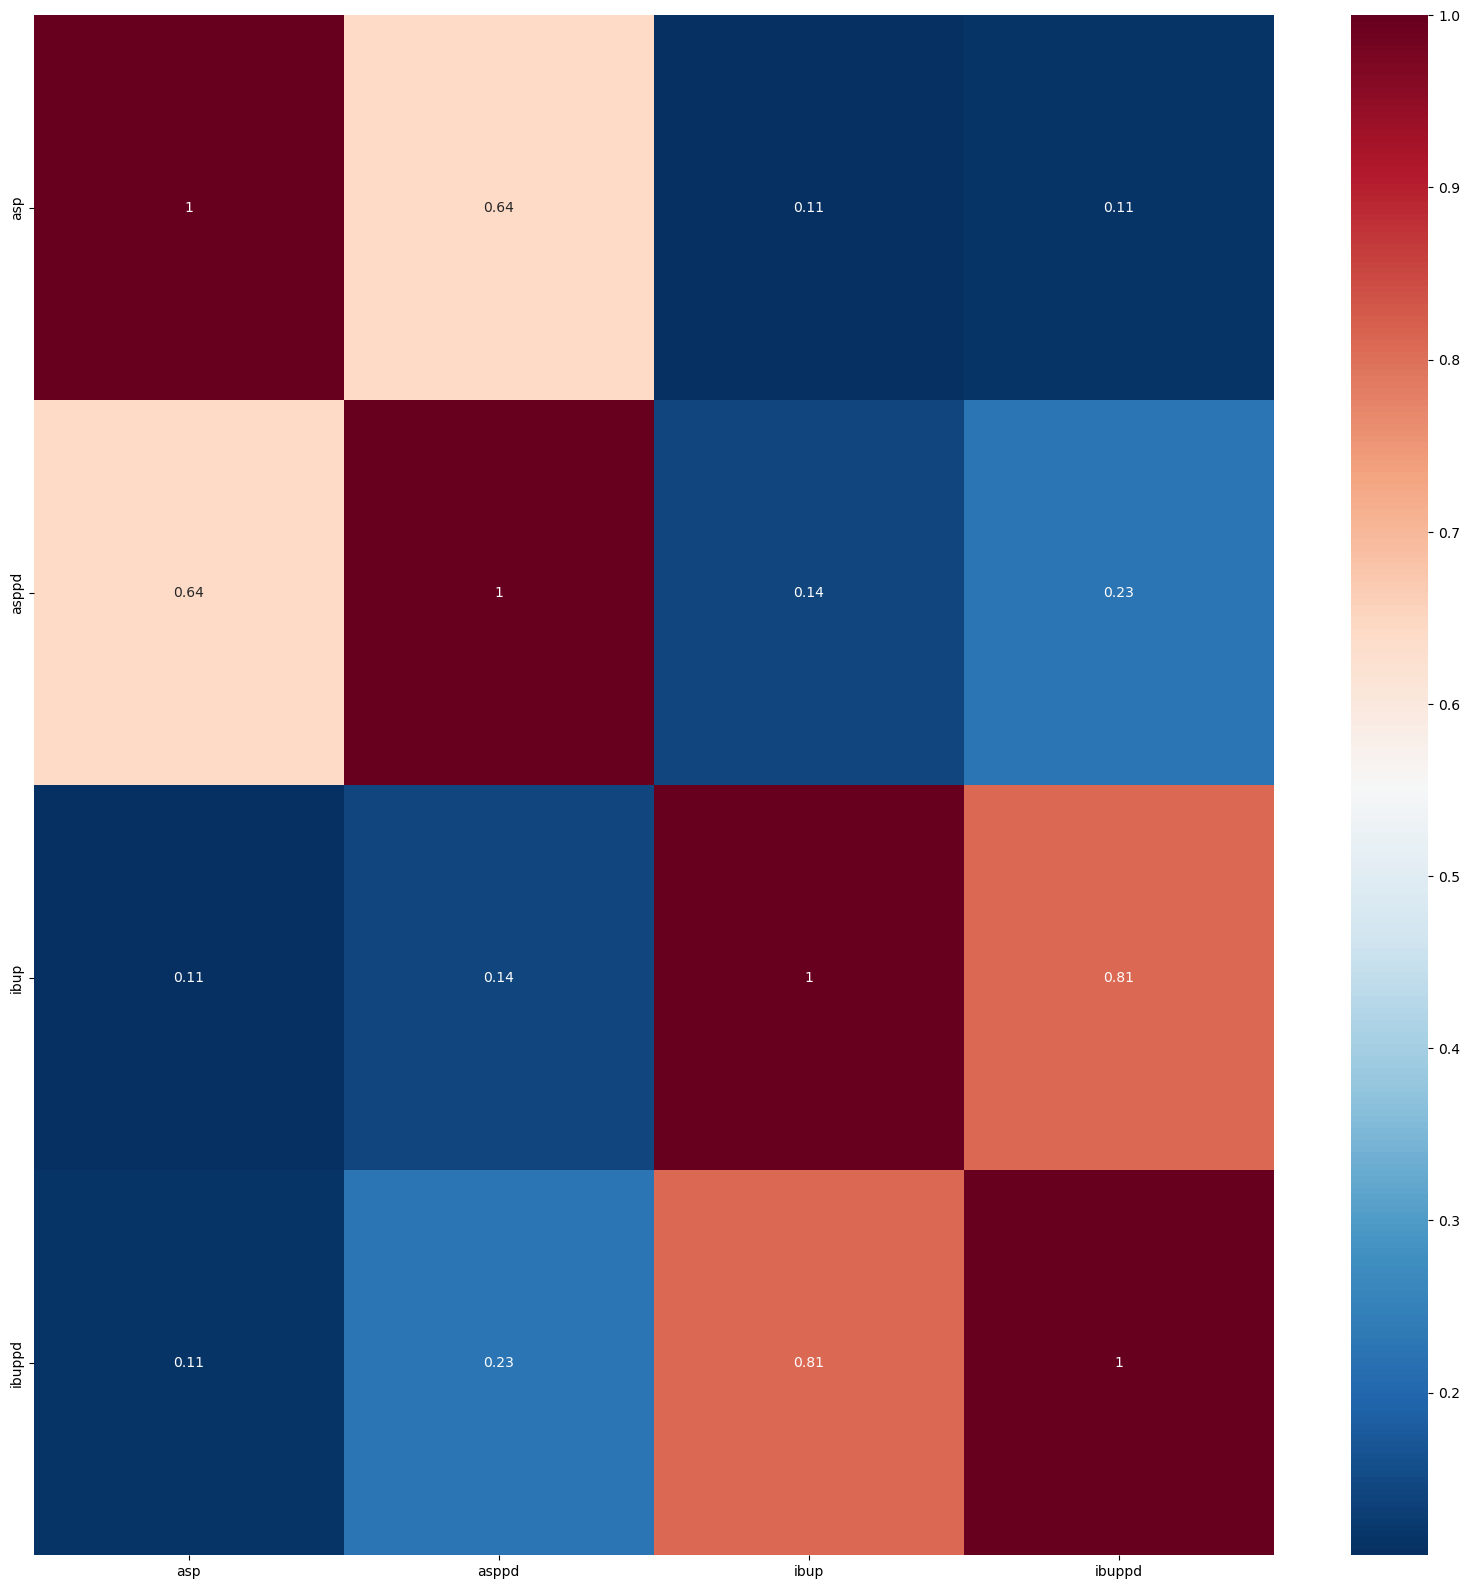

In [142]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section21].corr(), cmap='RdBu_r', annot = True)

## Section 22: BQ Diseases
---

In [144]:
section22_df = liver_cancer_df_with_bq[section22]
section22_df

arthrit_f  bronchit_f  colon_comorbidity  diabetes_f  divertic_f  \
0             0.0         0.0                0.0         1.0         0.0   
1             0.0         1.0                0.0         1.0         0.0   
2             1.0         0.0                0.0         0.0         1.0   
3             0.0         0.0                0.0         0.0         0.0   
4             1.0         0.0                0.0         0.0         0.0   
...           ...         ...                ...         ...         ...   
154882        0.0         0.0                0.0         0.0         0.0   
154883        1.0         0.0                0.0         0.0         0.0   
154884        1.0         0.0                0.0         0.0         0.0   
154885        1.0         0.0                0.0         0.0         0.0   
154886        0.0         0.0                0.0         0.0         0.0   

        emphys_f  gallblad_f  hearta_f  hyperten_f  liver_comorbidity  \
0            0.0         0.0       0.0         1.0                0.0   
1            0.0         1.0       0.0         1.0                0.0   
2            0.0         0.0       0.0         1.0                0.0   
3            0.0         0.0       0.0         0.0                0.0   
4            0.0         0.0       0.0         0.0                0.0   
...          ...         ...       ...         ...                ...   
154882       0.0         0.0       0.0         0.0                0.0   
154883       0.0         0.0       0.0         0.0                0.0   
154884       0.0         0.0       0.0         0.0                0.0   
154885       1.0         0.0       1.0         0.0                0.0   
154886       0.0         0.0       0.0         0.0                0.0   

        osteopor_f  polyps_f  stroke_f  
0              0.0       0.0       0.0  
1              0.0       0.0       0.0  
2              0.0       0.0       0.0  
3              0.0       0.0       0.0  
4              0.0       0.0       0.0  
...            ...       ...       ...  
154882         0.0       0.0       0.0  
154883         0.0       0.0       0.0  
154884         0.0       0.0       0.0  
154885         1.0       0.0       1.0  
154886         0.0       0.0       0.0  

[149369 rows x 13 columns]

In [145]:
section22_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149369 entries, 0 to 154886
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   arthrit_f          148362 non-null  float64
 1   bronchit_f         148360 non-null  float64
 2   colon_comorbidity  147815 non-null  float64
 3   diabetes_f         148442 non-null  float64
 4   divertic_f         148234 non-null  float64
 5   emphys_f           148435 non-null  float64
 6   gallblad_f         148288 non-null  float64
 7   hearta_f           148397 non-null  float64
 8   hyperten_f         148494 non-null  float64
 9   liver_comorbidity  148255 non-null  float64
 10  osteopor_f         148182 non-null  float64
 11  polyps_f           148270 non-null  float64
 12  stroke_f           148441 non-null  float64
dtypes: float64(13)
memory usage: 16.0 MB


In [146]:
daf.nulls_percentage(section22_df)

arthrit_f , 0.7% nulls , 2 unique values, float64
bronchit_f , 0.7% nulls , 2 unique values, float64
colon_comorbidity , 1.0% nulls , 2 unique values, float64
diabetes_f , 0.6% nulls , 2 unique values, float64
divertic_f , 0.8% nulls , 2 unique values, float64
emphys_f , 0.6% nulls , 2 unique values, float64
gallblad_f , 0.7% nulls , 2 unique values, float64
hearta_f , 0.7% nulls , 2 unique values, float64
hyperten_f , 0.6% nulls , 2 unique values, float64
liver_comorbidity , 0.7% nulls , 2 unique values, float64
osteopor_f , 0.8% nulls , 2 unique values, float64
polyps_f , 0.7% nulls , 2 unique values, float64
stroke_f , 0.6% nulls , 2 unique values, float64


array([[<Axes: title={'center': 'arthrit_f'}>,
        <Axes: title={'center': 'bronchit_f'}>,
        <Axes: title={'center': 'colon_comorbidity'}>,
        <Axes: title={'center': 'diabetes_f'}>],
       [<Axes: title={'center': 'divertic_f'}>,
        <Axes: title={'center': 'emphys_f'}>,
        <Axes: title={'center': 'gallblad_f'}>,
        <Axes: title={'center': 'hearta_f'}>],
       [<Axes: title={'center': 'hyperten_f'}>,
        <Axes: title={'center': 'liver_comorbidity'}>,
        <Axes: title={'center': 'osteopor_f'}>,
        <Axes: title={'center': 'polyps_f'}>],
       [<Axes: title={'center': 'stroke_f'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

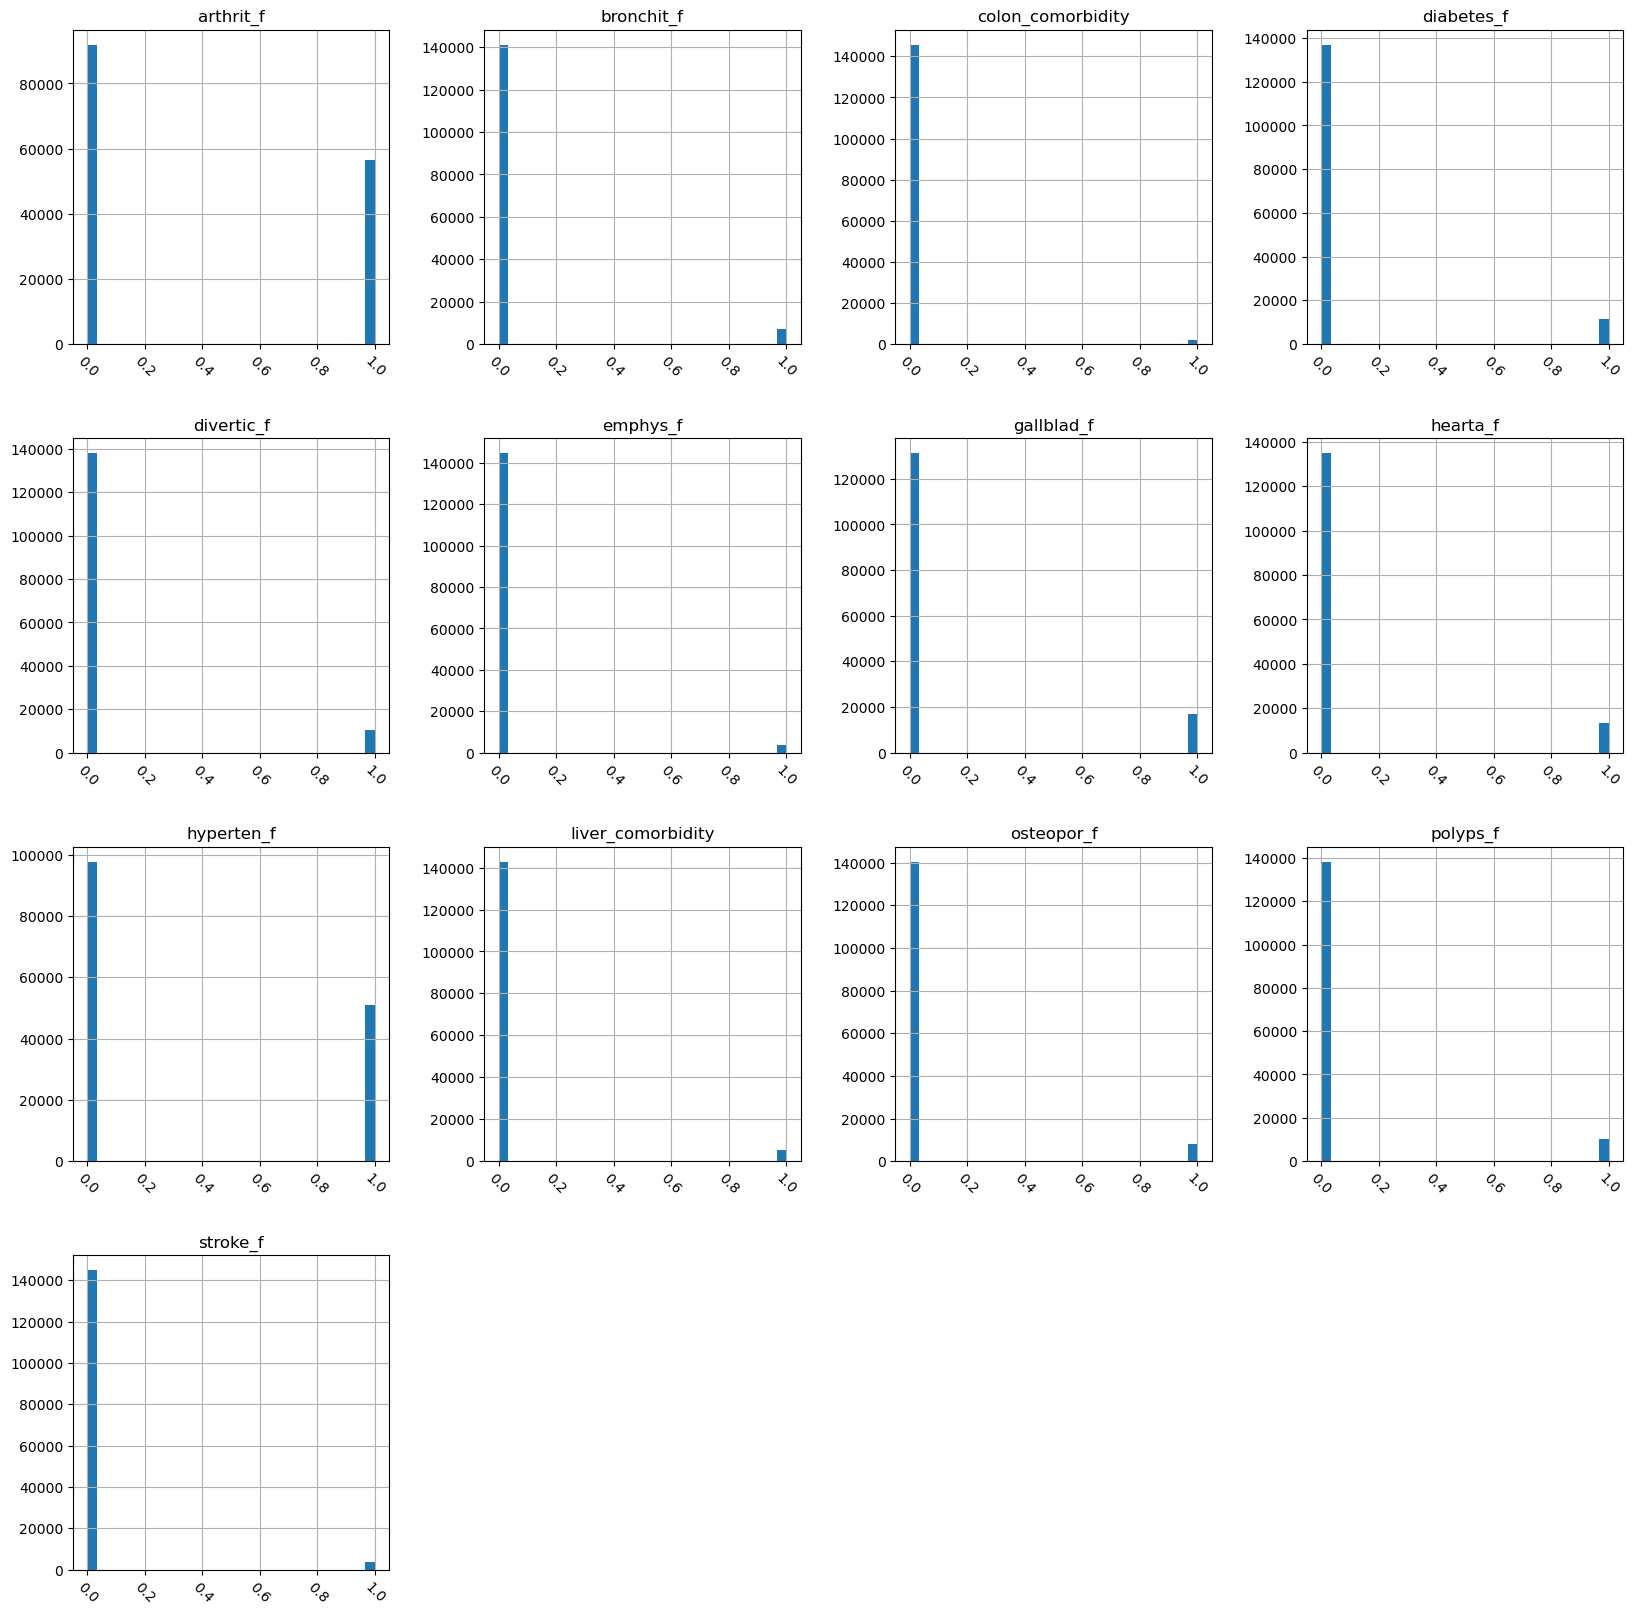

In [147]:
section22_df.hist(figsize=(20,20), bins = 30, xrot=-45)

<Axes: >

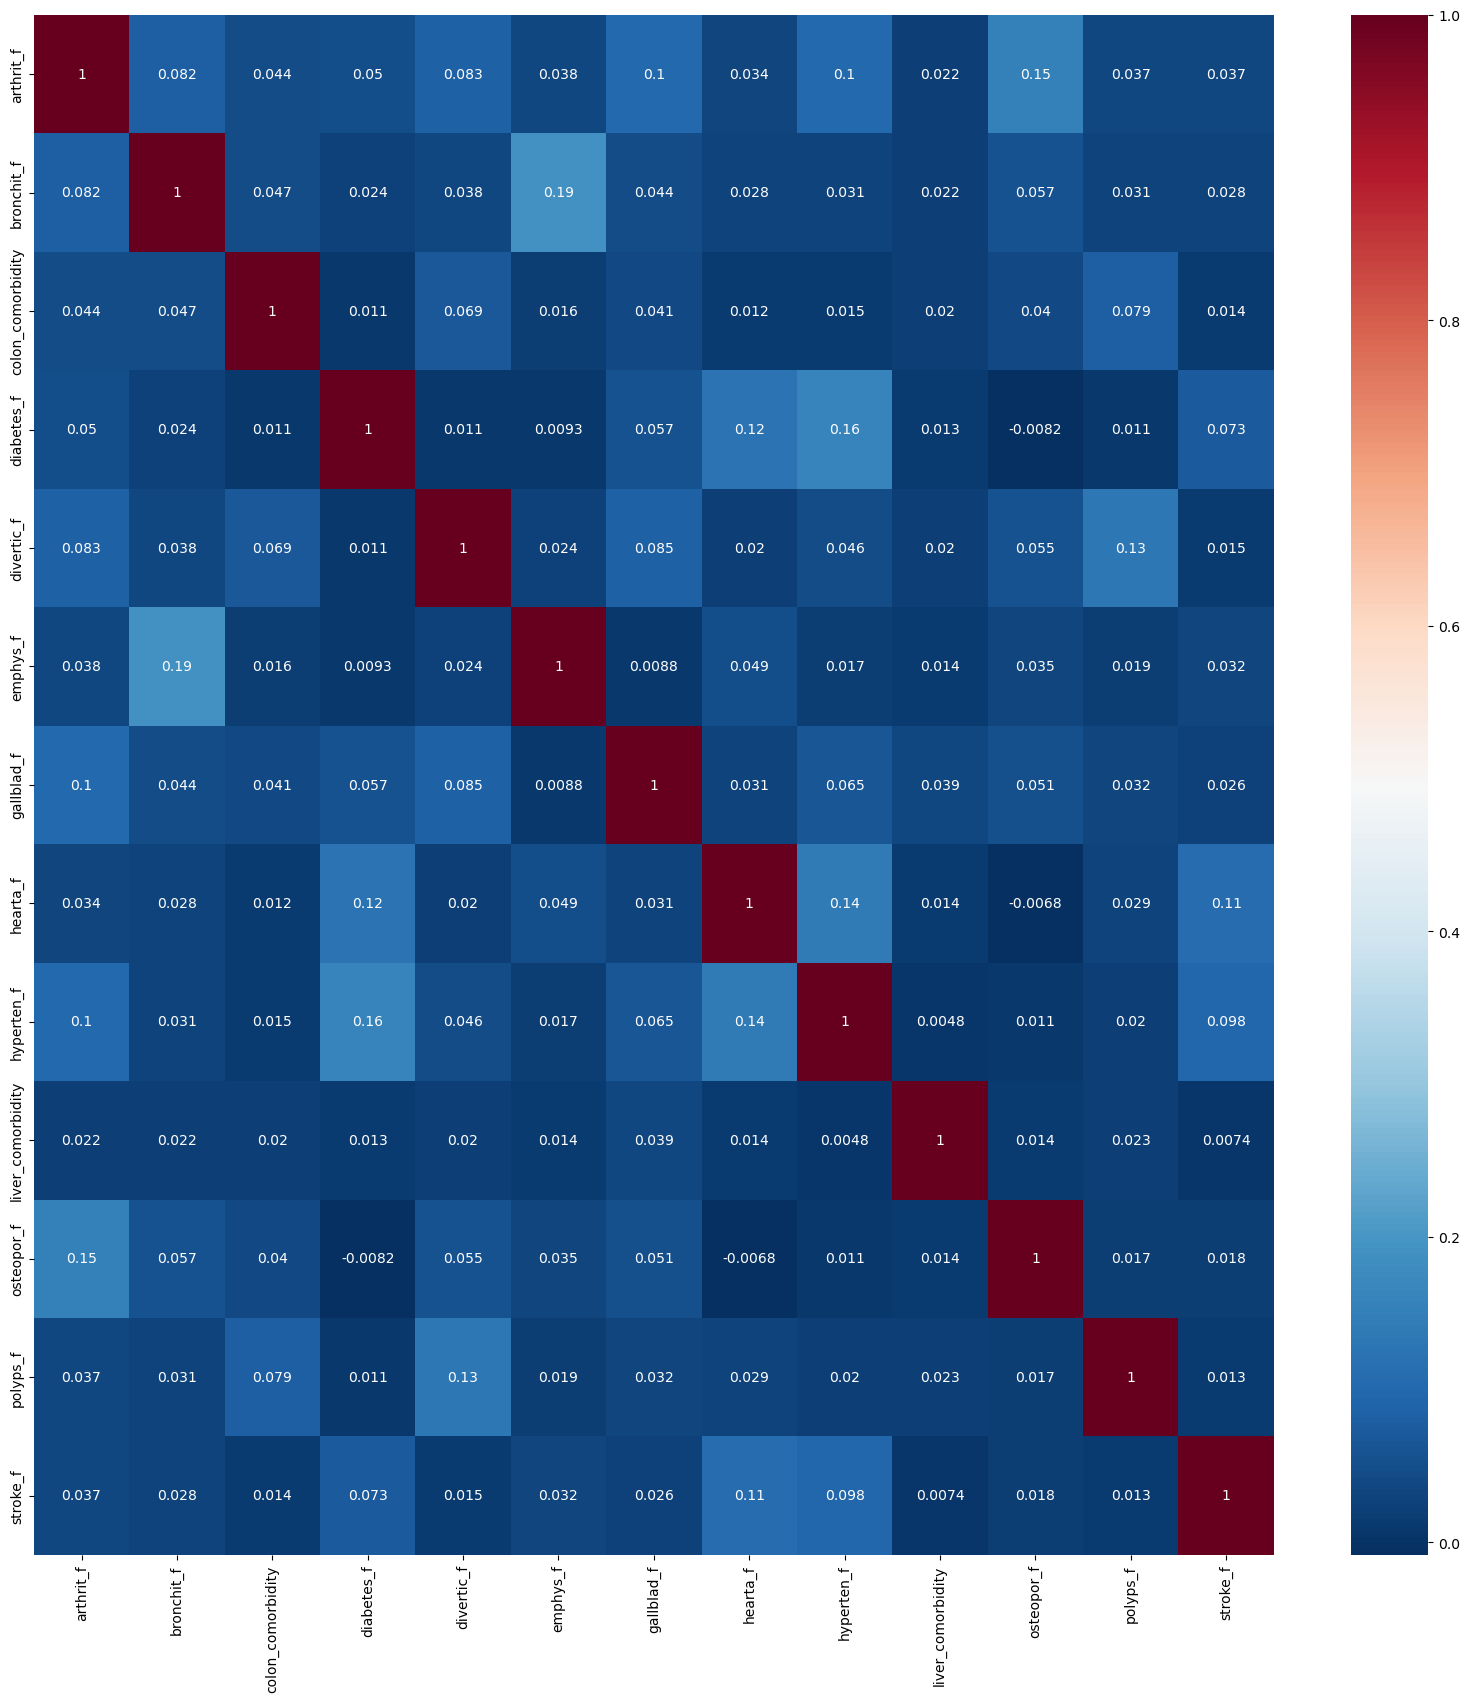

In [148]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section22].corr(), cmap='RdBu_r', annot = True)

## Section 23: BQ Female Specific
---

In [150]:
section23_df = liver_cancer_df_with_bq[section23]
section23_df

hyster_f  hystera  ovariesr_f  tuballig  bcontr_f  bcontra  bcontrt  \
0            NaN      NaN         NaN       NaN       NaN      NaN      NaN   
1            NaN      NaN         NaN       NaN       NaN      NaN      NaN   
2            NaN      NaN         NaN       NaN       NaN      NaN      NaN   
3            1.0      3.0         0.0       0.0       0.0      NaN      0.0   
4            0.0      NaN         0.0       1.0       1.0      1.0      2.0   
...          ...      ...         ...       ...       ...      ...      ...   
154882       NaN      NaN         NaN       NaN       NaN      NaN      NaN   
154883       NaN      NaN         NaN       NaN       NaN      NaN      NaN   
154884       NaN      NaN         NaN       NaN       NaN      NaN      NaN   
154885       1.0      2.0         0.0       1.0       1.0      2.0      3.0   
154886       0.0      NaN         0.0       0.0       0.0      NaN      0.0   

        curhorm  horm_f  horm_stat  thorm  fchilda  livec  miscar  preg_f  \
0           NaN     NaN        NaN    NaN      NaN    NaN     NaN     NaN   
1           NaN     NaN        NaN    NaN      NaN    NaN     NaN     NaN   
2           NaN     NaN        NaN    NaN      NaN    NaN     NaN     NaN   
3           1.0     1.0        1.0    1.0      3.0    4.0     2.0     1.0   
4           1.0     1.0        1.0    2.0      3.0    3.0     1.0     1.0   
...         ...     ...        ...    ...      ...    ...     ...     ...   
154882      NaN     NaN        NaN    NaN      NaN    NaN     NaN     NaN   
154883      NaN     NaN        NaN    NaN      NaN    NaN     NaN     NaN   
154884      NaN     NaN        NaN    NaN      NaN    NaN     NaN     NaN   
154885      1.0     1.0        1.0    1.0      3.0    4.0     0.0     1.0   
154886      0.0     0.0        0.0    0.0      3.0    5.0     1.0     1.0   

        prega  pregc  stillb  trypreg  tubal  fmenstr  lmenstr  menstrs  \
0         NaN    NaN     NaN      NaN    NaN      NaN      NaN      NaN   
1         NaN    NaN     NaN      NaN    NaN      NaN      NaN      NaN   
2         NaN    NaN     NaN      NaN    NaN      NaN      NaN      NaN   
3         3.0    4.0     0.0      0.0    0.0      3.0      3.0      2.0   
4         3.0    3.0     0.0      0.0    0.0      3.0      4.0      1.0   
...       ...    ...     ...      ...    ...      ...      ...      ...   
154882    NaN    NaN     NaN      NaN    NaN      NaN      NaN      NaN   
154883    NaN    NaN     NaN      NaN    NaN      NaN      NaN      NaN   
154884    NaN    NaN     NaN      NaN    NaN      NaN      NaN      NaN   
154885    3.0    3.0     0.0      0.0    0.0      5.0      2.0      2.0   
154886    3.0    5.0     0.0      0.0    0.0      3.0      3.0      1.0   

        menstrs_stat_type  post_menopausal  bbd  benign_ovcyst  endometriosis  \
0                     NaN              NaN  NaN            NaN            NaN   
1                     NaN              NaN  NaN            NaN            NaN   
2                     NaN              NaN  NaN            NaN            NaN   
3                     3.0              1.0  0.0            0.0            0.0   
4                     1.0              1.0  0.0            0.0            0.0   
...                   ...              ...  ...            ...            ...   
154882                NaN              NaN  NaN            NaN            NaN   
154883                NaN              NaN  NaN            NaN            NaN   
154884                NaN              NaN  NaN            NaN            NaN   
154885                3.0              1.0  0.0            NaN            0.0   
154886                1.0              1.0  0.0            0.0            0.0   

        uterine_fib  
0               NaN  
1               NaN  
2               NaN  
3               1.0  
4               0.0  
...             ...  
154882          NaN  
154883          NaN  
154884          NaN  
154885          1.0  
154886          1.

In [151]:
section23_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149369 entries, 0 to 154886
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hyster_f           75695 non-null  float64
 1   hystera            27371 non-null  float64
 2   ovariesr_f         75788 non-null  float64
 3   tuballig           75500 non-null  float64
 4   bcontr_f           75677 non-null  float64
 5   bcontra            40929 non-null  float64
 6   bcontrt            75581 non-null  float64
 7   curhorm            75354 non-null  float64
 8   horm_f             75681 non-null  float64
 9   horm_stat          75681 non-null  float64
 10  thorm              75165 non-null  float64
 11  fchilda            68408 non-null  float64
 12  livec              75687 non-null  float64
 13  miscar             75541 non-null  float64
 14  preg_f             75790 non-null  float64
 15  prega              69891 non-null  float64
 16  pregc              75634 

In [152]:
daf.nulls_percentage(section23_df)

hyster_f , 49.3% nulls , 3 unique values, float64
hystera , 81.7% nulls , 5 unique values, float64
ovariesr_f , 49.3% nulls , 7 unique values, float64
tuballig , 49.5% nulls , 3 unique values, float64
bcontr_f , 49.3% nulls , 2 unique values, float64
bcontra , 72.6% nulls , 4 unique values, float64
bcontrt , 49.4% nulls , 6 unique values, float64
curhorm , 49.6% nulls , 2 unique values, float64
horm_f , 49.3% nulls , 3 unique values, float64
horm_stat , 49.3% nulls , 5 unique values, float64
thorm , 49.7% nulls , 6 unique values, float64
fchilda , 54.2% nulls , 7 unique values, float64
livec , 49.3% nulls , 6 unique values, float64
miscar , 49.4% nulls , 3 unique values, float64
preg_f , 49.3% nulls , 3 unique values, float64
prega , 53.2% nulls , 7 unique values, float64
pregc , 49.4% nulls , 6 unique values, float64
stillb , 49.6% nulls , 3 unique values, float64
trypreg , 49.5% nulls , 2 unique values, float64
tubal , 49.5% nulls , 3 unique values, float64
fmenstr , 49.4% nulls , 5 

---

Here we can see how many nulls or missing values we have in this section. One of the problems is, since is a section with characteristics only presented in women, every single male has an NaN by default. I am going to proceed to assing to every male, 0 as default value.

---

In [156]:
daf.set_gender_characteristics_value(liver_cancer_df_with_bq, section23, 1)
section23_df_with_default_values_for_the_other_gender = liver_cancer_df_with_bq[section23]

In [157]:
daf.nulls_percentage(section23_df_with_default_values_for_the_other_gender)

hyster_f , 0.1% nulls , 3 unique values, float64
hystera , 32.4% nulls , 6 unique values, float64
ovariesr_f , 0.0% nulls , 7 unique values, float64
tuballig , 0.2% nulls , 3 unique values, float64
bcontr_f , 0.1% nulls , 2 unique values, float64
bcontra , 23.4% nulls , 5 unique values, float64
bcontrt , 0.2% nulls , 6 unique values, float64
curhorm , 0.3% nulls , 2 unique values, float64
horm_f , 0.1% nulls , 3 unique values, float64
horm_stat , 0.1% nulls , 5 unique values, float64
thorm , 0.4% nulls , 6 unique values, float64
fchilda , 5.0% nulls , 8 unique values, float64
livec , 0.1% nulls , 6 unique values, float64
miscar , 0.2% nulls , 3 unique values, float64
preg_f , 0.0% nulls , 3 unique values, float64
prega , 4.0% nulls , 8 unique values, float64
pregc , 0.1% nulls , 6 unique values, float64
stillb , 0.4% nulls , 3 unique values, float64
trypreg , 0.2% nulls , 2 unique values, float64
tubal , 0.2% nulls , 3 unique values, float64
fmenstr , 0.1% nulls , 6 unique values, floa

We can observe how our percentage of nulls and missings decreased

array([[<Axes: title={'center': 'hyster_f'}>,
        <Axes: title={'center': 'hystera'}>,
        <Axes: title={'center': 'ovariesr_f'}>,
        <Axes: title={'center': 'tuballig'}>,
        <Axes: title={'center': 'bcontr_f'}>],
       [<Axes: title={'center': 'bcontra'}>,
        <Axes: title={'center': 'bcontrt'}>,
        <Axes: title={'center': 'curhorm'}>,
        <Axes: title={'center': 'horm_f'}>,
        <Axes: title={'center': 'horm_stat'}>],
       [<Axes: title={'center': 'thorm'}>,
        <Axes: title={'center': 'fchilda'}>,
        <Axes: title={'center': 'livec'}>,
        <Axes: title={'center': 'miscar'}>,
        <Axes: title={'center': 'preg_f'}>],
       [<Axes: title={'center': 'prega'}>,
        <Axes: title={'center': 'pregc'}>,
        <Axes: title={'center': 'stillb'}>,
        <Axes: title={'center': 'trypreg'}>,
        <Axes: title={'center': 'tubal'}>],
       [<Axes: title={'center': 'fmenstr'}>,
        <Axes: title={'center': 'lmenstr'}>,
        <Axe

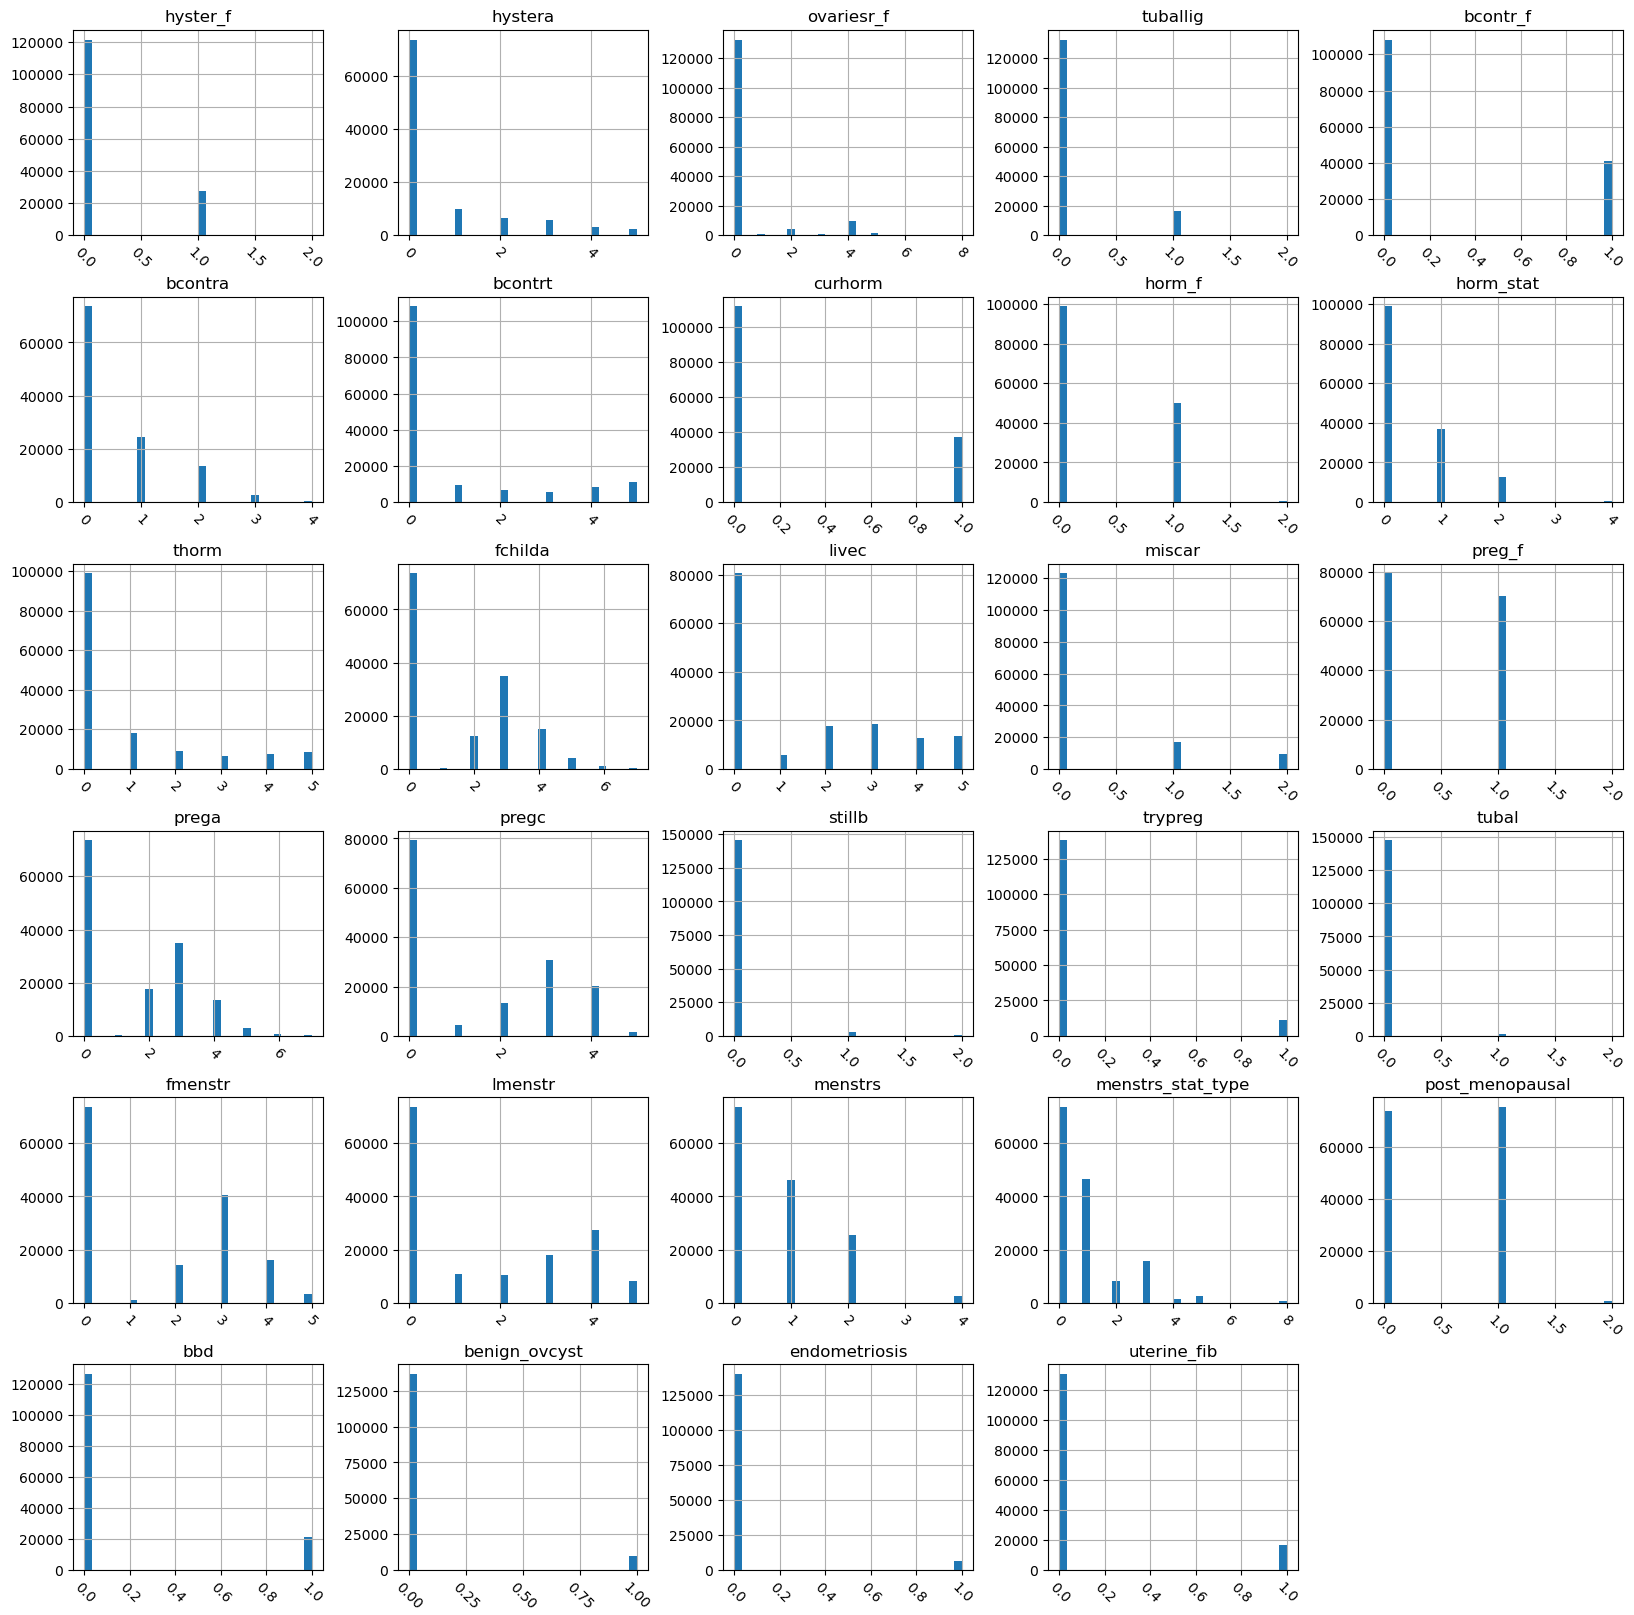

In [159]:
section23_df_with_default_values_for_the_other_gender.hist(figsize=(20,20), bins = 30, xrot=-45)

<Axes: >

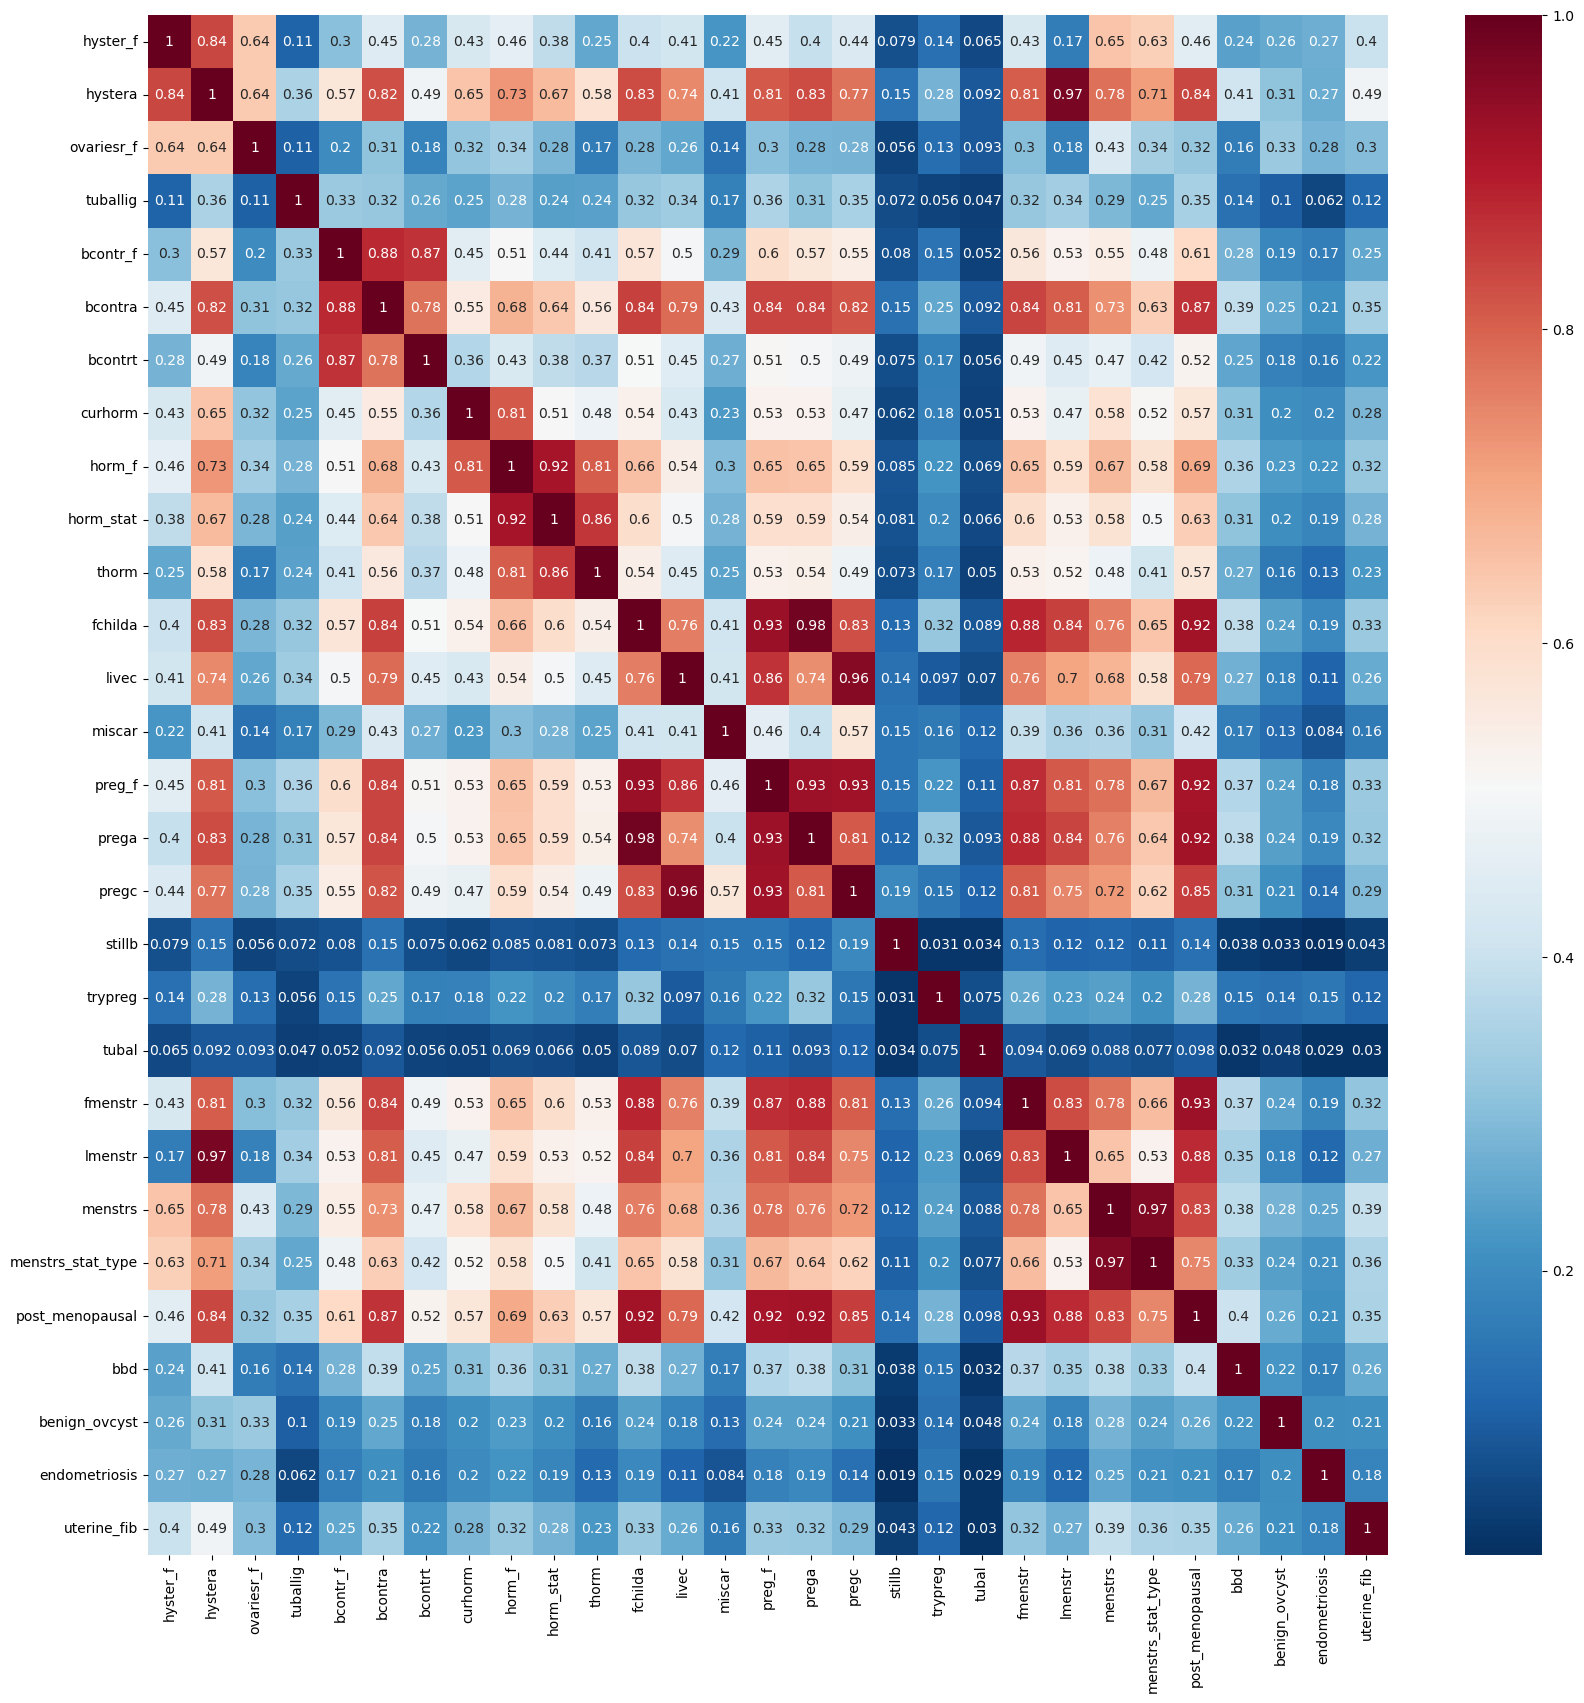

In [160]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section23].corr(), cmap='RdBu_r', annot = True)

## Section 24: BQ Male Specific
---

In [162]:
section24_df = liver_cancer_df_with_bq[section24]
section24_df

enlpros_f  enlprosa  infpros_f  infprosa  prosprob_f  urinate_f  \
0             0.0       NaN        0.0       NaN         0.0        1.0   
1             0.0       NaN        0.0       NaN         0.0        2.0   
2             0.0       NaN        0.0       NaN         0.0        2.0   
3             NaN       NaN        NaN       NaN         NaN        NaN   
4             NaN       NaN        NaN       NaN         NaN        NaN   
...           ...       ...        ...       ...         ...        ...   
154882        0.0       NaN        0.0       NaN         0.0        1.0   
154883        1.0       4.0        0.0       NaN         1.0        2.0   
154884        1.0       5.0        0.0       NaN         1.0        3.0   
154885        NaN       NaN        NaN       NaN         NaN        NaN   
154886        NaN       NaN        NaN       NaN         NaN        NaN   

        urinatea  
0            NaN  
1            4.0  
2            4.0  
3            NaN  
4            NaN  
...          ...  
154882       NaN  
154883       4.0  
154884       4.0  
154885       NaN  
154886       NaN  

[149369 rows x 7 columns]

In [163]:
section24_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149369 entries, 0 to 154886
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   enlpros_f   73434 non-null  float64
 1   enlprosa    15941 non-null  float64
 2   infpros_f   61368 non-null  float64
 3   infprosa    5161 non-null   float64
 4   prosprob_f  73405 non-null  float64
 5   urinate_f   73433 non-null  float64
 6   urinatea    25568 non-null  float64
dtypes: float64(7)
memory usage: 9.1 MB


In [164]:
daf.nulls_percentage(section24_df)

enlpros_f , 50.8% nulls , 2 unique values, float64
enlprosa , 89.3% nulls , 6 unique values, float64
infpros_f , 58.9% nulls , 2 unique values, float64
infprosa , 96.5% nulls , 6 unique values, float64
prosprob_f , 50.9% nulls , 2 unique values, float64
urinate_f , 50.8% nulls , 6 unique values, float64
urinatea , 82.9% nulls , 6 unique values, float64


---

Here we can see how many nulls or missing values we have in this section. One of the problems is, since is a section with characteristics only presented in men, every single woman has an NaN by default. I am going to proceed to assing to every female, 0 as default value.

---

In [168]:
daf.set_gender_characteristics_value(liver_cancer_df_with_bq, section24, 2)
section24_df_with_default_values_for_the_other_gender = liver_cancer_df_with_bq[section24]

In [169]:
daf.nulls_percentage(section24_df_with_default_values_for_the_other_gender)

enlpros_f , 0.1% nulls , 2 unique values, float64
enlprosa , 38.6% nulls , 7 unique values, float64
infpros_f , 8.2% nulls , 2 unique values, float64
infprosa , 45.8% nulls , 7 unique values, float64
prosprob_f , 0.1% nulls , 2 unique values, float64
urinate_f , 0.1% nulls , 6 unique values, float64
urinatea , 32.1% nulls , 7 unique values, float64


array([[<Axes: title={'center': 'enlpros_f'}>,
        <Axes: title={'center': 'enlprosa'}>,
        <Axes: title={'center': 'infpros_f'}>],
       [<Axes: title={'center': 'infprosa'}>,
        <Axes: title={'center': 'prosprob_f'}>,
        <Axes: title={'center': 'urinate_f'}>],
       [<Axes: title={'center': 'urinatea'}>, <Axes: >, <Axes: >]],
      dtype=object)

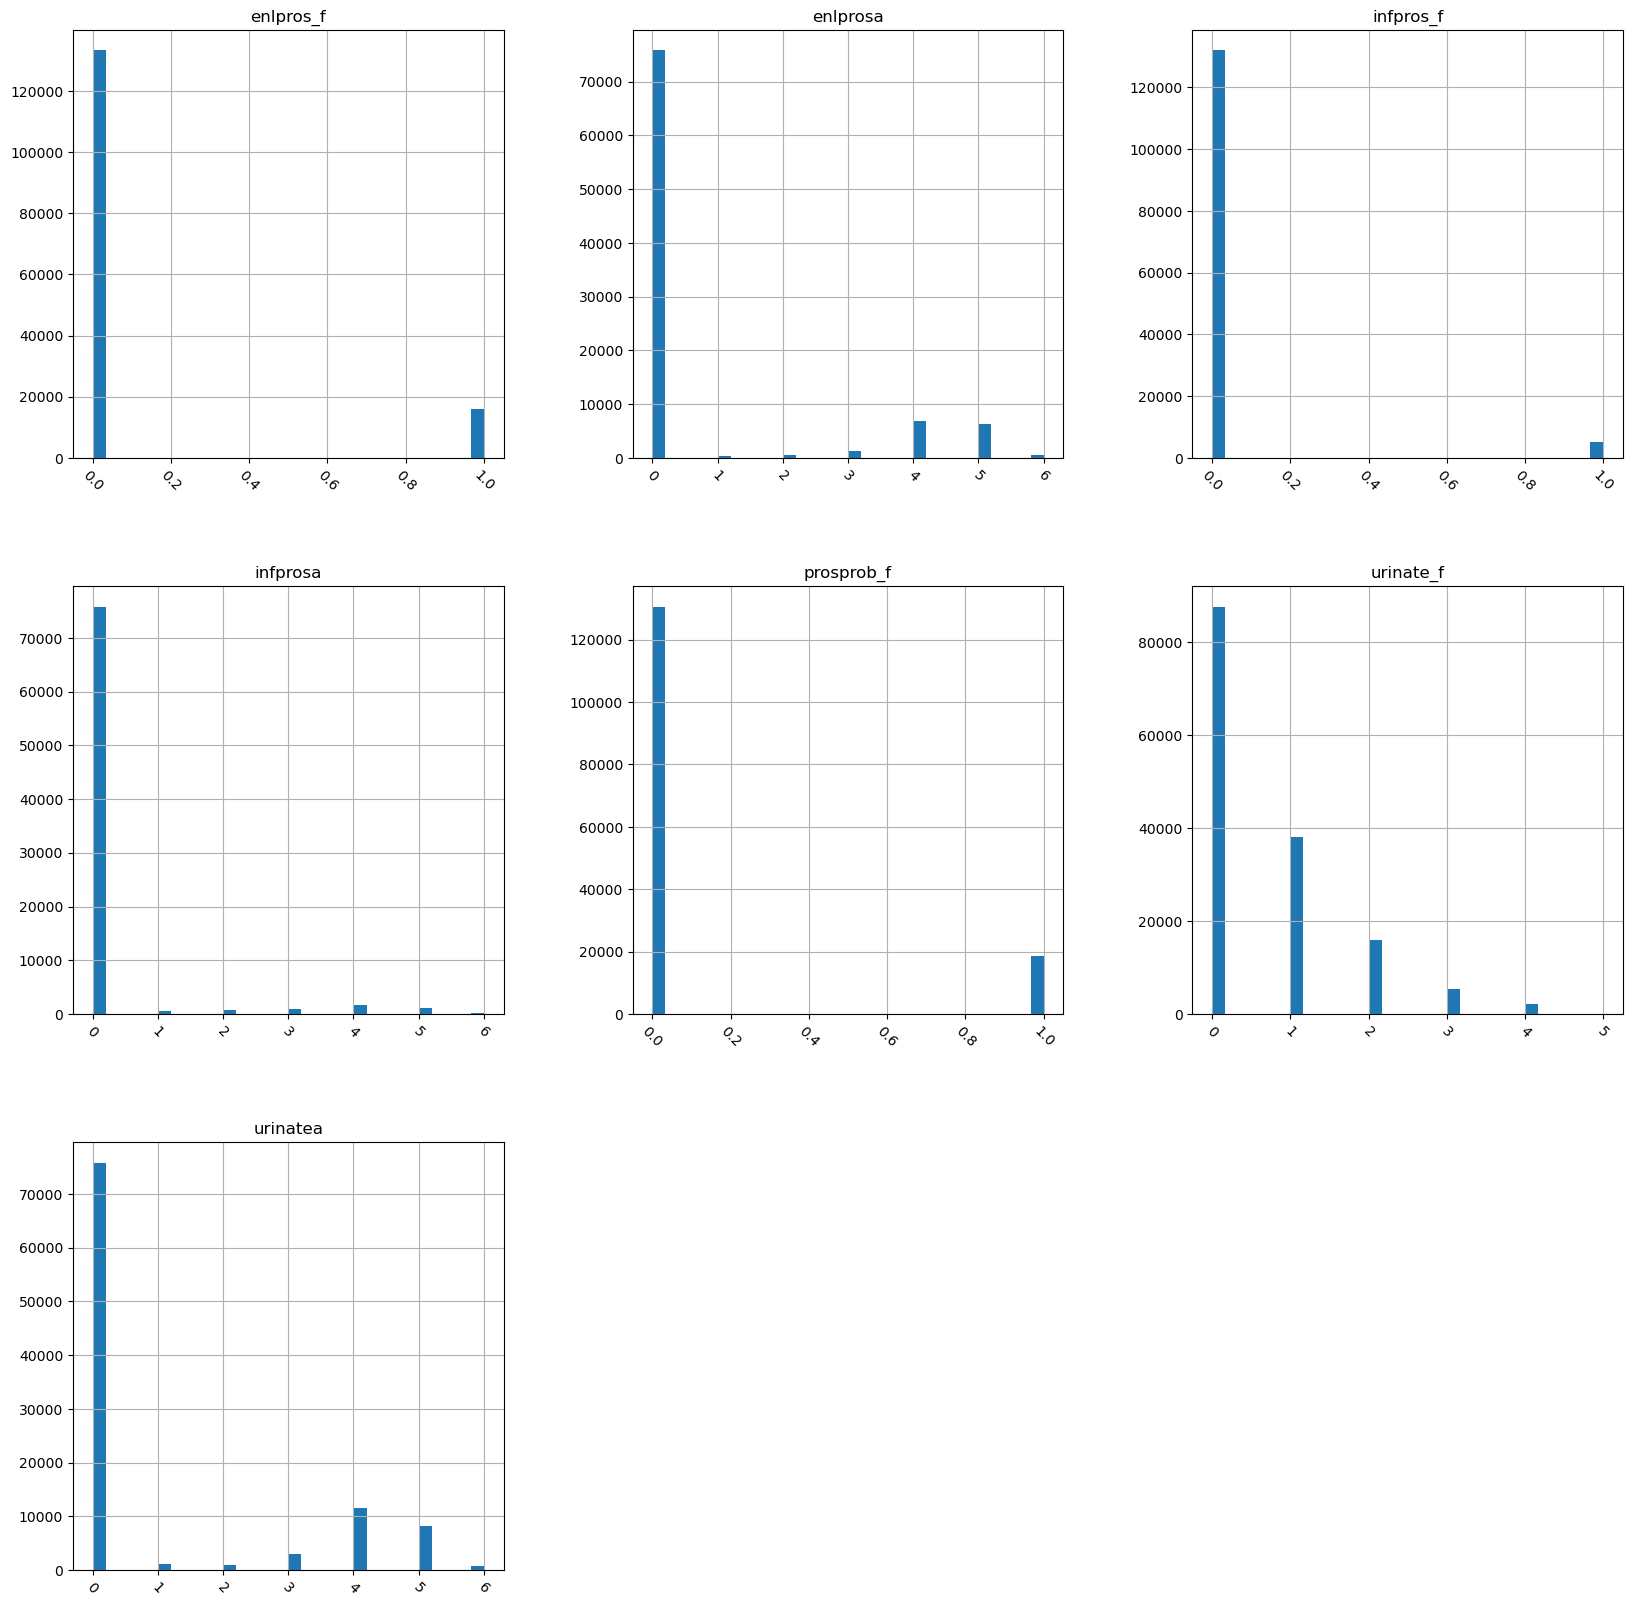

In [170]:
section24_df_with_default_values_for_the_other_gender.hist(figsize=(20,20), bins = 30, xrot=-45)

<Axes: >

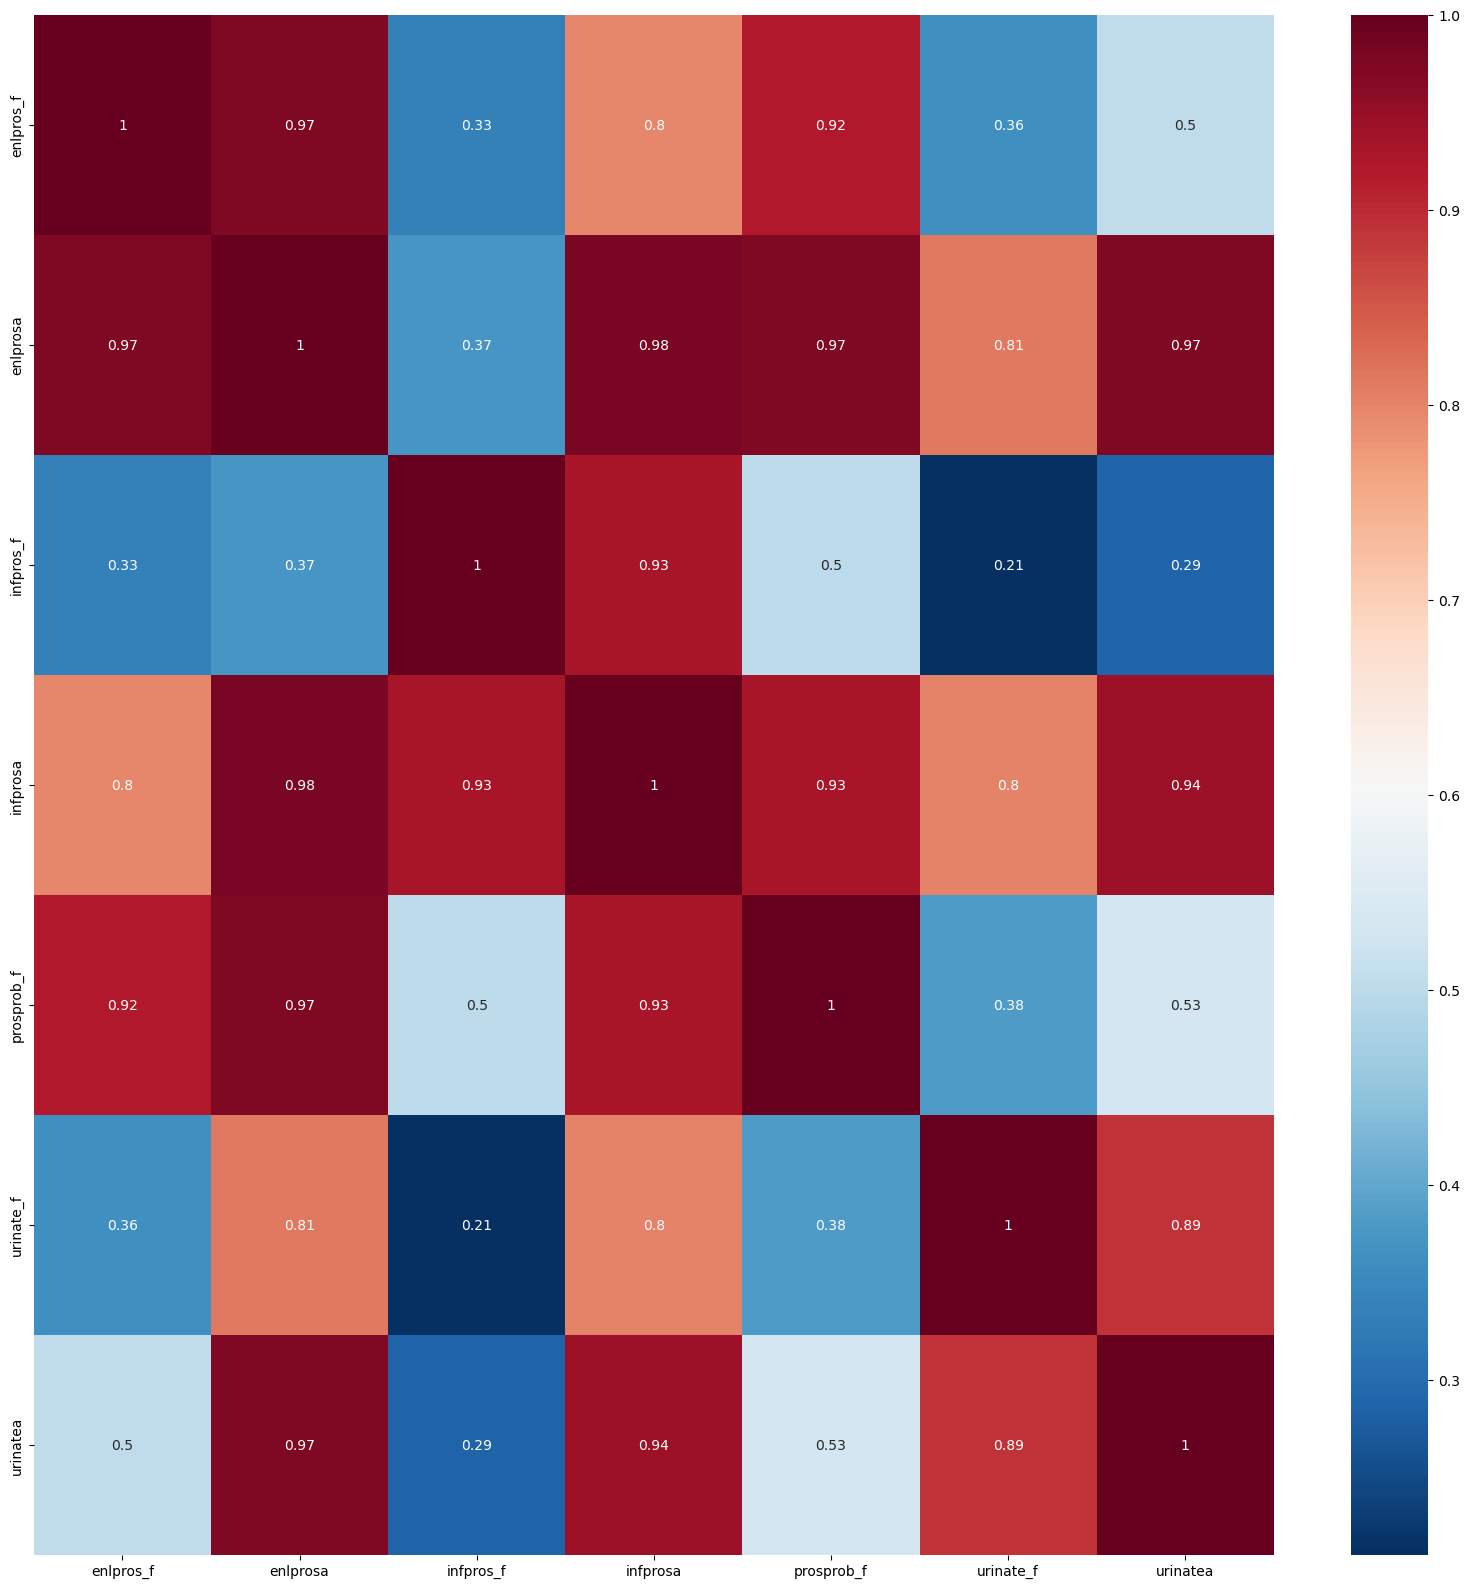

In [171]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section24].corr(), cmap='RdBu_r', annot = True)

## Section 25: BQ Prostate Surgery
---

In [173]:
section25_df = liver_cancer_df_with_bq[section25]
section25_df

surg_age  surg_any  surg_biopsy  surg_prostatectomy  surg_resection  \
0            NaN       0.0          0.0                 0.0             0.0   
1            NaN       0.0          0.0                 0.0             0.0   
2            NaN       0.0          0.0                 0.0             0.0   
3            NaN       NaN          NaN                 NaN             NaN   
4            NaN       NaN          NaN                 NaN             NaN   
...          ...       ...          ...                 ...             ...   
154882       NaN       0.0          0.0                 0.0             0.0   
154883       3.0       1.0          0.0                 0.0             1.0   
154884       NaN       0.0          0.0                 0.0             0.0   
154885       NaN       NaN          NaN                 NaN             NaN   
154886       NaN       NaN          NaN                 NaN             NaN   

        vasect_f  vasecta  
0            0.0      NaN  
1            0.0      NaN  
2            1.0      2.0  
3            NaN      NaN  
4            NaN      NaN  
...          ...      ...  
154882       0.0      NaN  
154883       0.0      NaN  
154884       0.0      NaN  
154885       NaN      NaN  
154886       NaN      NaN  

[149369 rows x 7 columns]

In [174]:
section25_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149369 entries, 0 to 154886
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surg_age            5693 non-null   float64
 1   surg_any            73525 non-null  float64
 2   surg_biopsy         71442 non-null  float64
 3   surg_prostatectomy  71210 non-null  float64
 4   surg_resection      71252 non-null  float64
 5   vasect_f            73310 non-null  float64
 6   vasecta             19895 non-null  float64
dtypes: float64(7)
memory usage: 9.1 MB


In [175]:
daf.nulls_percentage(section25_df)

surg_age , 96.2% nulls , 5 unique values, float64
surg_any , 50.8% nulls , 3 unique values, float64
surg_biopsy , 52.2% nulls , 2 unique values, float64
surg_prostatectomy , 52.3% nulls , 2 unique values, float64
surg_resection , 52.3% nulls , 2 unique values, float64
vasect_f , 50.9% nulls , 2 unique values, float64
vasecta , 86.7% nulls , 4 unique values, float64


---

Here we can see how many nulls or missing values we have in this section. One of the problems is, since is a section with characteristics only presented in men, every single woman has an NaN by default. I am going to proceed to assing to every female, 0 as default value.

---

In [179]:
daf.set_gender_characteristics_value(liver_cancer_df_with_bq, section25, 2)
section25_df_with_default_values_for_the_other_gender = liver_cancer_df_with_bq[section25]

In [180]:
daf.nulls_percentage(section25_df_with_default_values_for_the_other_gender)

surg_age , 45.4% nulls , 6 unique values, float64
surg_any , 0.0% nulls , 3 unique values, float64
surg_biopsy , 1.4% nulls , 2 unique values, float64
surg_prostatectomy , 1.6% nulls , 2 unique values, float64
surg_resection , 1.5% nulls , 2 unique values, float64
vasect_f , 0.2% nulls , 2 unique values, float64
vasecta , 35.9% nulls , 5 unique values, float64


array([[<Axes: title={'center': 'surg_age'}>,
        <Axes: title={'center': 'surg_any'}>,
        <Axes: title={'center': 'surg_biopsy'}>],
       [<Axes: title={'center': 'surg_prostatectomy'}>,
        <Axes: title={'center': 'surg_resection'}>,
        <Axes: title={'center': 'vasect_f'}>],
       [<Axes: title={'center': 'vasecta'}>, <Axes: >, <Axes: >]],
      dtype=object)

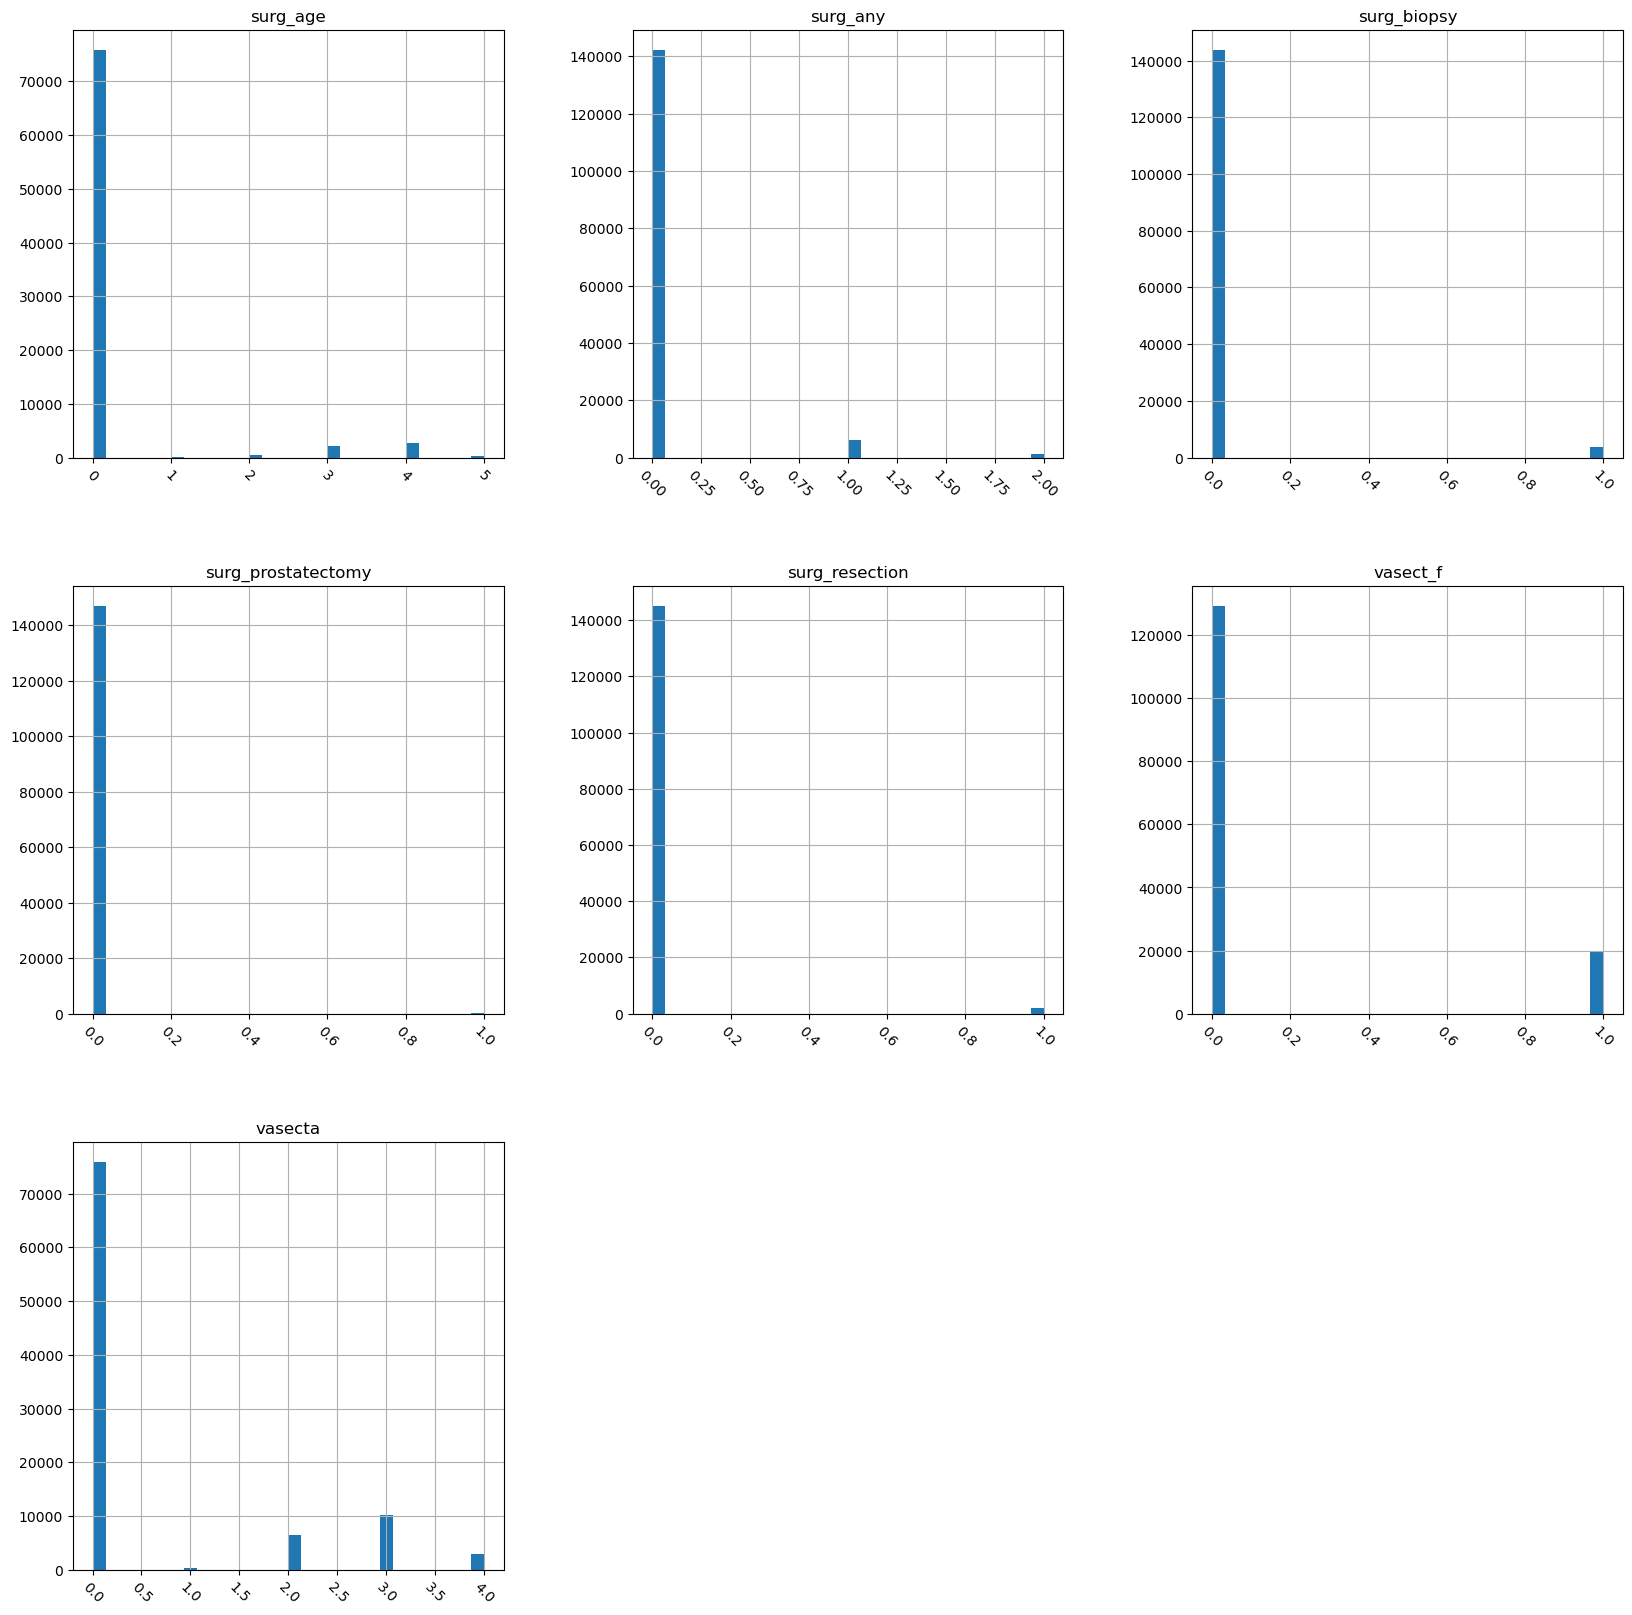

In [181]:
section25_df_with_default_values_for_the_other_gender.hist(figsize=(20,20), bins = 30, xrot=-45)

<Axes: >

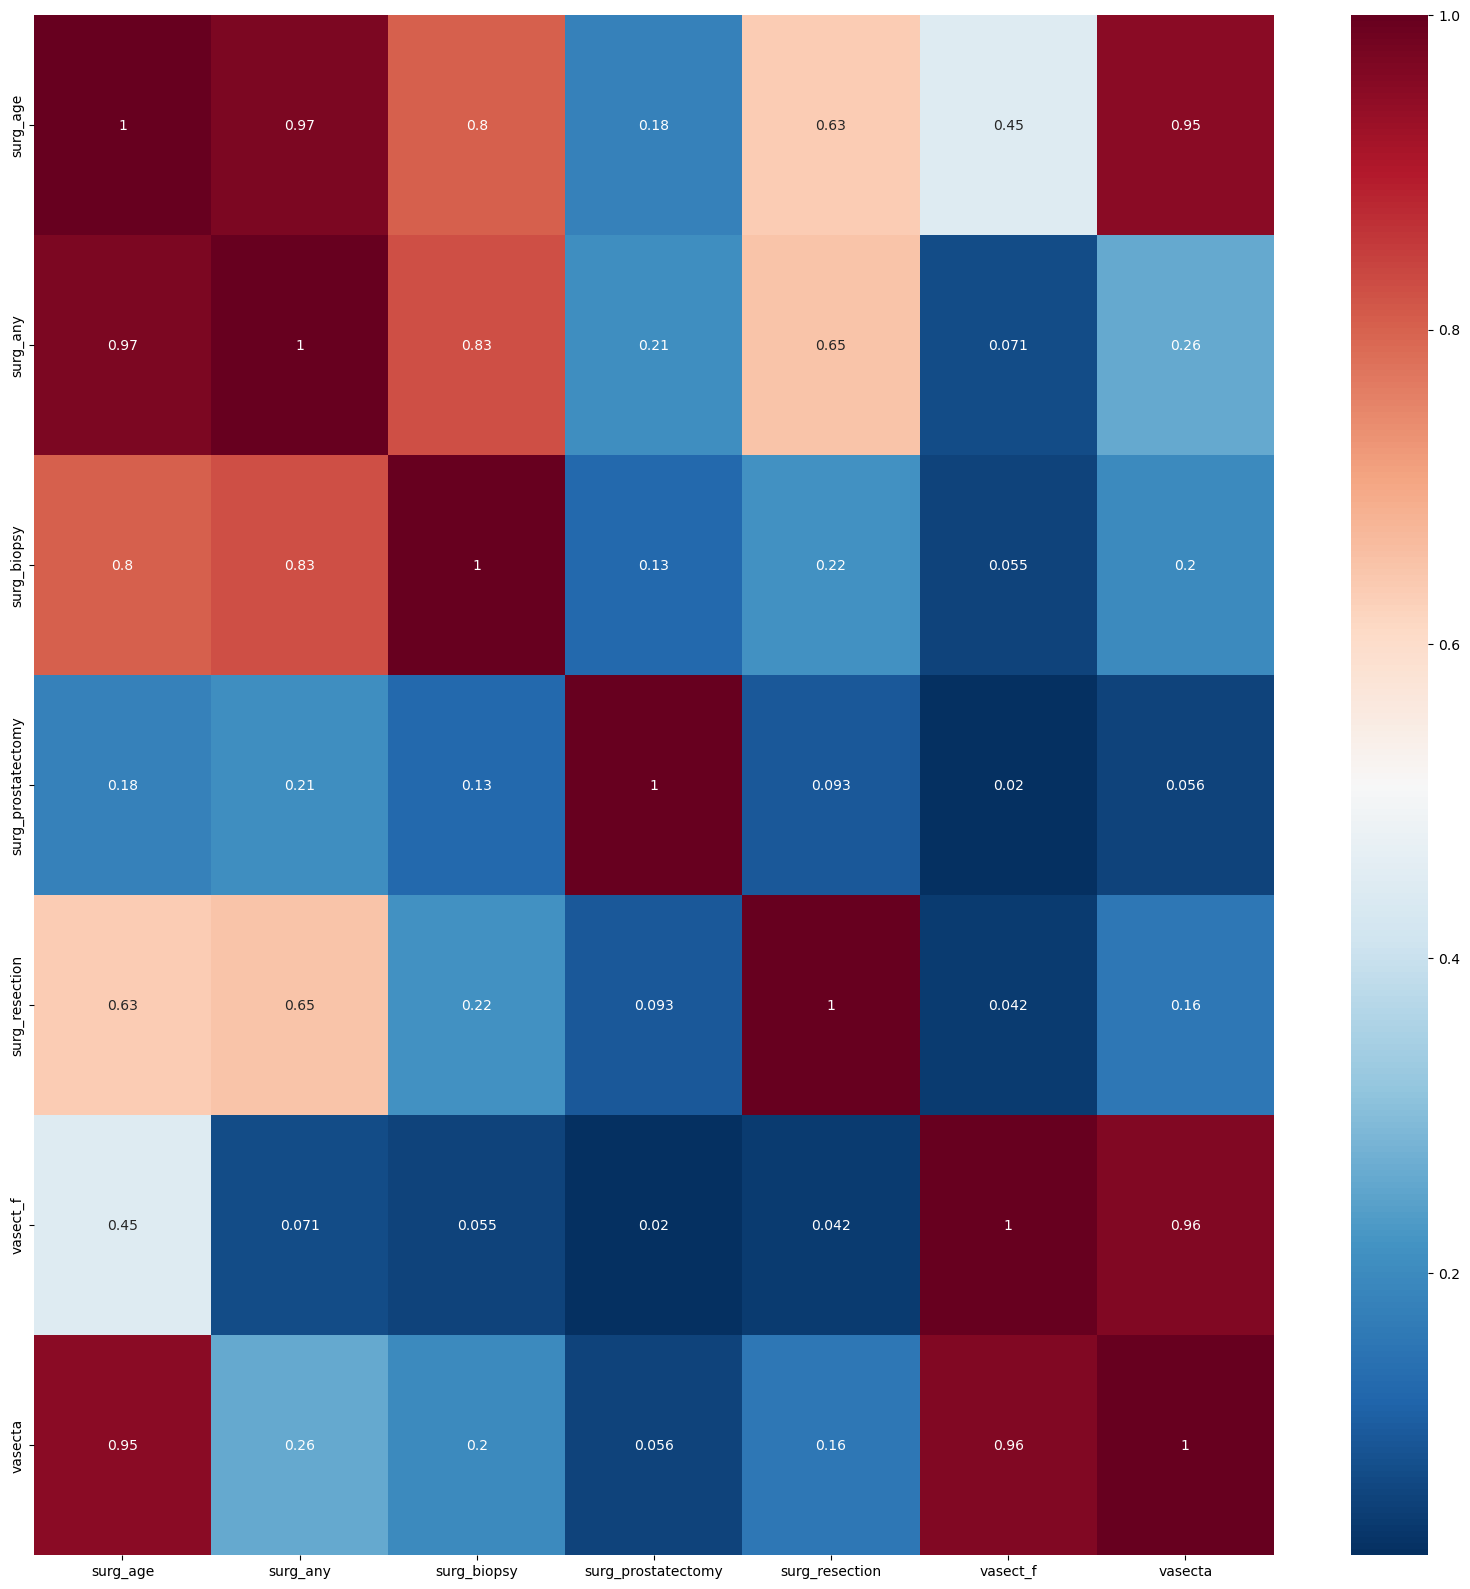

In [182]:
plt.figure(figsize=(20,20))
sns.heatmap(liver_cancer_df_with_bq[section25].corr(), cmap='RdBu_r', annot = True)

# Variables selection
---
Feature selection is a critical step in building robust Machine Learning models. In this section, we refine the dataset by removing irrelevant, redundant, or highly correlated features that do not contribute significantly to liver cancer prediction.

**The key aspects of this process include:**
- Filtering out variables with **low variance or excessive missing values.**
- Removing highly correlated features to prevent **multicollinearity.**
- Keeping only relevant predictors based on **domain knowledge and exploratory analysis.**

By selecting the most meaningful variables, we enhance model interpretability and efficiency, ultimately improving predictive performance.

In [184]:
# Variables we are not going to consider for our model
variables_to_delete_set = {'build', 'build_cancers', 'build_death_cutoff', 'build_incidence_cutoff',
                            'liver_eligible_bq', 'entryage_bq', 'entrydays_bq', 'ph_liver_bq', 'ph_any_bq',
                            'liver_eligible_dhq', 'entryage_dhq', 'entrydays_dhq', 'ph_liver_dhq', 'ph_any_dhq',
                            'liver_eligible_dqx', 'entryage_dqx', 'entrydays_dqx', 'ph_liver_dqx', 'ph_any_dqx', 
                            'liver_eligible_sqx', 'entryage_sqx', 'entrydays_sqx', 'ph_liver_sqx', 'ph_any_sqx',
                            'entryage_muq', 'entrydays_muq', 'ph_liver_muq', 'ph_any_muq',
                            'fstcan_exitstat', 'liver_exitstat', 'fstcan_exitdays', 'liver_exitdays', 'fstcan_exitage', 'liver_exitage', 'mortality_exitstat', 'mortality_exitdays', 'mortality_exitage',
                            'age',
                            'reconsent_outcome', 'reconsent_outcome_days',
                            'liver_cancer_diagdays', 'liver_annyr', 'liver_cancer_first',
                            'liver_behavior', 'liver_grade', 'liver_morphology', 'liver_topography', 'liver_seer', 'liver_seercat', 
                            'is_dead', 'is_dead_with_cod', 'dth_days',
                            'd_seer_death', 'd_cancersite', 'd_dth_liver', 'd_codeath_cat',
                            'f_seer_death', 'f_cancersite', 'f_dth_liver', 'f_codeath_cat',
                            'bq_returned', 'bq_age', 'bq_compdays', 'bq_adminm',
                            'hispanic_f', 'educat', 'marital', 'occupat',
                            'cig_stop', 'cig_years', 'cigpd_f', 'pack_years', 'smoked_f', 'rsmoker_f',
                            'liver_fh_age',
                            'bmi_curr', 'weight_f', 'bmi_20', 'weight20_f', 'bmi_50', 'weight50_f',
                            'asp', 'ibup', 
                            'hystera', 'ovariesr_f', 'bcontra', 'bcontrt', 'curhorm', 'horm_stat', 'thorm', 'fchilda', 'livec', 'prega', 'pregc', 'lmenstr', 'menstrs_stat_type', 'post_menopausal',
                            'enlprosa', 'infprosa', 'prosprob_f', 'urinatea',
                            'surg_age', 'surg_biopsy', 'surg_resection', 'vasecta',
                            'plco_id'}

In [301]:
len(variables_to_delete_set)

106

In [303]:
liver_cancer_df_with_bq_copy = liver_cancer_df_with_bq.copy()

In [305]:
liver_cancer_df_with_bq_final = liver_cancer_df_with_bq_copy.drop(columns=variables_to_delete_set)

In [307]:
liver_cancer_df_with_bq_final.shape

(149369, 61)

In [311]:
liver_cancer_df_with_bq_final_with_target = liver_cancer_df_with_bq_copy.drop(columns=variables_to_delete_set - {'liver_cancer'})

In [313]:
liver_cancer_df_with_bq_final_with_target.shape

(149369, 61)

In [315]:
daf.nulls_percentage(liver_cancer_df_with_bq_final)

liver_cancer , 0.0% nulls , 2 unique values, int64
pipe , 1.1% nulls , 3 unique values, float64
cigar , 1.2% nulls , 3 unique values, float64
sisters , 1.0% nulls , 8 unique values, float64
brothers , 0.8% nulls , 8 unique values, float64
fmenstr , 0.1% nulls , 6 unique values, float64
menstrs , 0.9% nulls , 5 unique values, float64
miscar , 0.2% nulls , 3 unique values, float64
tubal , 0.2% nulls , 3 unique values, float64
tuballig , 0.2% nulls , 3 unique values, float64
bbd , 1.2% nulls , 2 unique values, float64
benign_ovcyst , 2.3% nulls , 2 unique values, float64
endometriosis , 2.5% nulls , 2 unique values, float64
uterine_fib , 1.8% nulls , 2 unique values, float64
trypreg , 0.2% nulls , 2 unique values, float64
stillb , 0.4% nulls , 3 unique values, float64
asppd , 0.4% nulls , 8 unique values, float64
ibuppd , 0.7% nulls , 8 unique values, float64
hyperten_f , 0.6% nulls , 2 unique values, float64
hearta_f , 0.7% nulls , 2 unique values, float64
stroke_f , 0.6% nulls , 2 uniqu

In [317]:
liver_cancer_df_with_bq_final.to_csv("../../0. Data/1. Cleaned/liver_cancer_df_with_bq_final.csv", index=False)

In [319]:
liver_cancer_df_with_bq_final_with_target.to_csv("../../0. Data/1. Cleaned/liver_cancer_df_with_bq_final_with_target.csv", index=False)